### Entegra Report Analysis

In [1]:
# pip install geopy

In [2]:
import unicodedata
import datetime as dt
import os
import sys
import re
import numpy as np
import pandas as pd
import math
from pathlib import Path
import nltk
from nltk import word_tokenize 
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import locale
from locale import atof
from geopy.geocoders import Nominatim
from geopy.point import Point
from geopy.exc import GeocoderTimedOut
from functools import reduce

##### Functions

In [3]:
# custom character alphabet for word
tr = re.compile(r"[abcçdefgğhıijklmnoöprsştuüvyzqxw]+", re.IGNORECASE|re.UNICODE) # Turkish filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789'
en = re.compile(r"[abcdefghıijklmnopqrstxuvwyz]+", re.IGNORECASE|re.UNICODE) # English
nl = re.compile(r"[abcdefghıijklmnopqrstxuvwyzāăēĕīĭōŏūŭ]+", re.IGNORECASE|re.UNICODE) # Dutch (Flemenk)
fr = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàâæèéêëîïôœùûüÿ]+", re.IGNORECASE|re.UNICODE) # French
de = re.compile(r"[abcdefghıijklmnopqrstxuvwyzäöüß]+", re.IGNORECASE|re.UNICODE) # German
es = re.compile(r"[abcdefghıijklmnopqrstxuvwyzñáéíóú]+", re.IGNORECASE|re.UNICODE) # Spanish (¿¡)
pt = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàáâãéêíóôõú]+", re.IGNORECASE|re.UNICODE) # Portuguese
it = re.compile(r"[abcdefghıijklmnopqrstxuvwyzàéèìòùî]+", re.IGNORECASE|re.UNICODE) # Italian
ar = re.compile(r"[ٿصؼۤڳڲؿڎػڠجڿ٬ٸؽؒؓطۄڀۂؘؔتٚڛےٝڜؖڦ٫ډ۰زۇٖۀ،لۓعٮێڔ۶ؚۧۜڤۏإٞٷؗۖ؈ژۣؕؑٴأۻڸۺگاڴڹۯ؉ْڌ؍ي؟ـٟړۅؐڶُىڽېًۢؠضۚڄٛڏٱۦ٩س٦ڼڂٔۘ٠ښٌٍ۬ٳ۾ٲږذۋٵٜ٘ڞڅںٗهڣۿپڒۥۗڋیؙم؞ثۨٹڵڪظٶۭ١ڭەڨحٕ؎ٺڷٰ۪۫ڻڥۛڑڟټآڡغګ؊ّٯڧڮ؏ۮ؋ؤ٪ؾڗۼق۟دکوِڰڐۃ۽ہفرڇچڝ۴بۈٽڕۡھةٓڃئ؛ڬٙڙڢڱۊَۆۉځ۠ۍۑۙڊنءڈٻشڍ؇۵كخ\ا]+", re.IGNORECASE|re.UNICODE) # Arabic

In [4]:
def convert_one_character_letter(text):
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. \n
    convert_one_character_letter(text): text is any string word or sentence.
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    return new_text

In [5]:
def clean_text(text, custom_alp=tr): # for only string in specific language
    '''This function extract custom_alp character from string \n
    clean_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.
    '''
    # text_clean = re.findall(custom_alp, text)
    text_result_list = []
    text_list = re.findall(r'\S+', text)
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_result = " ".join(text_result_list)
    return text_result

In [6]:
def lower_func(text):
    '''This function convert string character to lowercase. \n
    lower_func(text=str): text is any string word or sentence
    '''
    string_lower = str.lower(text)
    return string_lower

In [7]:
def upper_func(text):
    '''This function convert string character to uppercase. \n
    upper_func(text=str): text is any string word or sentence
    '''
    string_upper = str.upper(text)
    return string_upper

In [8]:
def capitalize_func(text):
    '''This function convert string character to capitalize case. \n
    capitalize_func(text=str): text is any string word or sentence
    '''
    string_capitalize = str.capitalize(text)
    return string_capitalize

In [9]:
def title_func(text):
    '''This function convert string character to title as each word start with capital letter. \n
    title_func(text=str): text is any string word or sentence
    '''
    string_title = str.title(text)
    return string_title

In [10]:
def character_clean_lower_text(text, custom_alp=tr): # for only string in specific language
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. And also extract custom_alp character from string and convert to lowercase. \n
    character_clean_lower_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.  
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    text_result_list = []
    text_list = re.findall(r'\S+', new_text)  # like as word tokenize
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_join = " ".join(text_result_list)
    text_result = str.lower(text_join)
    return text_result

In [11]:
def convert_to_float(value):
    '''This function convert string numeric value to float type. Like as 1.200,15
    convert_to_float(value): value is a string numeric value
    '''
    value = value.replace(".","").replace(",",".")
    return float(value)

In [12]:
def whitespace_del(text):
    '''This function provides removing left right white space.\n
    whitespace_del(text): text is a string value as word or sentence.
    '''
    text_var = str(text)
    text_var = text_var.strip()  # rstrip lstrip
    return text_var

#### Report

In [138]:
variable_date = "01.04.2024-05.09.2024"
input_path = fr"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Entegra\Sales\{variable_date}"
output_path = fr"C:\Users\user\Downloads"

data_file = fr"Entegra_Sales_List ({variable_date})"

In [139]:
# df_entegra = pd.read_excel(fr"{input_path}\{data_file}.xlsx")

# df_entegra.to_csv(fr"{output_path}\{data_file}.csv", encoding='utf8', index=False)

In [140]:
#df_entegra = pd.read_csv(fr"{input_path}\{data_file}.csv", low_memory=False)
df_entegra = pd.read_excel(fr"{input_path}\{data_file}.xlsx")
df_entegra

,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productCode,payment_type,total_product,PazaryerindenGelenOdemeTutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,FaturaTipiAdi
0,201036,2383110310,9465795799,NaN,2024-09-05 10:54:27,2024-09-05 10:57:15,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
1,201035,2383102583,9465789564,NaN,2024-09-05 10:50:42,2024-09-05 10:51:14,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,5,0,7,Aynı gün kargoda,NaN,NaN,0,Seciniz
2,201033,2383091113,9465777317,NaN,2024-09-05 10:43:15,2024-09-05 10:45:03,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
3,201025,2383085464,9465772854,NaN,2024-09-05 10:40:26,2024-09-05 10:42:12,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,2,0,2,Aynı gün kargoda,NaN,NaN,0,Seciniz
4,201027,2383076067,9465764076,NaN,2024-09-05 10:34:55,2024-09-05 10:42:15,trendyol,trendyol,2,Onaylandı,...,220647971025,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92974,107816,2036971893,9080057915,NaN,2024-03-01 00:16:54,2024-03-01 00:17:34,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,03/01/2024 10:59:38,NaN,0,Seciniz
92975,107817,2036970386,9080056913,NaN,2024-03-01 00:16:07,2024-03-01 00:17:35,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,03/01/2024 09:21:47,NaN,0,Seciniz
92976,107815,0888556689,0888556689,NaN,2024-03-01 00:14:02,2024-03-01 00:15:22,HepsiBurada,hb,2,Onaylandı,...,NaN,HepsiBurada,1,0,1,NaN,03/01/2024 09:53:35,NaN,0,Seciniz
92977,107812,2036956451,9080042398,NaN,2024-03-01 00:05:22,2024-03-01 00:06:28,trendyol,trendyol,2,Onaylandı,...,yatak54896513739,Trendyol,1,0,1,NaN,03/01/2024 10:59:38,NaN,0,Seciniz


In [141]:
df_entegra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92979 entries, 0 to 92978
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            92979 non-null  int64         
 1   order_number                  92979 non-null  object        
 2   platform_reference_no         92979 non-null  object        
 3   invoice_number                0 non-null      float64       
 4   datetime                      92979 non-null  datetime64[ns]
 5   date_add                      92979 non-null  datetime64[ns]
 6   entegration                   92979 non-null  object        
 7   supplier                      92979 non-null  object        
 8   status                        92979 non-null  int64         
 9   status_name                   92979 non-null  object        
 10  company                       92979 non-null  object        
 11  cargo_code                  

In [142]:
df_entegra.columns = [x.lower() for x in df_entegra.columns]
df_entegra.columns = [x.strip() for x in df_entegra.columns]
df_entegra

,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productcode,payment_type,total_product,pazaryerindengelenodemetutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,faturatipiadi
0,201036,2383110310,9465795799,NaN,2024-09-05 10:54:27,2024-09-05 10:57:15,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
1,201035,2383102583,9465789564,NaN,2024-09-05 10:50:42,2024-09-05 10:51:14,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,5,0,7,Aynı gün kargoda,NaN,NaN,0,Seciniz
2,201033,2383091113,9465777317,NaN,2024-09-05 10:43:15,2024-09-05 10:45:03,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
3,201025,2383085464,9465772854,NaN,2024-09-05 10:40:26,2024-09-05 10:42:12,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,2,0,2,Aynı gün kargoda,NaN,NaN,0,Seciniz
4,201027,2383076067,9465764076,NaN,2024-09-05 10:34:55,2024-09-05 10:42:15,trendyol,trendyol,2,Onaylandı,...,220647971025,Trendyol,1,0,1,Aynı gün kargoda,NaN,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92974,107816,2036971893,9080057915,NaN,2024-03-01 00:16:54,2024-03-01 00:17:34,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,03/01/2024 10:59:38,NaN,0,Seciniz
92975,107817,2036970386,9080056913,NaN,2024-03-01 00:16:07,2024-03-01 00:17:35,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,03/01/2024 09:21:47,NaN,0,Seciniz
92976,107815,0888556689,0888556689,NaN,2024-03-01 00:14:02,2024-03-01 00:15:22,HepsiBurada,hb,2,Onaylandı,...,NaN,HepsiBurada,1,0,1,NaN,03/01/2024 09:53:35,NaN,0,Seciniz
92977,107812,2036956451,9080042398,NaN,2024-03-01 00:05:22,2024-03-01 00:06:28,trendyol,trendyol,2,Onaylandı,...,yatak54896513739,Trendyol,1,0,1,NaN,03/01/2024 10:59:38,NaN,0,Seciniz


In [143]:
df_entegra.columns

Index(['id', 'order_number', 'platform_reference_no', 'invoice_number',
       'datetime', 'date_add', 'entegration', 'supplier', 'status',
       'status_name', 'company', 'cargo_code', 'invoice_country',
       'invoice_city', 'tax_office', 'tax_number', 'tc_id', 'total', 'tax',
       'grand_total', 'sync', 'erp_order_number', 'erp_message',
       'store_order_status', 'store_order_status_name', 'order_process',
       'note', 'supplier1', 'supplier_id', 'cargo_sync', 'cargo_company',
       'cargo_code2', 'cargo_follow_url', 'cargo_finally_statu',
       'cargo_error_message', 'einvoice_error_message', 'invoice_print_name',
       'ship_print_name', 'sevk_tarihi', 'ship_country', 'customer_code',
       'cargo_fee_type_name', 'cargo_packet_type', 'cargo_packet_quantity',
       'grand_total_desi', 'model', 'product_name', 'store_product_name',
       'invoice_name', 'pov_productcode', 'payment_type', 'total_product',
       'pazaryerindengelenodemetutar', 'total_product_quantity',

In [144]:
df_entegra.id.nunique()

92979

In [145]:
df_entegra.model.nunique()

974

In [146]:
df_entegra.pov_productcode.nunique()  # barcode

372

In [147]:
df_entegra["invoice_country"].unique()

array([nan, 'Türkiye', 'Birleşik Arap Emirlikleri', 'Romanya',
       'Azerbaycan', 'Suudi Arabistan', 'Slovakya', 'Kuveyt', 'Katar',
       'Umman', 'Bahreyn'], dtype=object)

In [148]:
df_entegra_select_var = df_entegra[["order_number","model","pov_productcode","product_name","datetime","total_product_quantity","entegration",\
    "invoice_city","total","tax","grand_total","company","cargo_company","status_name"]]
df_entegra_select_var

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.670,78.330,470.00,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92974,2036971893,001603,NaN,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,trendyolekspress,Onaylandı
92975,2036970386,002429,NaN,BTS3 Boyama Tuval Sayılı Set 25x35 Yunus,2024-03-01 00:16:07,1,trendyol,Çorum,154.170,30.830,185.00,zübeyde DEMİREL,trendyolekspress,Onaylandı
92976,0888556689,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,HepsiBurada,İzmir,33.325,6.665,39.99,İrem Erbey,hepsijet,Onaylandı
92977,2036956451,002284,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,trendyolekspress,Onaylandı


In [149]:
df_entegra_select_var["cargo_company"].unique()

array(['trendyolekspress', 'mng', 'hepsijet', 'eptt', 'yurtici',
       'kolaygelsin', 'horoz', 'surat', nan], dtype=object)

In [150]:
df_entegra_select_var.loc[:,"cargo_company"] = df_entegra_select_var.loc[:,"cargo_company"].fillna("diger")
df_entegra_select_var

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.670,78.330,470.00,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92974,2036971893,001603,NaN,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,trendyolekspress,Onaylandı
92975,2036970386,002429,NaN,BTS3 Boyama Tuval Sayılı Set 25x35 Yunus,2024-03-01 00:16:07,1,trendyol,Çorum,154.170,30.830,185.00,zübeyde DEMİREL,trendyolekspress,Onaylandı
92976,0888556689,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,HepsiBurada,İzmir,33.325,6.665,39.99,İrem Erbey,hepsijet,Onaylandı
92977,2036956451,002284,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,trendyolekspress,Onaylandı


In [151]:
df_entegra_select_var["order_number"].nunique()

92289

In [152]:
df_entegra_select_duplicated = df_entegra_select_var[df_entegra_select_var.duplicated(keep=False)]
df_entegra_select_duplicated

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
1443,0408757643,003309,NaN,Champion Adalılar Kauçuk Sıcak Su Torbası Mavi...,2024-08-31 19:24:52,1,HepsiBurada,Konya,195.8333,39.1667,235.0000,Metin Karagöz,yurtici,Onaylandı
1444,0408757643,003309,NaN,Champion Adalılar Kauçuk Sıcak Su Torbası Mavi...,2024-08-31 19:24:52,1,HepsiBurada,Konya,195.8333,39.1667,235.0000,Metin Karagöz,yurtici,Onaylandı
1614,0407760580,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-08-31 10:15:55,4,HepsiBurada,İstanbul,205.3552,36.2448,241.6000,Betül Peker,yurtici,Onaylandı
1615,0407760580,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-08-31 10:15:55,4,HepsiBurada,İstanbul,205.3552,36.2448,241.6000,Betül Peker,yurtici,Onaylandı
1618,0194437964,002583,14421524554,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-08-31 09:57:09,1,HepsiBurada,Aydın,174.5455,17.4546,192.0001,Sedat Özkan,yurtici,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89814,0662726064,003570,NaN,Dekoratif Fişli 5 Metre Yıldızlı Pirinç Led Gü...,2024-03-10 07:23:13,1,HepsiBurada,Gaziantep,108.3250,21.6650,129.9900,Halime Özkılınç,hepsijet,Onaylandı
91848,0135890958,003876,NaN,Nem Alıcı Rutubet Ve Küf Önleyici Kare Aparat ...,2024-03-04 20:27:53,3,HepsiBurada,İstanbul,267.3750,53.4750,320.8500,Nilgün Dönmez,mng,Onaylandı
91849,0135890958,003876,NaN,Nem Alıcı Rutubet Ve Küf Önleyici Kare Aparat ...,2024-03-04 20:27:53,3,HepsiBurada,İstanbul,267.3750,53.4750,320.8500,Nilgün Dönmez,mng,Onaylandı
92809,0942304624,001603,NaN,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 16:24:32,1,HepsiBurada,İzmir,139.1583,27.8317,166.9900,esen ortaç,hepsijet,Onaylandı


In [153]:
# df_entegra_select_duplicated.to_excel(fr"{output_path}\Entegra Aynı Sipariş Tekrarlama ({variable_date}).xlsx", index=False)  # Hepsiburada siparişleri

In [154]:
df_entegra_select_var = df_entegra_select_var.sort_values(["datetime","total_product_quantity"], ascending=False)
df_entegra_select_var.reset_index(drop=True, inplace=True)
df_entegra_select_var

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.670,78.330,470.00,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92974,2036971893,001603,NaN,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,trendyolekspress,Onaylandı
92975,2036970386,002429,NaN,BTS3 Boyama Tuval Sayılı Set 25x35 Yunus,2024-03-01 00:16:07,1,trendyol,Çorum,154.170,30.830,185.00,zübeyde DEMİREL,trendyolekspress,Onaylandı
92976,0888556689,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,HepsiBurada,İzmir,33.325,6.665,39.99,İrem Erbey,hepsijet,Onaylandı
92977,2036956451,002284,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,trendyolekspress,Onaylandı


In [155]:
df_entegra_select_var = df_entegra_select_var.drop_duplicates(subset="order_number", keep="first")
df_entegra_select_var = df_entegra_select_var.reset_index(drop=True)
df_entegra_select_var

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.670,78.330,470.00,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92284,2036971893,001603,NaN,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,trendyolekspress,Onaylandı
92285,2036970386,002429,NaN,BTS3 Boyama Tuval Sayılı Set 25x35 Yunus,2024-03-01 00:16:07,1,trendyol,Çorum,154.170,30.830,185.00,zübeyde DEMİREL,trendyolekspress,Onaylandı
92286,0888556689,002369,NaN,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,HepsiBurada,İzmir,33.325,6.665,39.99,İrem Erbey,hepsijet,Onaylandı
92287,2036956451,002284,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,trendyolekspress,Onaylandı


In [156]:
df_entegra_select_var.loc[:,'datetime'] = pd.to_datetime(df_entegra_select_var.loc[:,'datetime'], format='%Y-%m-%d %H:%M:%S')
df_entegra_select_var.head(5)

,order_number,model,pov_productcode,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.67,78.33,470.0,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.53,48.47,444.0,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.83,33.17,199.0,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.83,43.17,259.0,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.82,18.18,200.0,Damla Beşer,trendyolekspress,Onaylandı


In [157]:
df_entegra_select_var.insert(3,"date",pd.to_datetime(df_entegra_select_var["datetime"]).dt.date)
df_entegra_select_var.insert(4,"time",pd.to_datetime(df_entegra_select_var["datetime"]).dt.time)
df_entegra_select_var.head(5)

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,NaN,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,trendyol,İstanbul,391.67,78.33,470.0,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,trendyol,İstanbul,395.53,48.47,444.0,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,trendyol,Ankara,165.83,33.17,199.0,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,trendyol,İstanbul,215.83,43.17,259.0,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,trendyol,Sivas,181.82,18.18,200.0,Damla Beşer,trendyolekspress,Onaylandı


In [158]:
object_columns = df_entegra_select_var.select_dtypes(include='object')
object_columns

,order_number,model,pov_productcode,date,time,product_name,entegration,invoice_city,company,cargo_company,status_name
0,2383110310,003362,NaN,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",trendyol,İstanbul,ali özdemir,trendyolekspress,Onaylandı
1,2383102583,004382,NaN,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,trendyol,İstanbul,Tuğba Sayar,trendyolekspress,Onaylandı
2,2383091113,001602,NaN,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",trendyol,Ankara,Tuba Koca,trendyolekspress,Onaylandı
3,2383085464,001602,NaN,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",trendyol,İstanbul,Doğa Özkan,trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",trendyol,Sivas,Damla Beşer,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...
92284,2036971893,001603,NaN,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",trendyol,Samsun,Gülizar Sarı,trendyolekspress,Onaylandı
92285,2036970386,002429,NaN,2024-03-01,00:16:07,BTS3 Boyama Tuval Sayılı Set 25x35 Yunus,trendyol,Çorum,zübeyde DEMİREL,trendyolekspress,Onaylandı
92286,0888556689,002369,NaN,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,HepsiBurada,İzmir,İrem Erbey,hepsijet,Onaylandı
92287,2036956451,002284,yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,trendyol,Konya,Esma Söylemez,trendyolekspress,Onaylandı


In [159]:
object_columns.columns

Index(['order_number', 'model', 'pov_productcode', 'date', 'time',
       'product_name', 'entegration', 'invoice_city', 'company',
       'cargo_company', 'status_name'],
      dtype='object')

In [160]:
for column in object_columns.columns:
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: convert_one_character_letter(x))
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: whitespace_del(x))
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: title_func(x))
    
df_entegra_select_var

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92284,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı
92285,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,Çorum,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı
92286,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı
92287,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı


In [161]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92289 entries, 0 to 92288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            92289 non-null  object        
 1   model                   92289 non-null  object        
 2   pov_productcode         92289 non-null  object        
 3   date                    92289 non-null  object        
 4   time                    92289 non-null  object        
 5   product_name            92289 non-null  object        
 6   datetime                92289 non-null  datetime64[ns]
 7   total_product_quantity  92289 non-null  int64         
 8   entegration             92289 non-null  object        
 9   invoice_city            92289 non-null  object        
 10  total                   92289 non-null  float64       
 11  tax                     92289 non-null  float64       
 12  grand_total             92289 non-null  float6

In [162]:
df_entegra_select_product = df_entegra_select_var[["model","product_name"]]
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,004382,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...
2,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
4,002583,"Portatif Katlanabilir Masa, Piknik Masası, Kam..."
...,...,...
92284,001603,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek..."
92285,002429,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus
92286,002369,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...
92287,002284,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...


In [163]:
df_entegra_select_product = df_entegra_select_product.drop_duplicates()
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,004382,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...
2,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
4,002583,"Portatif Katlanabilir Masa, Piknik Masası, Kam..."
6,002643,Kaymaz Taban Tekli Post Peluş Banyo Paspası
...,...,...
91757,001656,Guard Mat Siyah Klasik Deri Erkek Cüzdanı 171
91790,003412,"Levi Çift Kişilik Keten Yatak Örtüsü, Çift Kiş..."
91837,004034,Kadın Erkek Desenli 4034
91902,002586,Bts20 Boyama Tuval Sayılı Set 25X35


###### Tanımsız Model No Temizleme

In [164]:
def change_nonvalue(value):
    value2 = str(value)
    if value2 == "Tanımsız.":
        output = np.nan
    else:
        output = value    

    return output

In [165]:
df_entegra_select_var["model"] = df_entegra_select_var["model"].apply(lambda x: change_nonvalue(x))

In [166]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92289 entries, 0 to 92288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            92289 non-null  object        
 1   model                   90397 non-null  object        
 2   pov_productcode         92289 non-null  object        
 3   date                    92289 non-null  object        
 4   time                    92289 non-null  object        
 5   product_name            92289 non-null  object        
 6   datetime                92289 non-null  datetime64[ns]
 7   total_product_quantity  92289 non-null  int64         
 8   entegration             92289 non-null  object        
 9   invoice_city            92289 non-null  object        
 10  total                   92289 non-null  float64       
 11  tax                     92289 non-null  float64       
 12  grand_total             92289 non-null  float6

In [167]:
df_entegra_select_var.dropna(subset="model", inplace=True)
df_entegra_select_var.reset_index(drop=True, inplace=True)
df_entegra_select_var

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90392,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı
90393,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,Çorum,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı
90394,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı
90395,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı


In [168]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90397 entries, 0 to 90396
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            90397 non-null  object        
 1   model                   90397 non-null  object        
 2   pov_productcode         90397 non-null  object        
 3   date                    90397 non-null  object        
 4   time                    90397 non-null  object        
 5   product_name            90397 non-null  object        
 6   datetime                90397 non-null  datetime64[ns]
 7   total_product_quantity  90397 non-null  int64         
 8   entegration             90397 non-null  object        
 9   invoice_city            90397 non-null  object        
 10  total                   90397 non-null  float64       
 11  tax                     90397 non-null  float64       
 12  grand_total             90397 non-null  float6

##### Temp Entegra Mikro

In [159]:
df_entegra_select_var

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92284,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı
92285,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,Çorum,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı
92286,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı
92287,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı


In [160]:
df_mikro_price = pd.read_excel(r"C:\Users\user\Downloads\Kopya Ürün Listesi Fiyat Bilgisi.xlsx")  # ????
df_mikro_price = df_mikro_price.rename(columns={"Ürün Adı":"product_name","Model Kodu":"model","Gelişi":"geliş_fiyat","KDV ORANI":"KDV Oranı"})
df_mikro_price

,product_name,Varyant,Marka,Renk,model,Stok Kodu,SKU,Barkod,Gelişi,KDV Oranı
0,"%100 Doğal At Kılı Selülit Fırçası, Doğal At K...",NaN,proclis,NaN,002972,002972,NaN,NaN,60,20.0
1,"%100 Doğal Keçi Kılı Yüz Bakım Fırçası, Yüz Ba...",NaN,proclis,Ahşap,002975,002975,NaN,NaN,25,20.0
2,%100 Doğal Sarı Kantaron Yağı 50 ml,NaN,proclis,NaN,002960,002960,NaN,NaN,28.74,20.0
3,0-3 Yaş Zeka Kartları Dokun Hisset Tanı Eğitim...,NaN,Circle Toys,NaN,002932,002932,NaN,NaN,118,20.0
4,1 Adet Ayakkabı Hurcu Gri Çizgili,NaN,ALAS,Gri,002924,002924,NaN,NaN,156,10.0
...,...,...,...,...,...,...,...,...,...,...
1573,Şeffaf Kedi Ve Köpek Düz Sırt Taşıma Çantası Sarı,NaN,GOBYPET,Sarı,003865,003865,NaN,NaN,200,20.0
1574,Şeffaf Kedi ve Köpek Düz Sırt Taşıma Çantası 8 KG,NaN,NaN,NaN,003865,003865,NaN,NaN,200,20.0
1575,Şeffaf Tekerlekli Kedi Köpek Taşıma Valizi Çek...,NaN,Bagline,ŞEFFAF,BAG-21,f,NaN,NaN,NaN,NaN
1576,Şişme Tabanlı 3 Boğumlu Sunset Havuz 114x25 cm,NaN,Intex,Çok Renkli,004004,004004,NaN,NaN,145,20.0


In [161]:
mikro_model_set = set(df_mikro_price["model"])

In [162]:
mikro_model_list = list(mikro_model_set)

In [163]:
df_entegra_select_var[df_entegra_select_var["model"].isin(mikro_model_list)]

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı
5,2383074871,001602,Nan,2024-09-05,10:34:41,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:34:41,1,Trendyol,Denizli,165.830,33.170,199.00,Sare Hacer Var,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92283,2036985367,001603,Nan,2024-03-01,00:25:53,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:25:53,3,Trendyol,Elazığ,173.330,34.670,207.99,Sude Bacak,Mng,Onaylandı
92284,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı
92286,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı
92287,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı


In [164]:
df_model_price_no = df_entegra_select_var[~df_entegra_select_var["model"].isin(mikro_model_list)]
df_model_price_no

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.5300,48.4700,444.000,Tuğba Sayar,Trendyolekspress,Onaylandı
7,2383066275,002263,Ayk8683372407015Çkmk,2024-09-05,10:29:26,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-09-05 10:29:26,1,Trendyol,Ankara,304.1700,60.8300,365.000,Şeyma Ödemi̇ş,Mng,Onaylandı
9,2383064808,004159,Nan,2024-09-05,10:28:11,Spider Örümcek Oyun Çadırı Çift Yönlü Giriş Çı...,2024-09-05 10:28:11,1,Trendyol,Mersin,329.1700,65.8300,395.000,Senem Cekli,Trendyolekspress,Onaylandı
14,4433528729,004173,Nan,2024-09-05,10:04:53,Cool Wheelsçocuk Gri Üstü Katlanır Scooter 8 Y...,2024-09-05 10:04:53,1,Hepsiburada,Kocaeli,0.0000,0.0000,0.000,Erdal Arslan,Hepsijet,Onaylandı
17,2383008440,002263,Ayk8683372407015Çkmk,2024-09-05,09:53:22,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-09-05 09:53:22,1,Trendyol,Osmaniye,304.1700,60.8300,365.000,Halil Ibrahim Kısacıkoğlu,Mng,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92258,207152268431-1,003628,Nan,2024-03-01,08:35:00,Koruyucu Gümüş Göğüs Ucu Kapakları Large,2024-03-01 08:35:00,1,N11,Diyarbakır,450.0000,0.0000,450.000,Cihan Ölçer,Mng,Yeni Siparis
92264,40326,Tanımsız.,Nan,2024-03-01,06:50:49,Tanımsız,2024-03-01 06:50:49,1,Woocommerce,İstanbul,187.9075,37.5815,225.489,Nilay Kaya,Diger,Yeni Siparis
92265,0258422959,001718,Nan,2024-03-01,06:46:18,Pikas Sesli Home Pamuklu Erkek Çocuk Bebek Bat...,2024-03-01 06:46:18,1,Hepsiburada,İstanbul,252.3182,25.2318,277.550,Sabri Balta,Hepsijet,Onaylandı
92278,2037018057,002904,Nan,2024-03-01,00:57:14,Derili 6' Lı Bavul İçi Seyehat Çantası Gri,2024-03-01 00:57:14,2,Trendyol,İstanbul,220.0000,22.0000,242.000,Boran Eraslan,Trendyolekspress,Onaylandı


In [165]:
df_model_price_no_drop = df_model_price_no.drop_duplicates(subset=['model','pov_productcode'])
df_model_price_no_drop

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.5300,48.4700,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı
7,2383066275,002263,Ayk8683372407015Çkmk,2024-09-05,10:29:26,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-09-05 10:29:26,1,Trendyol,Ankara,304.1700,60.8300,365.00,Şeyma Ödemi̇ş,Mng,Onaylandı
9,2383064808,004159,Nan,2024-09-05,10:28:11,Spider Örümcek Oyun Çadırı Çift Yönlü Giriş Çı...,2024-09-05 10:28:11,1,Trendyol,Mersin,329.1700,65.8300,395.00,Senem Cekli,Trendyolekspress,Onaylandı
14,4433528729,004173,Nan,2024-09-05,10:04:53,Cool Wheelsçocuk Gri Üstü Katlanır Scooter 8 Y...,2024-09-05 10:04:53,1,Hepsiburada,Kocaeli,0.0000,0.0000,0.00,Erdal Arslan,Hepsijet,Onaylandı
33,4130179939,Tanımsız.,Nan,2024-09-05,07:47:46,Tanımsız,2024-09-05 07:47:46,1,Hepsiburada,İstanbul,1387.5000,277.5000,1665.00,Alperen Coşar,Hepsijet,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91757,2039947115,001656,Nan,2024-03-02,21:49:56,Guard Mat Siyah Klasik Deri Erkek Cüzdanı 171,2024-03-02 21:49:56,1,Trendyol,İstanbul,381.3600,76.2700,457.63,Nazile Qasimova,Trendyolekspress,İade-İptal
91790,2039692691,003412,Nan,2024-03-02,19:22:08,"Levi Çift Kişilik Keten Yatak Örtüsü, Çift Kiş...",2024-03-02 19:22:08,1,Trendyol,Yozgat,304.5500,30.4500,335.00,Ebru Kına,Eptt,Onaylandı
91837,0819187023,004034,Nan,2024-03-02,16:46:45,Kadın Erkek Desenli 4034,2024-03-02 16:46:45,3,Hepsiburada,İzmir,275.0000,55.0000,330.00,Elif Özlem Dere,Hepsijet,Onaylandı
91861,2039349131,002631,077898142202,2024-03-02,15:25:23,Kafe Restoran Masaüstü Rezerve Yazısı 4 Mm,2024-03-02 15:25:23,1,Trendyol,Ankara,364.4000,72.8800,437.28,Özlem Şiban,Trendyolekspress,Onaylandı


In [166]:
df_model_price_no_drop.to_excel(fr"{output_path}\Entegra Ürün Fiyat Listesinde Olmayan.xlsx", index=False)

##### Entegra Select And Geo Location

In [169]:
df_city_location = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Geo Location\Master\Entegra City Location.xlsx")
df_city_location.drop("id", axis=1, inplace=True)
df_city_location

,city,country,invoice_city,latitude,longitude
0,Adana,Turkey,Adana,37.143800,35.498409
1,Adiyaman,Turkey,Adıyaman,37.763750,38.276348
2,Adiyaman,Turkey,Adiyaman,37.763750,38.276348
3,Afyonkarahisar,Turkey,Afyonkarahisar,38.685273,30.642741
4,Afyonkarahisar,Turkey,Afyon,38.685273,30.642741
...,...,...,...,...,...
299,Suceava,Romania,Suceava,47.662435,26.273619
300,Cătina,Romania,Catina,46.844627,24.163656
301,Bratislava,Slovakia,Bratislava,48.148492,17.121400
302,Čadca,Slovakia,Cadca,49.437481,18.788260


In [170]:
# df_city_location[df_city_location["city"].duplicated(keep=False)]

In [171]:
df_city_location["city"].nunique()

220

In [172]:
df_entegra_select_var

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90392,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı
90393,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,Çorum,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı
90394,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı
90395,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı


In [173]:
df_entegra_city_location = pd.merge(df_entegra_select_var, df_city_location, how="left", on="invoice_city")
df_entegra_city_location = df_entegra_city_location.drop_duplicates().reset_index(drop=True)
df_entegra_city_location

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,invoice_city,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,İstanbul,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,İstanbul,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,Ankara,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,İstanbul,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,Sivas,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90392,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,Samsun,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
90393,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,Çorum,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
90394,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,İzmir,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
90395,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,Konya,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [174]:
df_entegra_select = df_entegra_city_location.drop(["invoice_city"], axis=1)
df_entegra_select

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90392,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
90393,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
90394,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
90395,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [175]:
df_entegra_select["latitude"] = df_entegra_select["latitude"].apply(lambda x: round(x, 6))
df_entegra_select["longitude"] = df_entegra_select["longitude"].apply(lambda x: round(x, 6))
df_entegra_select.head(5)

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.67,78.33,470.0,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.53,48.47,444.0,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.83,33.17,199.0,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.83,43.17,259.0,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.82,18.18,200.0,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426


In [176]:
print(df_entegra_select["product_name"].dtype)

object


In [177]:
print(df_entegra_select["latitude"].dtype)

float64


In [178]:
df_entegra_select["city"].nunique()

220

In [179]:
df_entegra_select_var["model"].nunique()

973

In [180]:
df_entegra_select_var["product_name"].nunique()

991

In [181]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90397 entries, 0 to 90396
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            90397 non-null  object        
 1   model                   90397 non-null  object        
 2   pov_productcode         90397 non-null  object        
 3   date                    90397 non-null  object        
 4   time                    90397 non-null  object        
 5   product_name            90397 non-null  object        
 6   datetime                90397 non-null  datetime64[ns]
 7   total_product_quantity  90397 non-null  int64         
 8   entegration             90397 non-null  object        
 9   invoice_city            90397 non-null  object        
 10  total                   90397 non-null  float64       
 11  tax                     90397 non-null  float64       
 12  grand_total             90397 non-null  float6

In [182]:
# df_entegra_select.to_excel(fr"{output_path}\Entegra Sales City Location For Tableau ({variable_date}).xlsx", index=False)  # Adoba..Data Folder

##### Brand Select For Tableau

In [183]:
df_entegra_select

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90392,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
90393,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
90394,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
90395,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [184]:
df_brand_select = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Entegra\Product Name\Master\Entegra Ürün Satış Listesi Fiyat Barkod Düzenleme Master.xlsx", sheet_name="Model Marka")
df_brand_select

,marka,model
0,Pikas,3415
1,Pikas,000028
2,Pikas,000037
3,Pikas,000863
4,Pikas,000864
...,...,...
444,Proclis,004390
445,Proclis,copy004229
446,Proclis,copy004230
447,Gobypet,copy004277


In [185]:
df_brand_tableau = pd.merge(df_entegra_select,df_brand_select, how='inner', on='model')
df_brand_tableau.drop_duplicates(inplace=True)
df_brand_tableau.dropna(inplace=True)
df_brand_tableau

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude,marka
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872,Pikas
1,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050,Gobypet
2,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872,Gobypet
3,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426,Pikas
4,2383074871,001602,Nan,2024-09-05,10:34:41,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:34:41,1,Trendyol,165.830,33.170,199.00,Sare Hacer Var,Trendyolekspress,Onaylandı,Denizli,Turkey,37.827589,29.238954,Gobypet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52587,2037012301,003856,Nan,2024-03-01,00:53:07,Çg42 Ahşap Çocuk Mutfak Seti,2024-03-01 00:53:07,1,Trendyol,1105.000,221.000,1326.00,Güldağ Yıldırım,Trendyolekspress,Onaylandı,Antalya,Turkey,36.896420,30.714880,Rozitoys
52588,2036985367,001603,Nan,2024-03-01,00:25:53,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:25:53,3,Trendyol,173.330,34.670,207.99,Sude Bacak,Mng,Onaylandı,Elazig,Turkey,38.582477,39.396179,Gobypet
52589,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060,Gobypet
52590,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802,Pikas


In [186]:
df_brand_tableau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52565 entries, 0 to 52591
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            52565 non-null  object        
 1   model                   52565 non-null  object        
 2   pov_productcode         52565 non-null  object        
 3   date                    52565 non-null  object        
 4   time                    52565 non-null  object        
 5   product_name            52565 non-null  object        
 6   datetime                52565 non-null  datetime64[ns]
 7   total_product_quantity  52565 non-null  int64         
 8   entegration             52565 non-null  object        
 9   total                   52565 non-null  float64       
 10  tax                     52565 non-null  float64       
 11  grand_total             52565 non-null  float64       
 12  company                 52565 non-null  object     

In [187]:
# df_brand_tableau.to_excel(fr"{output_path}\Entegra Sales Brand Select City Location For Tableau ({variable_date}).xlsx", index=False)  # Adoba..Data Folder

##### Stock Price

In [188]:
df_stok = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Mikro\Stok\17.09.2024\Stok Bilgisi.xlsx")
df_stok

,model,stok_ismi,mikro,sayım
0,002973,%100 Keçi Kılı Doğal Bebek Saç Fırçası Yumuşa...,394.0,0.0
1,003363,"10 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sa...",196.0,221.0
2,002893,27 Parça Circle Toys Baby Puzzle Seti 12 Adet...,0.0,0.0
3,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sak...",197.0,268.0
4,002886,"6'lı Ahşap Kukla Aile Seti, Kukla Seti",49.0,0.0
...,...,...,...,...
1557,003106,Yuvarlak Torbalı Oyuncak/kirli Çamaşır Sepeti ...,319.0,320.0
1558,003107,Yuvarlak Torbalı Oyuncak/kirli Çamaşır Sepeti ...,25.0,0.0
1559,004354,Yün Kurutma Topu Doğal Çamaşır Yumuşatıcı - Ke...,657.0,0.0
1560,003548,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",1232.0,0.0


In [189]:
df_price = pd.read_excel(rf"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Satış Pazarlama\Fiyat Listesi\Model Fiyat Listesi ({variable_date}).xlsx")
df_price.sort_values(by=["model","Gelişi (KDV DAHİL)"], ascending=False, inplace=True)
df_price = df_price.drop_duplicates(subset="model", keep="first")
df_price.reset_index(drop=True, inplace=True)
df_price

,model,Gelişi (KDV DAHİL),Satış Fiyatı,Marka
0,TYBP60UI2B5MZF9H42,247.5,500.5455,Intex
1,TYBHIT32Q6PE8REX10,216.5,452.1297,Intex
2,0782575742231,294.5,573.9501,Intex
3,004495,290.0,571.8950,Ulutaş
4,004479,126.0,286.2916,Gobypet
...,...,...,...,...
409,002263,187.0,450.0000,Pikas
410,002258,163.0,NaN,Pikas
411,001684,40.0,100.0640,Pikas
412,001603,75.0,180.2450,Gobypet


In [190]:
df_price.columns

Index(['model', 'Gelişi (KDV DAHİL)', 'Satış Fiyatı', 'Marka'], dtype='object')

In [191]:
df_price[df_price.duplicated(subset="model", keep=False)]

,model,Gelişi (KDV DAHİL),Satış Fiyatı,Marka


##### Sales Order Quantity

In [192]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [193]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Amazon', 'Woocommerce']

In [194]:
df_entegra_select_sales = df_entegra_select[(df_entegra_select["status_name"] == "Onaylandı") | (df_entegra_select["status_name"] == "Yeni Siparis")]
df_entegra_select_sales.reset_index(drop=True, inplace=True)
df_entegra_select_sales

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88086,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
88087,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
88088,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
88089,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [195]:
entegration_list_sales = list(df_entegra_select_sales["entegration"].unique())
entegration_list_sales

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Amazon', 'Woocommerce']

In [196]:
df_sales_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_sales)
df_sales_quantity_entegration = df_sales_quantity_entegration.fillna(0)
df_sales_quantity_entegration.reset_index(inplace=True)
df_sales_quantity_entegration

entegration,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.0,2.0,0.0,0.0,0.0
1,000631,0.0,0.0,3.0,0.0,1.0,0.0
2,000679,0.0,0.0,0.0,0.0,15.0,0.0
3,000684,0.0,5.0,0.0,0.0,3.0,0.0
4,000688,0.0,0.0,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.0,2.0,0.0,6.0,0.0
961,004479,0.0,0.0,0.0,0.0,11.0,0.0
962,004480,0.0,0.0,4.0,0.0,23.0,0.0
963,4578,0.0,0.0,0.0,0.0,106.0,0.0


In [197]:
df_sales_quantity_entegration = df_sales_quantity_entegration.rename_axis(None, axis=1)  # del index name (entegration)
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.0,2.0,0.0,0.0,0.0
1,000631,0.0,0.0,3.0,0.0,1.0,0.0
2,000679,0.0,0.0,0.0,0.0,15.0,0.0
3,000684,0.0,5.0,0.0,0.0,3.0,0.0
4,000688,0.0,0.0,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.0,2.0,0.0,6.0,0.0
961,004479,0.0,0.0,0.0,0.0,11.0,0.0
962,004480,0.0,0.0,4.0,0.0,23.0,0.0
963,4578,0.0,0.0,0.0,0.0,106.0,0.0


In [198]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.0,2.0,0.0,0.0,0.0
1,000631,0.0,0.0,3.0,0.0,1.0,0.0
2,000679,0.0,0.0,0.0,0.0,15.0,0.0
3,000684,0.0,5.0,0.0,0.0,3.0,0.0
4,000688,0.0,0.0,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.0,2.0,0.0,6.0,0.0
961,004479,0.0,0.0,0.0,0.0,11.0,0.0
962,004480,0.0,0.0,4.0,0.0,23.0,0.0
963,4578,0.0,0.0,0.0,0.0,106.0,0.0


In [199]:
# 1 way
df_sales_quantity_entegration["toplam_satış_adet"] = 0
for entg_column in entegration_list_all:
    df_sales_quantity_entegration["toplam_satış_adet"] += df_sales_quantity_entegration[f"{entg_column}"]
# 2 way
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration[entegration_list_all].sum(axis=1)

# 3 way manuel sum technique
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration["Amazon"] + df_sales_quantity_entegration["Ciceksepeti"] + \
#     df_sales_quantity_entegration["Hepsiburada"] + df_sales_quantity_entegration["N11"] + df_sales_quantity_entegration["Trendyol"] + df_sales_quantity_entegration["Woocommerce"]
# df_sales_quantity_entegration

df_sales_quantity_entegration 

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,000580,0.0,0.0,2.0,0.0,0.0,0.0,2.0
1,000631,0.0,0.0,3.0,0.0,1.0,0.0,4.0
2,000679,0.0,0.0,0.0,0.0,15.0,0.0,15.0
3,000684,0.0,5.0,0.0,0.0,3.0,0.0,8.0
4,000688,0.0,0.0,0.0,0.0,20.0,0.0,20.0
...,...,...,...,...,...,...,...,...
960,004468,0.0,0.0,2.0,0.0,6.0,0.0,8.0
961,004479,0.0,0.0,0.0,0.0,11.0,0.0,11.0
962,004480,0.0,0.0,4.0,0.0,23.0,0.0,27.0
963,4578,0.0,0.0,0.0,0.0,106.0,0.0,106.0


In [200]:
df_sales_name_quantity_entegration  = pd.merge(df_sales_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_sales_name_quantity_entegration.drop_duplicates(inplace=True)
df_sales_name_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,product_name
0,000580,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...
1,000631,0.0,0.0,3.0,0.0,1.0,0.0,4.0,Classone Multimedia Q Klavye Usb Kablolu Wk628
2,000679,0.0,0.0,0.0,0.0,15.0,0.0,15.0,"Hobby Life Alaska Nofrost Saklama Kabı 1,1 Lit..."
3,000684,0.0,5.0,0.0,0.0,3.0,0.0,8.0,"Hobby Life Alaska Nofrost Saklama Kabı 1,1 Lit..."
4,000688,0.0,0.0,0.0,0.0,20.0,0.0,20.0,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li..."
...,...,...,...,...,...,...,...,...,...
985,004468,0.0,0.0,2.0,0.0,6.0,0.0,8.0,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ..."
986,004479,0.0,0.0,0.0,0.0,11.0,0.0,11.0,Kedi Köpek Bit Ve Pire Tarağı
987,004480,0.0,0.0,4.0,0.0,23.0,0.0,27.0,1100 Ml Ölçekli Erzak Saklama Kabı
988,4578,0.0,0.0,0.0,0.0,106.0,0.0,106.0,Alas 4'Lü Çekmece Düzenleyici


In [201]:
cols = list(df_sales_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration[cols]
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...,000580,0.0,0.0,2.0,0.0,0.0,0.0,2.0
1,Classone Multimedia Q Klavye Usb Kablolu Wk628,000631,0.0,0.0,3.0,0.0,1.0,0.0,4.0
2,"Hobby Life Alaska Nofrost Saklama Kabı 1,1 Lit...",000679,0.0,0.0,0.0,0.0,15.0,0.0,15.0
3,"Hobby Life Alaska Nofrost Saklama Kabı 1,1 Lit...",000684,0.0,5.0,0.0,0.0,3.0,0.0,8.0
4,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li...",000688,0.0,0.0,0.0,0.0,20.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...
985,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...",004468,0.0,0.0,2.0,0.0,6.0,0.0,8.0
986,Kedi Köpek Bit Ve Pire Tarağı,004479,0.0,0.0,0.0,0.0,11.0,0.0,11.0
987,1100 Ml Ölçekli Erzak Saklama Kabı,004480,0.0,0.0,4.0,0.0,23.0,0.0,27.0
988,Alas 4'Lü Çekmece Düzenleyici,4578,0.0,0.0,0.0,0.0,106.0,0.0,106.0


In [202]:
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration.sort_values(by="toplam_satış_adet", ascending=False)
df_sales_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
4,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0
...,...,...,...,...,...,...,...,...,...
985,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0
986,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0
987,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0
988,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [203]:
df_sales_name_quantity_entegration_drop = df_sales_name_quantity_entegration.drop_duplicates(subset="model")
df_sales_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration_drop

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0
...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [204]:
df_sales_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra Ürün Satış Rakamları Adet ({variable_date}).xlsx", index=False)

In [205]:
df_sales_name_quantity_stok = pd.merge(df_sales_name_quantity_entegration_drop, df_stok, how="left", on="model")
df_sales_name_quantity_stok

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,stok_ismi,mikro,sayım
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",4047.0,0.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-7954.0,0.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,35.0,35.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-9290.0,0.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,-24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",3.0,0.0
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",4.0,0.0
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",8.0,0.0
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


In [206]:
df_sales_name_quantity_stok_price = pd.merge(df_sales_name_quantity_stok, df_price, how="left", on="model")
df_sales_name_quantity_stok_price

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,stok_ismi,mikro,sayım,Gelişi (KDV DAHİL),Satış Fiyatı,Marka
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",4047.0,0.0,95.0,28.800,Sehba-Mop
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-7954.0,0.0,75.0,180.245,Gobypet
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,35.0,35.0,NaN,NaN,NaN
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-9290.0,0.0,75.0,180.245,Gobypet
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,-24.0,0.0,24.0,84.000,Gobypet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",3.0,0.0,NaN,NaN,NaN
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",4.0,0.0,NaN,NaN,NaN
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",8.0,0.0,NaN,NaN,NaN
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df_sales_name_quantity_stok_price.to_excel(fr"{output_path}\Entegra Ürün Satış Stok Fiyat Adet ({variable_date}).xlsx", index=False)

##### Sales Order TL

In [208]:
df_entegra_select_sales

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88086,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
88087,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
88088,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
88089,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [209]:
df_entegration_model_sales = df_entegra_select_sales.groupby(["model","entegration"])[["total","tax","grand_total"]].sum()
df_entegration_model_sales = df_entegration_model_sales.reset_index()
df_entegration_model_sales.sort_values(by=["entegration","total"], ascending=False, inplace=True)
df_entegration_model_sales.reset_index(drop=True, inplace=True)
df_entegration_model_sales

,model,entegration,total,tax,grand_total
0,003661,Woocommerce,167917.1421,33583.4279,201500.5700
1,003943,Woocommerce,150975.5003,29993.2535,180968.7538
2,002828,Woocommerce,106017.1318,21022.3971,127039.5289
3,004375,Woocommerce,100000.0000,20000.0000,120000.0000
4,003662,Woocommerce,67306.9669,13461.3931,80768.3600
...,...,...,...,...,...
1815,003612,Amazon,174.9900,35.0000,209.9900
1816,003613,Amazon,165.8300,33.1700,199.0000
1817,002260,Amazon,153.3300,30.6700,184.0000
1818,003765,Amazon,149.8400,29.9600,179.8000


###### Total

In [210]:
df_sales_entegration_total = pd.pivot_table(index="model",columns="entegration", values="total", aggfunc='sum', data=df_entegration_model_sales)
df_sales_entegration_total = df_sales_entegration_total.fillna(0)
df_sales_entegration_total.reset_index(inplace=True)
df_sales_entegration_total = df_sales_entegration_total.rename_axis(None, axis=1)
df_sales_entegration_total

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,694.9454,0.0,0.00,0.0
1,000631,0.0,0.00,445.9499,0.0,169.48,0.0
2,000679,0.0,0.00,0.0000,0.0,1150.27,0.0
3,000684,0.0,202.96,0.0000,0.0,239.80,0.0
4,000688,0.0,0.00,0.0000,0.0,1104.69,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,428.3333,0.0,1499.98,0.0
961,004479,0.0,0.00,0.0000,0.0,1107.55,0.0
962,004480,0.0,0.00,525.0000,0.0,3481.67,0.0
963,4578,0.0,0.00,0.0000,0.0,11475.04,0.0


In [211]:
# df_sales_entegration_total.isnull()

In [212]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_entegration_total[f"{entegration}"] = 0
    else:
        pass
    
df_sales_entegration_total

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,694.9454,0.0,0.00,0.0
1,000631,0.0,0.00,445.9499,0.0,169.48,0.0
2,000679,0.0,0.00,0.0000,0.0,1150.27,0.0
3,000684,0.0,202.96,0.0000,0.0,239.80,0.0
4,000688,0.0,0.00,0.0000,0.0,1104.69,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,428.3333,0.0,1499.98,0.0
961,004479,0.0,0.00,0.0000,0.0,1107.55,0.0
962,004480,0.0,0.00,525.0000,0.0,3481.67,0.0
963,4578,0.0,0.00,0.0000,0.0,11475.04,0.0


In [213]:
# 1 way
df_sales_entegration_total["toplam_net_satış_tl"] = 0
for entg_column in entegration_list_all:
    df_sales_entegration_total["toplam_net_satış_tl"] += df_sales_entegration_total[f"{entg_column}"]

df_sales_entegration_total 

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_net_satış_tl
0,000580,0.0,0.00,694.9454,0.0,0.00,0.0,694.9454
1,000631,0.0,0.00,445.9499,0.0,169.48,0.0,615.4299
2,000679,0.0,0.00,0.0000,0.0,1150.27,0.0,1150.2700
3,000684,0.0,202.96,0.0000,0.0,239.80,0.0,442.7600
4,000688,0.0,0.00,0.0000,0.0,1104.69,0.0,1104.6900
...,...,...,...,...,...,...,...,...
960,004468,0.0,0.00,428.3333,0.0,1499.98,0.0,1928.3133
961,004479,0.0,0.00,0.0000,0.0,1107.55,0.0,1107.5500
962,004480,0.0,0.00,525.0000,0.0,3481.67,0.0,4006.6700
963,4578,0.0,0.00,0.0000,0.0,11475.04,0.0,11475.0400


In [214]:
df_sales_entegration_total = df_sales_entegration_total.sort_values(by="toplam_net_satış_tl", ascending=False)
df_sales_entegration_total.reset_index(drop=True, inplace=True)
df_sales_entegration_total = df_sales_entegration_total[["model","toplam_net_satış_tl"]]
df_sales_entegration_total

,model,toplam_net_satış_tl
0,002583,2.063548e+06
1,004319,1.557872e+06
2,003722,1.362371e+06
3,003661,1.193069e+06
4,001602,1.189204e+06
...,...,...
960,003849,7.083330e+01
961,003843,5.986670e+01
962,002235,5.833000e+01
963,002236,5.833000e+01


###### Tax

In [215]:
df_sales_entegration_tax = pd.pivot_table(index="model",columns="entegration", values="tax", aggfunc='sum', data=df_entegration_model_sales)
df_sales_entegration_tax = df_sales_entegration_tax.fillna(0)
df_sales_entegration_tax.reset_index(inplace=True)
df_sales_entegration_tax = df_sales_entegration_tax.rename_axis(None, axis=1)
df_sales_entegration_tax

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,69.4946,0.0,0.00,0.0
1,000631,0.0,0.00,89.1901,0.0,33.90,0.0
2,000679,0.0,0.00,0.0000,0.0,158.52,0.0
3,000684,0.0,40.59,0.0000,0.0,47.96,0.0
4,000688,0.0,0.00,0.0000,0.0,203.77,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,85.6667,0.0,300.02,0.0
961,004479,0.0,0.00,0.0000,0.0,212.43,0.0
962,004480,0.0,0.00,105.0000,0.0,696.33,0.0
963,4578,0.0,0.00,0.0000,0.0,1172.81,0.0


In [216]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_entegration_tax[f"{entegration}"] = 0
    else:
        pass
    
df_sales_entegration_tax

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,69.4946,0.0,0.00,0.0
1,000631,0.0,0.00,89.1901,0.0,33.90,0.0
2,000679,0.0,0.00,0.0000,0.0,158.52,0.0
3,000684,0.0,40.59,0.0000,0.0,47.96,0.0
4,000688,0.0,0.00,0.0000,0.0,203.77,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,85.6667,0.0,300.02,0.0
961,004479,0.0,0.00,0.0000,0.0,212.43,0.0
962,004480,0.0,0.00,105.0000,0.0,696.33,0.0
963,4578,0.0,0.00,0.0000,0.0,1172.81,0.0


In [217]:
# 1 way
df_sales_entegration_tax["toplam_vergi_tl"] = 0
for entg_column in entegration_list_all:
    df_sales_entegration_tax["toplam_vergi_tl"] += df_sales_entegration_tax[f"{entg_column}"]

df_sales_entegration_tax

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_vergi_tl
0,000580,0.0,0.00,69.4946,0.0,0.00,0.0,69.4946
1,000631,0.0,0.00,89.1901,0.0,33.90,0.0,123.0901
2,000679,0.0,0.00,0.0000,0.0,158.52,0.0,158.5200
3,000684,0.0,40.59,0.0000,0.0,47.96,0.0,88.5500
4,000688,0.0,0.00,0.0000,0.0,203.77,0.0,203.7700
...,...,...,...,...,...,...,...,...
960,004468,0.0,0.00,85.6667,0.0,300.02,0.0,385.6867
961,004479,0.0,0.00,0.0000,0.0,212.43,0.0,212.4300
962,004480,0.0,0.00,105.0000,0.0,696.33,0.0,801.3300
963,4578,0.0,0.00,0.0000,0.0,1172.81,0.0,1172.8100


In [218]:
df_sales_entegration_tax = df_sales_entegration_tax.sort_values(by="toplam_vergi_tl", ascending=False)
df_sales_entegration_tax.reset_index(drop=True, inplace=True)
df_sales_entegration_tax = df_sales_entegration_tax[["model","toplam_vergi_tl"]]
df_sales_entegration_tax

,model,toplam_vergi_tl
0,004319,309652.3924
1,003722,264393.3699
2,003661,237962.4596
3,001602,232260.3444
4,002583,210622.6234
...,...,...
960,003249,0.0000
961,003245,0.0000
962,003520,0.0000
963,003624,0.0000


###### Grand Total

In [219]:
df_sales_entegration_grand_total = pd.pivot_table(index="model",columns="entegration", values="grand_total", aggfunc='sum', data=df_entegration_model_sales)
df_sales_entegration_grand_total = df_sales_entegration_grand_total.fillna(0)
df_sales_entegration_grand_total.reset_index(inplace=True)
df_sales_entegration_grand_total = df_sales_entegration_grand_total.rename_axis(None, axis=1)
df_sales_entegration_grand_total

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,764.44,0.0,0.00,0.0
1,000631,0.0,0.00,535.14,0.0,203.38,0.0
2,000679,0.0,0.00,0.00,0.0,1308.79,0.0
3,000684,0.0,243.55,0.00,0.0,287.76,0.0
4,000688,0.0,0.00,0.00,0.0,1308.45,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,514.00,0.0,1800.00,0.0
961,004479,0.0,0.00,0.00,0.0,1319.98,0.0
962,004480,0.0,0.00,630.00,0.0,4178.00,0.0
963,4578,0.0,0.00,0.00,0.0,12647.85,0.0


In [220]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_entegration_grand_total[f"{entegration}"] = 0
    else:
        pass
    
df_sales_entegration_grand_total

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000580,0.0,0.00,764.44,0.0,0.00,0.0
1,000631,0.0,0.00,535.14,0.0,203.38,0.0
2,000679,0.0,0.00,0.00,0.0,1308.79,0.0
3,000684,0.0,243.55,0.00,0.0,287.76,0.0
4,000688,0.0,0.00,0.00,0.0,1308.45,0.0
...,...,...,...,...,...,...,...
960,004468,0.0,0.00,514.00,0.0,1800.00,0.0
961,004479,0.0,0.00,0.00,0.0,1319.98,0.0
962,004480,0.0,0.00,630.00,0.0,4178.00,0.0
963,4578,0.0,0.00,0.00,0.0,12647.85,0.0


In [221]:
# 1 way
df_sales_entegration_grand_total["toplam_brüt_satış_tl"] = 0
for entg_column in entegration_list_all:
    df_sales_entegration_grand_total["toplam_brüt_satış_tl"] += df_sales_entegration_grand_total[f"{entg_column}"]

df_sales_entegration_grand_total

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_brüt_satış_tl
0,000580,0.0,0.00,764.44,0.0,0.00,0.0,764.44
1,000631,0.0,0.00,535.14,0.0,203.38,0.0,738.52
2,000679,0.0,0.00,0.00,0.0,1308.79,0.0,1308.79
3,000684,0.0,243.55,0.00,0.0,287.76,0.0,531.31
4,000688,0.0,0.00,0.00,0.0,1308.45,0.0,1308.45
...,...,...,...,...,...,...,...,...
960,004468,0.0,0.00,514.00,0.0,1800.00,0.0,2314.00
961,004479,0.0,0.00,0.00,0.0,1319.98,0.0,1319.98
962,004480,0.0,0.00,630.00,0.0,4178.00,0.0,4808.00
963,4578,0.0,0.00,0.00,0.0,12647.85,0.0,12647.85


In [222]:
df_sales_entegration_grand_total = df_sales_entegration_grand_total.sort_values(by="toplam_brüt_satış_tl", ascending=False)
df_sales_entegration_grand_total.reset_index(drop=True, inplace=True)
df_sales_entegration_grand_total = df_sales_entegration_grand_total[["model","toplam_brüt_satış_tl"]]
df_sales_entegration_grand_total

,model,toplam_brüt_satış_tl
0,002583,2.274171e+06
1,004319,1.867525e+06
2,003722,1.626764e+06
3,003661,1.431032e+06
4,001602,1.421462e+06
...,...,...
960,003849,8.500000e+01
961,003843,7.184000e+01
962,002235,7.000000e+01
963,002236,7.000000e+01


In [223]:
data_sales_frames = [df_sales_entegration_total, df_sales_entegration_tax, df_sales_entegration_grand_total]

In [224]:
df_sales_merged = reduce(lambda  left,right: pd.merge(left,right,on=['model'], how='inner'), data_sales_frames)
df_sales_merged = df_sales_merged.drop_duplicates()
df_sales_merged = df_sales_merged.reset_index(drop=True)
df_sales_merged

,model,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl
0,002583,2.063548e+06,210622.6234,2.274171e+06
1,004319,1.557872e+06,309652.3924,1.867525e+06
2,003722,1.362371e+06,264393.3699,1.626764e+06
3,003661,1.193069e+06,237962.4596,1.431032e+06
4,001602,1.189204e+06,232260.3444,1.421462e+06
...,...,...,...,...
960,003849,7.083330e+01,14.1667,8.500000e+01
961,003843,5.986670e+01,11.9733,7.184000e+01
962,002235,5.833000e+01,11.6700,7.000000e+01
963,002236,5.833000e+01,11.6700,7.000000e+01


In [225]:
df_quantity_sales_entegration_merge  = pd.merge(df_sales_name_quantity_entegration_drop, df_sales_merged, how="left", on="model")
df_quantity_sales_entegration_merge.drop_duplicates(inplace=True)
df_quantity_sales_entegration_merge

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,2.063548e+06,210622.6234,2.274171e+06
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,1.189204e+06,232260.3444,1.421462e+06
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,7.244912e+05,70972.5902,7.954638e+05
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,5.433420e+05,107224.9762,6.505665e+05
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,1.859611e+05,35068.3133,2.210269e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.181700e+02,31.8200,3.499900e+02
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.444550e+03,144.4500,1.589000e+03


In [226]:
df_quantity_sales_entegration_merge.to_excel(fr"{output_path}\Entegra Ürün Satış Adet Ve TL ({variable_date}).xlsx", index=False)

###### Sales Duplicated

In [227]:
df_sales_dublicated_entegration = df_sales_name_quantity_entegration[df_sales_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_sales_dublicated_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
5,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
6,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
12,Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...,004078,0.0,0.0,248.0,0.0,2068.0,10.0,2326.0
13,Sprey Mop Deterjan Hazneli 3 Adet Moplu Spreyl...,004078,0.0,0.0,248.0,0.0,2068.0,10.0,2326.0
31,Awox Süpürge,004136,0.0,0.0,0.0,0.0,940.0,0.0,940.0
32,Awox Şarjlı El Süpürgesi,004136,0.0,0.0,0.0,0.0,940.0,0.0,940.0


In [228]:
df_sales_dublicated_entegration.to_excel(fr"{output_path}\Entegra Ürün Satış Rakamları Adet Yenile ({variable_date}).xlsx", index=False)

In [229]:
df_quantity_sales_entegration_stok = pd.merge(df_quantity_sales_entegration_merge, df_stok, how="left", on="model")
df_quantity_sales_entegration_stok

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl,stok_ismi,mikro,sayım
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,2.063548e+06,210622.6234,2.274171e+06,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",4047.0,0.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,1.189204e+06,232260.3444,1.421462e+06,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-7954.0,0.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,7.244912e+05,70972.5902,7.954638e+05,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,35.0,35.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,5.433420e+05,107224.9762,6.505665e+05,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-9290.0,0.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,1.859611e+05,35068.3133,2.210269e+05,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,-24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",3.0,0.0
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",4.0,0.0
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.181700e+02,31.8200,3.499900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",8.0,0.0
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.444550e+03,144.4500,1.589000e+03,NaN,NaN,NaN


In [230]:
df_quantity_sales_entegration_stok_price = pd.merge(df_quantity_sales_entegration_stok, df_price, how="left", on="model")
df_quantity_sales_entegration_stok_price

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl,stok_ismi,mikro,sayım,Gelişi (KDV DAHİL),Satış Fiyatı,Marka
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,2.063548e+06,210622.6234,2.274171e+06,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",4047.0,0.0,95.0,28.800,Sehba-Mop
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,1.189204e+06,232260.3444,1.421462e+06,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-7954.0,0.0,75.0,180.245,Gobypet
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,7.244912e+05,70972.5902,7.954638e+05,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,35.0,35.0,NaN,NaN,NaN
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,5.433420e+05,107224.9762,6.505665e+05,Pikas Pati Mama Kabı 2 Kaseli Kedi Köpek Suluk...,-9290.0,0.0,75.0,180.245,Gobypet
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,1.859611e+05,35068.3133,2.210269e+05,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,-24.0,0.0,24.0,84.000,Gobypet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",3.0,0.0,NaN,NaN,NaN
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.659000e+02,36.5900,4.024900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",4.0,0.0,NaN,NaN,NaN
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.181700e+02,31.8200,3.499900e+02,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",8.0,0.0,NaN,NaN,NaN
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.444550e+03,144.4500,1.589000e+03,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
df_quantity_sales_entegration_stok_price.to_excel(fr"{output_path}\Entegra Ürün Satış Toplam Stok Fiyat Adet ({variable_date}).xlsx", index=False)

##### Sales Visualization

In [233]:
df_sales_visual = df_sales_name_quantity_entegration_drop.head(50)
df_sales_visual

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0
5,Awox Kafija Kahve Makinesi,004319,0.0,0.0,135.0,0.0,2739.0,0.0,2874.0
6,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,320.0,81.0,2033.0,319.0,2753.0
7,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,218.0,0.0,2405.0,0.0,2623.0
8,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,0.0,0.0,443.0,0.0,2079.0,0.0,2522.0
9,Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...,004078,0.0,0.0,248.0,0.0,2068.0,10.0,2326.0


In [234]:
select_sales_visual_list = list(df_sales_visual["model"])
# select_sales_visual_list

In [235]:
# df_sales_name_quantity_entegration_drop.drop(columns="model", axis=1)

In [236]:
#dfm = pd.melt(frame=df_sales_name_quantity_entegration_drop, id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm = df_sales_name_quantity_entegration_drop.melt(id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,63.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,1.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,Amazon,0.0
...,...,...,...,...
6750,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,toplam_satış_adet,1.0
6751,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,toplam_satış_adet,1.0
6752,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,toplam_satış_adet,1.0
6753,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,toplam_satış_adet,1.0


In [237]:
dfm_select = dfm[dfm["model"].isin(select_sales_visual_list)]
dfm_select

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,63.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,1.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,Amazon,0.0
...,...,...,...,...
5835,Kedi Oyun Topu Tüylü Fareli Hacı Yatmaz,002984,toplam_satış_adet,512.0
5836,Kedi Köpek Su Sebili Otomatik Su Pınarı Su Çeş...,002828,toplam_satış_adet,509.0
5837,"Procli̇s Nioli Uçucu Yağı, %100 Doğal, Saf Sey...",002497,toplam_satış_adet,504.0
5838,2 Litre Çift Kat Çelik Çay Termosu 1200A (Yeni...,004259,toplam_satış_adet,504.0


<Figure size 1600x900 with 0 Axes>

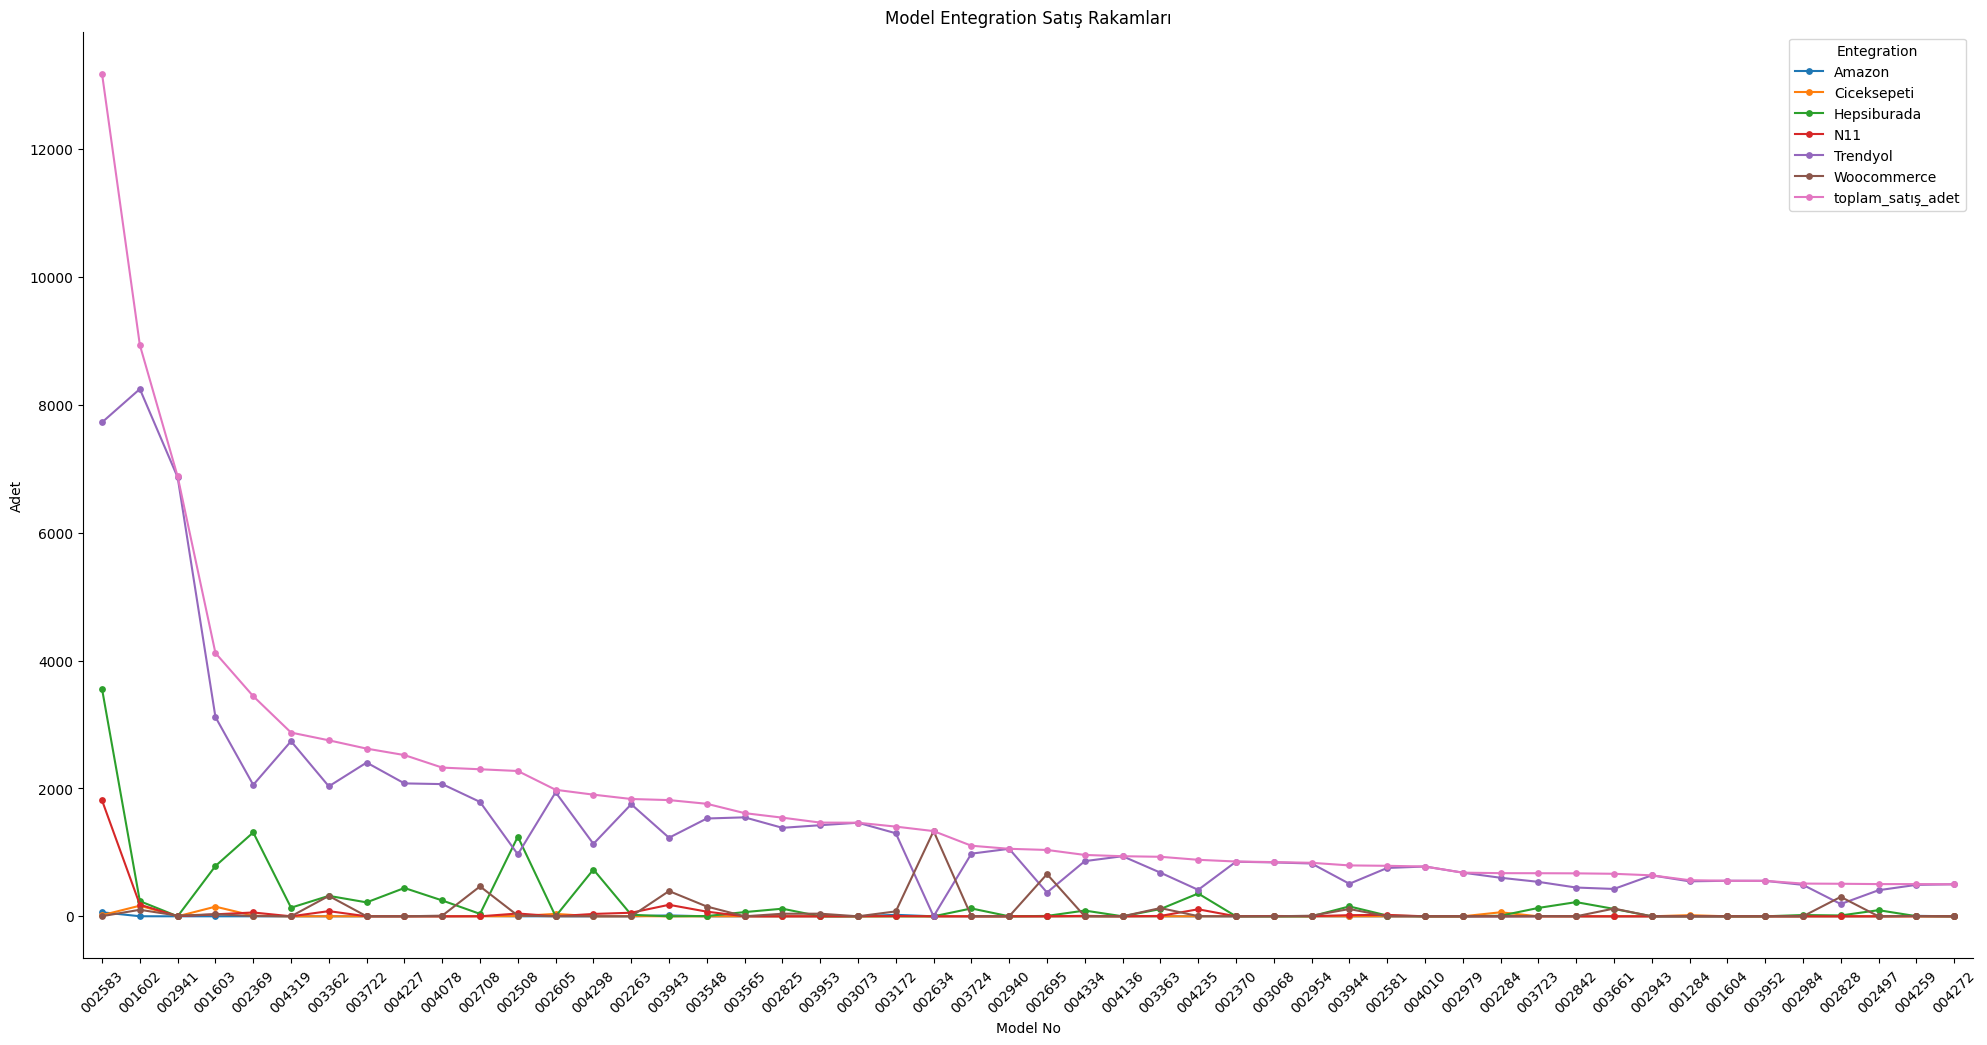

In [238]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.catplot(x="model", y="vals", hue='cols', data=dfm_select, kind='point', legend_out=False, height=10, aspect=2, linewidth=1.5)
# sns.pointplot(x="model", y="vals", hue='cols', data=dfm_select)
plt.xlabel("Model No")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Model Entegration Satış Rakamları")
plt.legend(title='Entegration', loc='upper right');

In [239]:
df_sales_select_top = df_sales_name_quantity_entegration_drop.head(20)
df_sales_select_top

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0
5,Awox Kafija Kahve Makinesi,004319,0.0,0.0,135.0,0.0,2739.0,0.0,2874.0
6,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,320.0,81.0,2033.0,319.0,2753.0
7,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,218.0,0.0,2405.0,0.0,2623.0
8,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,0.0,0.0,443.0,0.0,2079.0,0.0,2522.0
9,Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...,004078,0.0,0.0,248.0,0.0,2068.0,10.0,2326.0


In [240]:
df_sales_select_top.loc[:,"product_name"] + " | " + df_sales_select_top.loc[:,"model"]

0     Portatif Katlanabilir Masa, Piknik Masası, Kam...
1     Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...
2     Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...
3     Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...
4     Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...
5                   Awox Kafija Kahve Makinesi | 004319
6     6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...
7     Awox Orion 1800 W Tost Makinesi Siyah Awox002 ...
8     Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmız...
9     Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...
10    Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...
11    Procli̇s Lavanta Yağı, %100 Doğal Uçucu Yağ, L...
12    Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...
13    Döküm Limon Sıkacağı - Portakal Limon Narenciy...
14    İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...
15    Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...
16    Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...
17                  Awox Kafija Kahve Makinası |

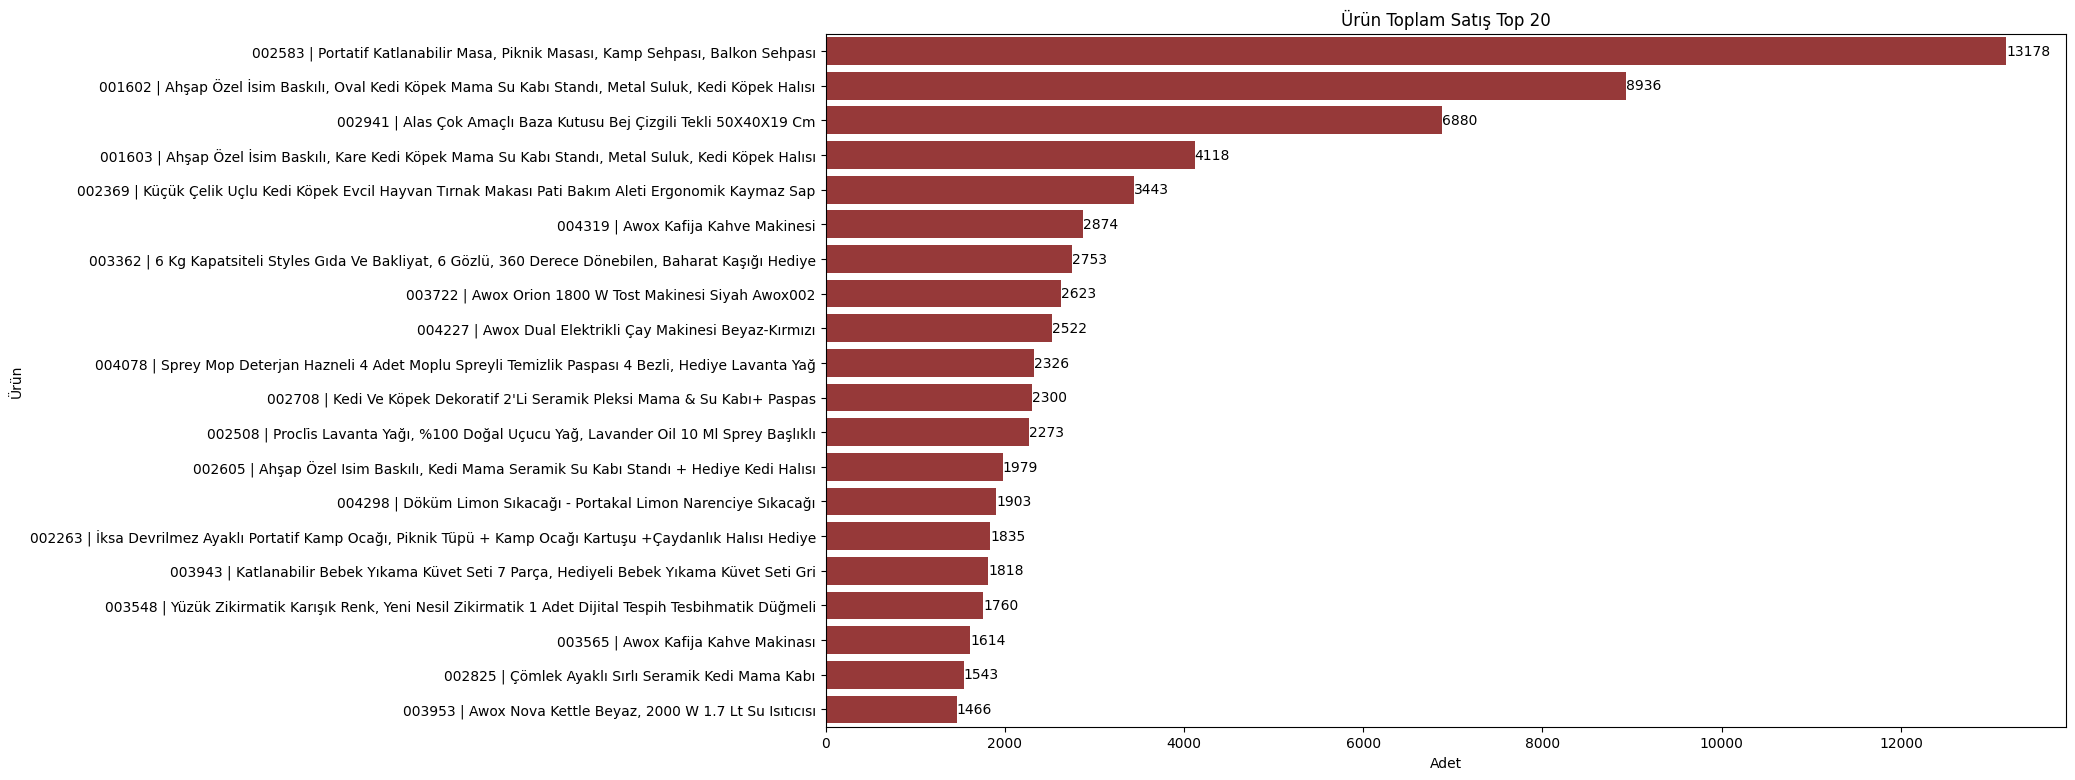

In [241]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_select_top, x="toplam_satış_adet", y="product_name", color="brown")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Adet")
# plt.xticks(rotation=45)

# ax.set_yticklabels(df_sales_select_top.loc[:,"product_name"] + " " + df_sales_select_top.loc[:,"model"])
ax.set_yticks(range(len(df_sales_select_top)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_sales_select_top.loc[:,"model"] + " | " + df_sales_select_top.loc[:,"product_name"]))

plt.ylabel("Ürün")
plt.title("Ürün Toplam Satış Top 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

# # for value on graph 2 way
# i=0
# for p in graph.patches:
#     height = p.get_height()
#     graph.text(p.get_x()+p.get_width()/2., height + 0.5,
#         df_seller_evaluation['olumsuz etkiler'].value_counts()[i],ha="center")
#     i += 1;

In [242]:
df_sales_select_last = df_sales_name_quantity_entegration_drop.tail(20)
df_sales_select_last

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
945,Merinos Micro Çift Kişilik Yorgan Gri,003100,0.0,0.0,0.0,0.0,1.0,0.0,1.0
946,"Granit Yüz Emojili Pankek Tava, Gülenyüz Emoji...",004310,0.0,0.0,0.0,0.0,1.0,0.0,1.0
947,Merinos Luxe Yatak Örtüsü Pudra 150X200 Cm,003203,0.0,0.0,1.0,0.0,0.0,0.0,1.0
948,Merinos Comforter Çift Kişilik Yorgan Seti Yeş...,003217,0.0,0.0,0.0,0.0,1.0,0.0,1.0
949,Merinos Relax Çift Kişilik Battaniye Color Li...,003249,0.0,0.0,0.0,0.0,1.0,0.0,1.0
950,Thermolav Adalılar Kauçuk Termofor Sıcak Su T...,003336,0.0,0.0,0.0,0.0,1.0,0.0,1.0
951,Bebelav Adalılar Kauçuk Termofor Sıcak Su Tor...,003347,0.0,0.0,0.0,0.0,1.0,0.0,1.0
952,"Levi Çift Kişilik Keten Yatak Örtüsü, Çift Kiş...",003412,0.0,0.0,0.0,0.0,1.0,0.0,1.0
953,"Levi Çift Kişilik Keten Yatak Örtüsü, Çift Kiş...",003413,0.0,0.0,0.0,0.0,1.0,0.0,1.0
954,Levi Çift Kişilik Keten Yatak Örtüsü 200X230 S...,003417,0.0,0.0,0.0,0.0,1.0,0.0,1.0


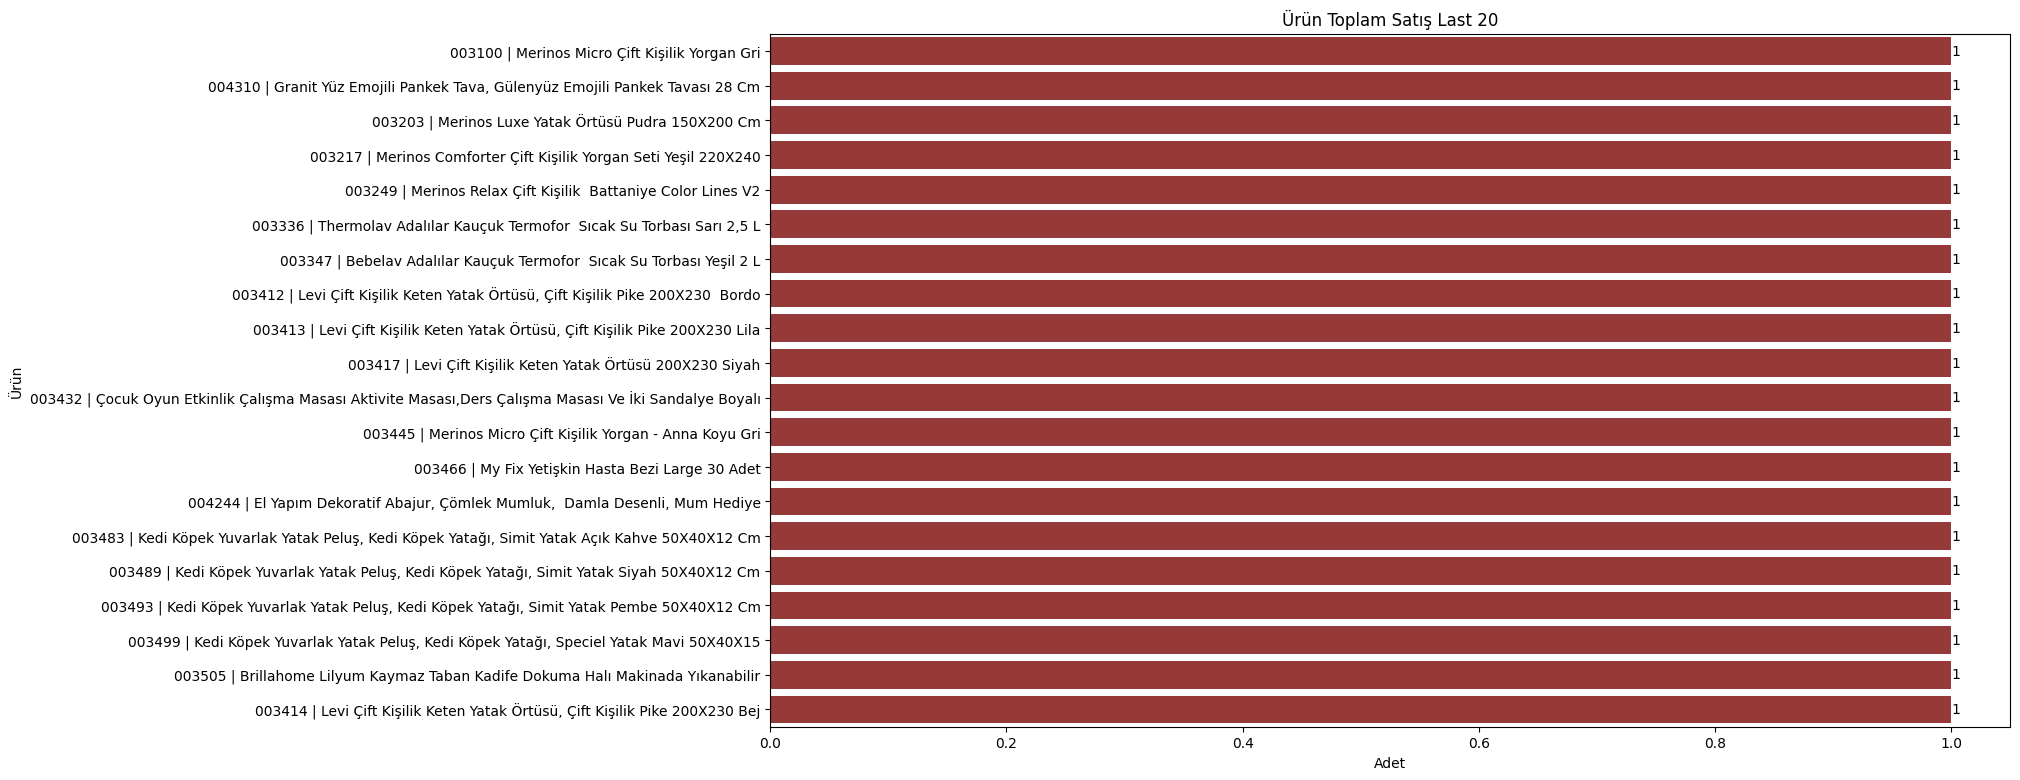

In [243]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_select_last, x="toplam_satış_adet", y="product_name", color="brown")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Adet")
# plt.xticks(rotation=45)

ax.set_yticks(range(len(df_sales_select_last)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_sales_select_last.loc[:,"model"] + " | " + df_sales_select_last.loc[:,"product_name"]))

plt.ylabel("Ürün")
plt.title("Ürün Toplam Satış Last 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

##### Entegration Sales Number

In [244]:
dfm

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,63.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,1.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,Amazon,0.0
...,...,...,...,...
6750,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,toplam_satış_adet,1.0
6751,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,toplam_satış_adet,1.0
6752,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,toplam_satış_adet,1.0
6753,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,toplam_satış_adet,1.0


In [245]:
dfm2 = dfm[dfm["cols"].isin(entegration_list_all)]
dfm2 = dfm2.dropna()
dfm2 = dfm2[dfm2["vals"] != 0]
dfm2.reset_index(drop=True, inplace=True)
dfm2

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,63.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,1.0
2,Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...,002708,Amazon,5.0
3,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...",002605,Amazon,1.0
4,"Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...",003943,Amazon,14.0
...,...,...,...,...
1814,"Kelebek Çelik Kolye, Kararmaz Çelik Kolye 45 C...",004243,Woocommerce,2.0
1815,"Paslanmaz Çelik Taşlı T Harfi Çelik Kelepçe,...",003639,Woocommerce,2.0
1816,Çelik Pandora Charm Bileklik Pembe,003648,Woocommerce,2.0
1817,Orijinal Çelik Zirkon Taşlı Su Yolu Kolye Kara...,003675,Woocommerce,2.0


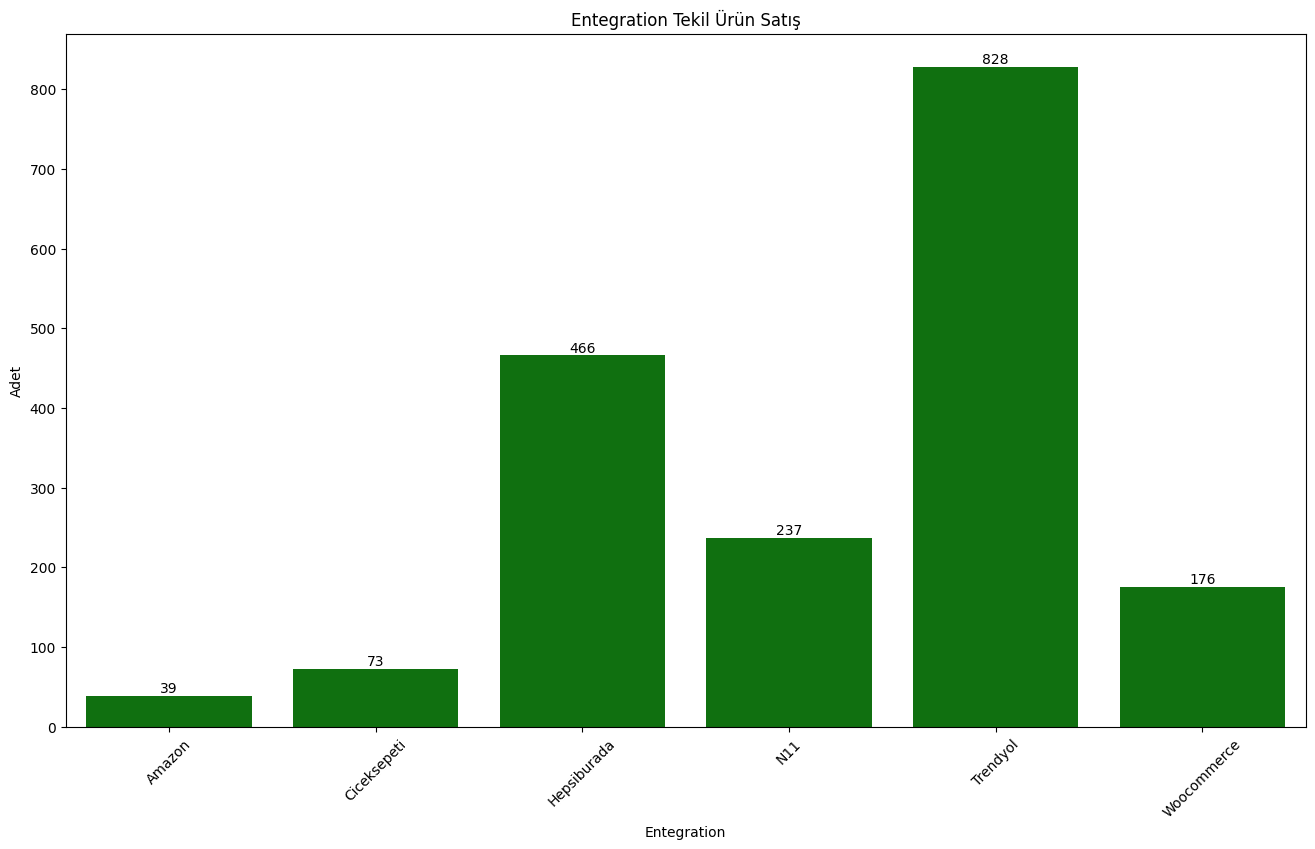

In [246]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.countplot(x="cols", data=dfm2, color="green")
plt.xlabel("Entegration")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Entegration Tekil Ürün Satış")
# 1 way
# graph.bar_label(graph.containers[0])
# 2 way
for container in graph.containers:
    graph.bar_label(container)

# Note: Grafik pazaryerlerinde satılan ürün çeşidi sayısını göstermekte.

In [247]:
dfm3 = dfm2.groupby(["cols"])[["vals"]].sum().reset_index()
dfm3

,cols,vals
0,Amazon,317.0
1,Ciceksepeti,782.0
2,Hepsiburada,17032.0
3,N11,5308.0
4,Trendyol,99348.0
5,Woocommerce,5923.0


In [248]:
dfm3.idxmax()

cols    5
vals    4
dtype: int64

In [249]:
dfm3.index.max()

5

In [250]:
dfm3.loc[dfm3.index.max()+1,:] = {"cols":"Total", "vals":dfm3["vals"].sum()}  # Total sales quantity
dfm3

,cols,vals
0,Amazon,317.0
1,Ciceksepeti,782.0
2,Hepsiburada,17032.0
3,N11,5308.0
4,Trendyol,99348.0
5,Woocommerce,5923.0
6,Total,128710.0


In [251]:
# i = 0
# for value in values:
#     df.loc[df.index.max()+i,:] = {"cols":"Total", "vals":value}
#     i += 1 

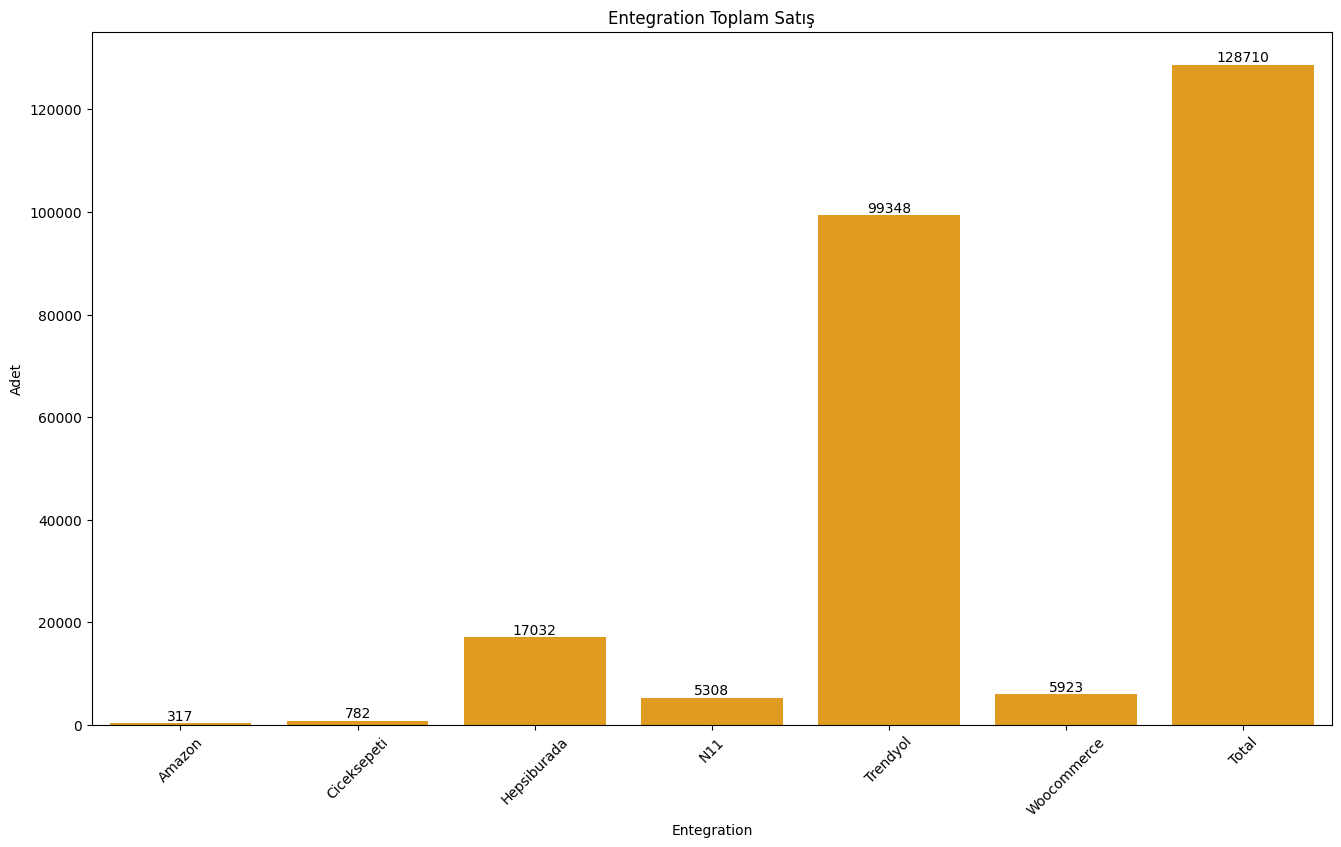

In [252]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.barplot(x="cols", y="vals", data=dfm3, color="orange",)
plt.xlabel("Entegration")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Entegration Toplam Satış")
# 1 way
graph.bar_label(graph.containers[0]);

# Note: Grafik pazaryerlerinde ve toplamda satılan toplam ürün sayısını (bir şipariş birden fazla ürün içerebileceğinden ürün sayısı olarak ele alındı) göstermekte.

##### Cancel Order Quantity

In [253]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [254]:
df_entegra_select_cancel = df_entegra_select[(df_entegra_select["status_name"] == "İade-İptal")]
df_entegra_select_cancel.reset_index(drop=True, inplace=True)
df_entegra_select_cancel

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2379960894,004263,Nan,2024-09-04,14:04:25,Motivasyonel Su Matarası Su Şişesi Suluk 900 M...,2024-09-04 14:04:25,1,Trendyol,144.17,28.83,173.0,Hasret Akbaş,Mng,İade-İptal,Bingöl,Turkey,39.073803,40.729618
1,2379617867,002583,220647971025,2024-09-04,11:15:45,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-04 11:15:45,1,Trendyol,181.82,18.18,200.0,Sevim Sağer,Trendyolekspress,İade-İptal,Samsun,Turkey,41.294615,36.332060
2,2378808038,001603,Nan,2024-09-03,21:26:04,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-09-03 21:26:04,1,Trendyol,165.83,33.17,199.0,Buse Naz Altay,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
3,2378335578,002263,Ayk8683372407015Çkmk,2024-09-03,17:11:40,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-09-03 17:11:40,1,Trendyol,304.17,60.83,365.0,Seda Aydın,Mng,İade-İptal,Istanbul,Turkey,41.006381,28.975872
4,2378253698,001602,Nan,2024-09-03,16:28:01,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-03 16:28:01,3,Trendyol,410.69,69.31,480.0,Rumeys Kübra Çiftci,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,2038185558,002071,Nan,2024-03-01,20:13:36,Müller Lasti̇k Tami̇r Ki̇ti̇ (Üstün Alman Kal...,2024-03-01 20:13:36,2,Trendyol,191.67,38.33,230.0,Hakan Varol,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
2302,2038063497,002828,Nan,2024-03-01,18:58:25,Kedi Köpek Su Sebili Otomatik Su Pınarı Su Çeş...,2024-03-01 18:58:25,1,Trendyol,520.83,104.17,625.0,Şükran İçmez,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
2303,2037980842,003722,Nan,2024-03-01,18:00:58,Awox Orion 1800 W Tost Makinesi Siyah Awox002,2024-03-01 18:00:58,1,Trendyol,478.33,95.67,574.0,Gülseren Çiftçi,Trendyolekspress,İade-İptal,Elazig,Turkey,38.582477,39.396179
2304,2037755938,001603,Nan,2024-03-01,15:36:32,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 15:36:32,1,Trendyol,133.33,26.67,160.0,Ayşegül Sugeçti,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872


In [255]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Amazon', 'Woocommerce']

In [256]:
entegration_list_cancel = list(df_entegra_select_cancel["entegration"].unique())
entegration_list_cancel

['Trendyol']

In [257]:
df_cancel_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_cancel)
df_cancel_quantity_entegration = df_cancel_quantity_entegration.fillna(0)
df_cancel_quantity_entegration.reset_index(inplace=True)
df_cancel_quantity_entegration

entegration,model,Trendyol
0,000657,4
1,000688,4
2,000801,2
3,001269,2
4,001271,2
...,...,...
309,004375,5
310,004380,1
311,004388,2
312,004442,4


In [258]:
df_cancel_quantity_entegration = df_cancel_quantity_entegration.rename_axis(None, axis=1)  # del index name
df_cancel_quantity_entegration

,model,Trendyol
0,000657,4
1,000688,4
2,000801,2
3,001269,2
4,001271,2
...,...,...
309,004375,5
310,004380,1
311,004388,2
312,004442,4


In [259]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce
0,000657,4,0,0,0,0,0
1,000688,4,0,0,0,0,0
2,000801,2,0,0,0,0,0
3,001269,2,0,0,0,0,0
4,001271,2,0,0,0,0,0
...,...,...,...,...,...,...,...
309,004375,5,0,0,0,0,0
310,004380,1,0,0,0,0,0
311,004388,2,0,0,0,0,0
312,004442,4,0,0,0,0,0


In [260]:
# 1 way
# df_cancel_quantity_entegration["total_product_cancel"] = 0
# for entg_column in entegration_list_all:
#     df_cancel_quantity_entegration["total_product_cancel"] += df_cancel_quantity_entegration[f"{entg_column}"]

# 2 way
df_cancel_quantity_entegration["toplam_iptal_adet"] = df_cancel_quantity_entegration[entegration_list_all].sum(axis=1)

df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,000657,4,0,0,0,0,0,4
1,000688,4,0,0,0,0,0,4
2,000801,2,0,0,0,0,0,2
3,001269,2,0,0,0,0,0,2
4,001271,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...
309,004375,5,0,0,0,0,0,5
310,004380,1,0,0,0,0,0,1
311,004388,2,0,0,0,0,0,2
312,004442,4,0,0,0,0,0,4


In [261]:
# df_cancel_quantity_entegration["total_product_cancel"] = df_cancel_quantity_entegration["Amazon"] + df_cancel_quantity_entegration["Ciceksepeti"] + \
#     df_cancel_quantity_entegration["Hepsiburada"] + df_cancel_quantity_entegration["N11"] + df_cancel_quantity_entegration["Trendyol"] + df_cancel_quantity_entegration["Woocommerce"]
# df_cancel_quantity_entegration

In [262]:
df_cancel_name_quantity_entegration  = pd.merge(df_cancel_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_cancel_name_quantity_entegration.drop_duplicates(inplace=True)
df_cancel_name_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet,product_name
0,000657,4,0,0,0,0,0,4,Mavi Beyaz Hasta Muayene Masa Örtüsü 50*25Cm 5...
1,000688,4,0,0,0,0,0,4,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li..."
2,000801,2,0,0,0,0,0,2,Natureva Çörekotu Yağı 10 Ml
3,001269,2,0,0,0,0,0,2,Alas Çok Amaçlı Çekmece İçi Akordiyon Organize...
4,001271,2,0,0,0,0,0,2,Alas Çok Amaçlı Çekmece İçi Akordiyon Organize...
...,...,...,...,...,...,...,...,...,...
325,004375,5,0,0,0,0,0,5,Awox Vıte Pe330 Kıyma Makinesi
326,004380,1,0,0,0,0,0,1,"Kadın Kaş Kesme Makası, Taraklı Kaş Makası"
327,004388,2,0,0,0,0,0,2,100 Adet Pratik Tazeliği Koruyan Tencere Ve Ta...
328,004442,4,0,0,0,0,0,4,Bakır Görünümlü Çelik Sahan Seti Omlet Yumurta...


In [263]:
# df_cancel_name_quantity_entegration[[df_cancel_name_quantity_entegration.columns[-1]]]

In [264]:
cols = list(df_cancel_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration[cols]
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,Mavi Beyaz Hasta Muayene Masa Örtüsü 50*25Cm 5...,000657,4,0,0,0,0,0,4
1,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li...",000688,4,0,0,0,0,0,4
2,Natureva Çörekotu Yağı 10 Ml,000801,2,0,0,0,0,0,2
3,Alas Çok Amaçlı Çekmece İçi Akordiyon Organize...,001269,2,0,0,0,0,0,2
4,Alas Çok Amaçlı Çekmece İçi Akordiyon Organize...,001271,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
325,Awox Vıte Pe330 Kıyma Makinesi,004375,5,0,0,0,0,0,5
326,"Kadın Kaş Kesme Makası, Taraklı Kaş Makası",004380,1,0,0,0,0,0,1
327,100 Adet Pratik Tazeliği Koruyan Tencere Ve Ta...,004388,2,0,0,0,0,0,2
328,Bakır Görünümlü Çelik Sahan Seti Omlet Yumurta...,004442,4,0,0,0,0,0,4


In [265]:
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration.sort_values(by="toplam_iptal_adet", ascending=False)
df_cancel_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374
1,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,374,0,0,0,0,0,374
2,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351
3,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,351,0,0,0,0,0,351
4,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
...,...,...,...,...,...,...,...,...,...
325,Merinos Micro Çift Kişilik Zikzak Yorgan Şampa...,003175,1,0,0,0,0,0,1
326,Renkli Kedi Köpek Evcil Hayvan Tırnak Makası V...,003220,1,0,0,0,0,0,1
327,Vipaş Pera Soft Pembe Çamaşır Kurutmalığı Vps...,003256,1,0,0,0,0,0,1
328,Vipaş Wings Kalın Borulu Kanatlı Kurutmalık-Pembe,003263,1,0,0,0,0,0,1


In [266]:
df_cancel_name_quantity_entegration_drop = df_cancel_name_quantity_entegration.drop_duplicates(subset="model")
df_cancel_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration_drop

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,183,0,0,0,0,0,183
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,156,0,0,0,0,0,156
...,...,...,...,...,...,...,...,...,...
309,Merinos Micro Çift Kişilik Zikzak Yorgan Şampa...,003175,1,0,0,0,0,0,1
310,Renkli Kedi Köpek Evcil Hayvan Tırnak Makası V...,003220,1,0,0,0,0,0,1
311,Vipaş Pera Soft Pembe Çamaşır Kurutmalığı Vps...,003256,1,0,0,0,0,0,1
312,Vipaş Wings Kalın Borulu Kanatlı Kurutmalık-Pembe,003263,1,0,0,0,0,0,1


In [267]:
df_cancel_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra Ürün İptal Rakamları Adet ({variable_date}).xlsx", index=False)

##### Cancel Order TL

In [268]:
df_entegra_select_cancel

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2379960894,004263,Nan,2024-09-04,14:04:25,Motivasyonel Su Matarası Su Şişesi Suluk 900 M...,2024-09-04 14:04:25,1,Trendyol,144.17,28.83,173.0,Hasret Akbaş,Mng,İade-İptal,Bingöl,Turkey,39.073803,40.729618
1,2379617867,002583,220647971025,2024-09-04,11:15:45,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-04 11:15:45,1,Trendyol,181.82,18.18,200.0,Sevim Sağer,Trendyolekspress,İade-İptal,Samsun,Turkey,41.294615,36.332060
2,2378808038,001603,Nan,2024-09-03,21:26:04,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-09-03 21:26:04,1,Trendyol,165.83,33.17,199.0,Buse Naz Altay,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
3,2378335578,002263,Ayk8683372407015Çkmk,2024-09-03,17:11:40,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-09-03 17:11:40,1,Trendyol,304.17,60.83,365.0,Seda Aydın,Mng,İade-İptal,Istanbul,Turkey,41.006381,28.975872
4,2378253698,001602,Nan,2024-09-03,16:28:01,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-03 16:28:01,3,Trendyol,410.69,69.31,480.0,Rumeys Kübra Çiftci,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,2038185558,002071,Nan,2024-03-01,20:13:36,Müller Lasti̇k Tami̇r Ki̇ti̇ (Üstün Alman Kal...,2024-03-01 20:13:36,2,Trendyol,191.67,38.33,230.0,Hakan Varol,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
2302,2038063497,002828,Nan,2024-03-01,18:58:25,Kedi Köpek Su Sebili Otomatik Su Pınarı Su Çeş...,2024-03-01 18:58:25,1,Trendyol,520.83,104.17,625.0,Şükran İçmez,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872
2303,2037980842,003722,Nan,2024-03-01,18:00:58,Awox Orion 1800 W Tost Makinesi Siyah Awox002,2024-03-01 18:00:58,1,Trendyol,478.33,95.67,574.0,Gülseren Çiftçi,Trendyolekspress,İade-İptal,Elazig,Turkey,38.582477,39.396179
2304,2037755938,001603,Nan,2024-03-01,15:36:32,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 15:36:32,1,Trendyol,133.33,26.67,160.0,Ayşegül Sugeçti,Trendyolekspress,İade-İptal,Istanbul,Turkey,41.006381,28.975872


In [269]:
df_entegration_model_cancel = df_entegra_select_cancel.groupby(["model","entegration"])[["total","tax","grand_total"]].sum()
df_entegration_model_cancel = df_entegration_model_cancel.reset_index()
df_entegration_model_cancel.sort_values(by=["entegration","total"], ascending=False, inplace=True)
df_entegration_model_cancel.reset_index(drop=True, inplace=True)
df_entegration_model_cancel

,model,entegration,total,tax,grand_total
0,004227,Trendyol,66621.30,13324.28,79945.58
1,003661,Trendyol,59164.18,11399.82,70564.00
2,002583,Trendyol,50224.63,5138.42,55363.05
3,001602,Trendyol,49560.11,9718.59,59278.61
4,004319,Trendyol,44126.73,8825.27,52952.00
...,...,...,...,...,...
309,002123,Trendyol,32.40,6.48,38.88
310,004380,Trendyol,30.00,6.00,36.00
311,003066,Trendyol,29.17,5.83,35.00
312,002841,Trendyol,29.16,5.83,34.99


###### İptal Satış

In [270]:
df_cancel_entegration_total = pd.pivot_table(index="model",columns="entegration", values="total", aggfunc='sum', data=df_entegration_model_cancel)
df_cancel_entegration_total = df_cancel_entegration_total.fillna(0)
df_cancel_entegration_total.reset_index(inplace=True)
df_cancel_entegration_total = df_cancel_entegration_total.rename_axis(None, axis=1)
df_cancel_entegration_total

,model,Trendyol
0,000657,1149.17
1,000688,186.10
2,000801,193.68
3,001269,81.66
4,001271,90.83
...,...,...
309,004375,12833.33
310,004380,30.00
311,004388,229.55
312,004442,1603.34


In [271]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_entegration_total[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_entegration_total

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce
0,000657,1149.17,0,0,0,0,0
1,000688,186.10,0,0,0,0,0
2,000801,193.68,0,0,0,0,0
3,001269,81.66,0,0,0,0,0
4,001271,90.83,0,0,0,0,0
...,...,...,...,...,...,...,...
309,004375,12833.33,0,0,0,0,0
310,004380,30.00,0,0,0,0,0
311,004388,229.55,0,0,0,0,0
312,004442,1603.34,0,0,0,0,0


In [272]:
# 1 way
df_cancel_entegration_total["toplam_iptal_satış_tl"] = 0
for entg_column in entegration_list_all:
    df_cancel_entegration_total["toplam_iptal_satış_tl"] += df_cancel_entegration_total[f"{entg_column}"]

df_cancel_entegration_total 

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_satış_tl
0,000657,1149.17,0,0,0,0,0,1149.17
1,000688,186.10,0,0,0,0,0,186.10
2,000801,193.68,0,0,0,0,0,193.68
3,001269,81.66,0,0,0,0,0,81.66
4,001271,90.83,0,0,0,0,0,90.83
...,...,...,...,...,...,...,...,...
309,004375,12833.33,0,0,0,0,0,12833.33
310,004380,30.00,0,0,0,0,0,30.00
311,004388,229.55,0,0,0,0,0,229.55
312,004442,1603.34,0,0,0,0,0,1603.34


In [273]:
df_cancel_entegration_total = df_cancel_entegration_total.sort_values(by="toplam_iptal_satış_tl", ascending=False)
df_cancel_entegration_total.reset_index(drop=True, inplace=True)
df_cancel_entegration_total = df_cancel_entegration_total[["model","toplam_iptal_satış_tl"]]
df_cancel_entegration_total

,model,toplam_iptal_satış_tl
0,004227,66621.30
1,003661,59164.18
2,002583,50224.63
3,001602,49560.11
4,004319,44126.73
...,...,...
309,002123,32.40
310,004380,30.00
311,003066,29.17
312,002841,29.16


###### İptal Vergi

In [274]:
df_cancel_entegration_tax = pd.pivot_table(index="model",columns="entegration", values="tax", aggfunc='sum', data=df_entegration_model_cancel)
df_cancel_entegration_tax = df_cancel_entegration_tax.fillna(0)
df_cancel_entegration_tax.reset_index(inplace=True)
df_cancel_entegration_tax = df_cancel_entegration_tax.rename_axis(None, axis=1)
df_cancel_entegration_tax

,model,Trendyol
0,000657,229.84
1,000688,37.22
2,000801,25.20
3,001269,16.34
4,001271,18.17
...,...,...
309,004375,2566.67
310,004380,6.00
311,004388,30.45
312,004442,320.66


In [275]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_entegration_tax[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_entegration_tax

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce
0,000657,229.84,0,0,0,0,0
1,000688,37.22,0,0,0,0,0
2,000801,25.20,0,0,0,0,0
3,001269,16.34,0,0,0,0,0
4,001271,18.17,0,0,0,0,0
...,...,...,...,...,...,...,...
309,004375,2566.67,0,0,0,0,0
310,004380,6.00,0,0,0,0,0
311,004388,30.45,0,0,0,0,0
312,004442,320.66,0,0,0,0,0


In [276]:
# 1 way
df_cancel_entegration_tax["toplam_iptal_vergi_tl"] = 0
for entg_column in entegration_list_all:
    df_cancel_entegration_tax["toplam_iptal_vergi_tl"] += df_cancel_entegration_tax[f"{entg_column}"]

df_cancel_entegration_tax

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_vergi_tl
0,000657,229.84,0,0,0,0,0,229.84
1,000688,37.22,0,0,0,0,0,37.22
2,000801,25.20,0,0,0,0,0,25.20
3,001269,16.34,0,0,0,0,0,16.34
4,001271,18.17,0,0,0,0,0,18.17
...,...,...,...,...,...,...,...,...
309,004375,2566.67,0,0,0,0,0,2566.67
310,004380,6.00,0,0,0,0,0,6.00
311,004388,30.45,0,0,0,0,0,30.45
312,004442,320.66,0,0,0,0,0,320.66


In [277]:
df_cancel_entegration_tax = df_cancel_entegration_tax.sort_values(by="toplam_iptal_vergi_tl", ascending=False)
df_cancel_entegration_tax.reset_index(drop=True, inplace=True)
df_cancel_entegration_tax = df_cancel_entegration_tax[["model","toplam_iptal_vergi_tl"]]
df_cancel_entegration_tax

,model,toplam_iptal_vergi_tl
0,004227,13324.28
1,003661,11399.82
2,001602,9718.59
3,004319,8825.27
4,003722,8489.99
...,...,...
309,002632,4.24
310,002621,3.22
311,003626,0.00
312,004207,0.00


###### Brüt İptal

In [278]:
df_cancel_entegration_grand_total = pd.pivot_table(index="model",columns="entegration", values="grand_total", aggfunc='sum', data=df_entegration_model_cancel)
df_cancel_entegration_grand_total = df_cancel_entegration_grand_total.fillna(0)
df_cancel_entegration_grand_total.reset_index(inplace=True)
df_cancel_entegration_grand_total = df_cancel_entegration_grand_total.rename_axis(None, axis=1)
df_cancel_entegration_grand_total

,model,Trendyol
0,000657,1379.00
1,000688,223.32
2,000801,218.88
3,001269,98.00
4,001271,109.00
...,...,...
309,004375,15400.00
310,004380,36.00
311,004388,260.00
312,004442,1924.00


In [279]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_entegration_grand_total[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_entegration_grand_total

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce
0,000657,1379.00,0,0,0,0,0
1,000688,223.32,0,0,0,0,0
2,000801,218.88,0,0,0,0,0
3,001269,98.00,0,0,0,0,0
4,001271,109.00,0,0,0,0,0
...,...,...,...,...,...,...,...
309,004375,15400.00,0,0,0,0,0
310,004380,36.00,0,0,0,0,0
311,004388,260.00,0,0,0,0,0
312,004442,1924.00,0,0,0,0,0


In [280]:
# 1 way
df_cancel_entegration_grand_total["toplam_iptal_brüt_satış_tl"] = 0
for entg_column in entegration_list_all:
    df_cancel_entegration_grand_total["toplam_iptal_brüt_satış_tl"] += df_cancel_entegration_grand_total[f"{entg_column}"]

df_cancel_entegration_grand_total

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_brüt_satış_tl
0,000657,1379.00,0,0,0,0,0,1379.00
1,000688,223.32,0,0,0,0,0,223.32
2,000801,218.88,0,0,0,0,0,218.88
3,001269,98.00,0,0,0,0,0,98.00
4,001271,109.00,0,0,0,0,0,109.00
...,...,...,...,...,...,...,...,...
309,004375,15400.00,0,0,0,0,0,15400.00
310,004380,36.00,0,0,0,0,0,36.00
311,004388,260.00,0,0,0,0,0,260.00
312,004442,1924.00,0,0,0,0,0,1924.00


In [281]:
df_cancel_entegration_grand_total = df_cancel_entegration_grand_total.sort_values(by="toplam_iptal_brüt_satış_tl", ascending=False)
df_cancel_entegration_grand_total.reset_index(drop=True, inplace=True)
df_cancel_entegration_grand_total = df_cancel_entegration_grand_total[["model","toplam_iptal_brüt_satış_tl"]]
df_cancel_entegration_grand_total

,model,toplam_iptal_brüt_satış_tl
0,004227,79945.58
1,003661,70564.00
2,001602,59278.61
3,002583,55363.05
4,004319,52952.00
...,...,...
309,002123,38.88
310,004380,36.00
311,003066,35.00
312,002841,34.99


In [282]:
data_cancel_frames = [df_cancel_entegration_total, df_cancel_entegration_tax, df_cancel_entegration_grand_total]

In [283]:
df_cancel_merged = reduce(lambda  left,right: pd.merge(left,right,on=['model'], how='inner'), data_cancel_frames)
df_cancel_merged = df_cancel_merged.drop_duplicates()
df_cancel_merged = df_cancel_merged.reset_index(drop=True)
df_cancel_merged

,model,toplam_iptal_satış_tl,toplam_iptal_vergi_tl,toplam_iptal_brüt_satış_tl
0,004227,66621.30,13324.28,79945.58
1,003661,59164.18,11399.82,70564.00
2,002583,50224.63,5138.42,55363.05
3,001602,49560.11,9718.59,59278.61
4,004319,44126.73,8825.27,52952.00
...,...,...,...,...
309,002123,32.40,6.48,38.88
310,004380,30.00,6.00,36.00
311,003066,29.17,5.83,35.00
312,002841,29.16,5.83,34.99


In [284]:
df_quantity_cancel_entegration_merge  = pd.merge(df_cancel_name_quantity_entegration_drop, df_cancel_merged, how="left", on="model")
df_quantity_cancel_entegration_merge.drop_duplicates(inplace=True)
df_quantity_cancel_entegration_merge

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet,toplam_iptal_satış_tl,toplam_iptal_vergi_tl,toplam_iptal_brüt_satış_tl
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374,49560.11,9718.59,59278.61
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351,50224.63,5138.42,55363.05
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276,66621.30,13324.28,79945.58
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,183,0,0,0,0,0,183,19037.37,1852.38,20889.75
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,156,0,0,0,0,0,156,29166.67,5833.33,35000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
309,Merinos Micro Çift Kişilik Zikzak Yorgan Şampa...,003175,1,0,0,0,0,0,1,908.18,90.82,999.00
310,Renkli Kedi Köpek Evcil Hayvan Tırnak Makası V...,003220,1,0,0,0,0,0,1,76.66,15.33,91.99
311,Vipaş Pera Soft Pembe Çamaşır Kurutmalığı Vps...,003256,1,0,0,0,0,0,1,457.50,91.50,549.00
312,Vipaş Wings Kalın Borulu Kanatlı Kurutmalık-Pembe,003263,1,0,0,0,0,0,1,499.17,99.83,599.00


In [285]:
df_quantity_cancel_entegration_merge.to_excel(fr"{output_path}\Entegra Ürün İptal Satış Adet Ve TL ({variable_date}).xlsx", index=False)

###### Cancel Duplicated

In [286]:
df_cancel_dublicated_entegration = df_cancel_name_quantity_entegration[df_cancel_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_cancel_dublicated_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374
1,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,374,0,0,0,0,0,374
2,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351
3,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,351,0,0,0,0,0,351
7,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",001603,96,0,0,0,0,0,96
8,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,96,0,0,0,0,0,96
20,Sprey Mop Deterjan Hazneli 3 Adet Moplu Spreyl...,004078,46,0,0,0,0,0,46
21,Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...,004078,46,0,0,0,0,0,46
31,Awox Şarjlı El Süpürgesi,004136,28,0,0,0,0,0,28
32,Awox Süpürge,004136,28,0,0,0,0,0,28


In [287]:
df_cancel_dublicated_entegration.to_excel(fr"{output_path}\Entegra Ürün İptal Rakamları Adet Yenile ({variable_date}).xlsx", index=False)

##### Cancel Visualization

In [288]:
df_cancel_visual = df_cancel_name_quantity_entegration_drop.head(50)
df_cancel_visual

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,183,0,0,0,0,0,183
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,156,0,0,0,0,0,156
5,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",001603,96,0,0,0,0,0,96
6,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,82,0,0,0,0,0,82
7,Awox Kafija Kahve Makinesi,004319,81,0,0,0,0,0,81
8,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",002263,78,0,0,0,0,0,78
9,Çok Amaçlı Düzenleyici Kutu Mini 40X30X26 Cm Bej,003073,76,0,0,0,0,0,76


In [289]:
select_cancel_visual_list = list(df_cancel_visual["model"])
# select_cancel_visual_list

In [290]:
dfm2 = df_cancel_name_quantity_entegration_drop.melt(id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm2

,product_name,model,cols,vals
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Trendyol,374
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Trendyol,351
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,Trendyol,276
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Trendyol,183
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,Trendyol,156
...,...,...,...,...
2193,Merinos Micro Çift Kişilik Zikzak Yorgan Şampa...,003175,toplam_iptal_adet,1
2194,Renkli Kedi Köpek Evcil Hayvan Tırnak Makası V...,003220,toplam_iptal_adet,1
2195,Vipaş Pera Soft Pembe Çamaşır Kurutmalığı Vps...,003256,toplam_iptal_adet,1
2196,Vipaş Wings Kalın Borulu Kanatlı Kurutmalık-Pembe,003263,toplam_iptal_adet,1


In [291]:
dfm_select2 = dfm2[dfm2["model"].isin(select_cancel_visual_list)]
dfm_select2

,product_name,model,cols,vals
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Trendyol,374
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Trendyol,351
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,Trendyol,276
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Trendyol,183
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,Trendyol,156
...,...,...,...,...
1929,Motivasyonel Su Matarası Su Şişesi Suluk 2 Lit...,004262,toplam_iptal_adet,17
1930,Keçe Kapaklı Kutu Mini Kutu Bej (35X24X24Cm),003078,toplam_iptal_adet,16
1931,Awox Rapid Beyaz Tost Makinesi,004272,toplam_iptal_adet,16
1932,"Procli̇s Lavanta Yağı, %100 Doğal Uçucu Yağ, L...",002508,toplam_iptal_adet,16


<Figure size 1600x900 with 0 Axes>

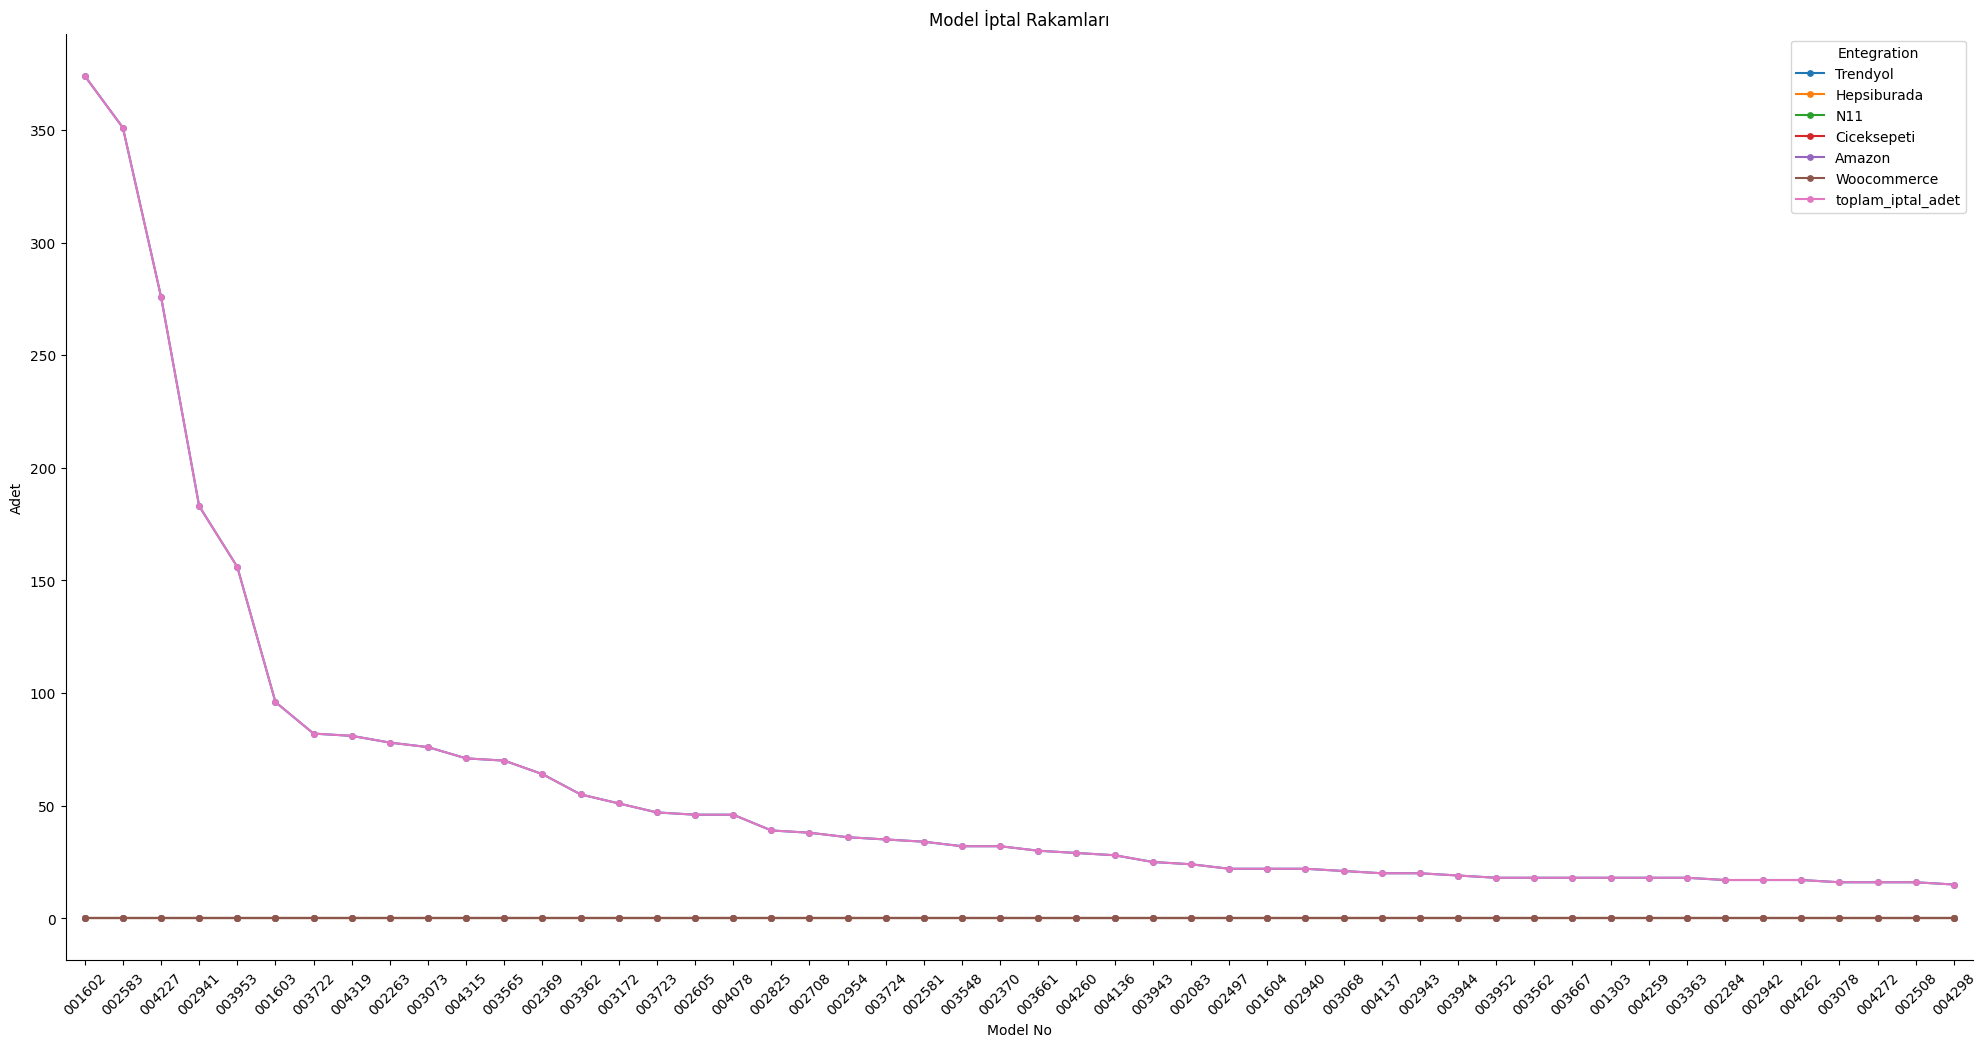

In [292]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.catplot(x="model", y="vals", hue='cols', data=dfm_select2, kind='point', legend_out=False, height=10, aspect=2, linewidth=1.5)
# sns.pointplot(x="model", y="vals", hue='cols', data=dfm_select)
plt.xlabel("Model No")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Model İptal Rakamları")
plt.legend(title='Entegration', loc='upper right');

In [293]:
df_cancel_select_top = df_cancel_name_quantity_entegration_drop.head(20)
df_cancel_select_top

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
0,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,374,0,0,0,0,0,374
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,351,0,0,0,0,0,351
2,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,183,0,0,0,0,0,183
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,156,0,0,0,0,0,156
5,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",001603,96,0,0,0,0,0,96
6,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,82,0,0,0,0,0,82
7,Awox Kafija Kahve Makinesi,004319,81,0,0,0,0,0,81
8,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",002263,78,0,0,0,0,0,78
9,Çok Amaçlı Düzenleyici Kutu Mini 40X30X26 Cm Bej,003073,76,0,0,0,0,0,76


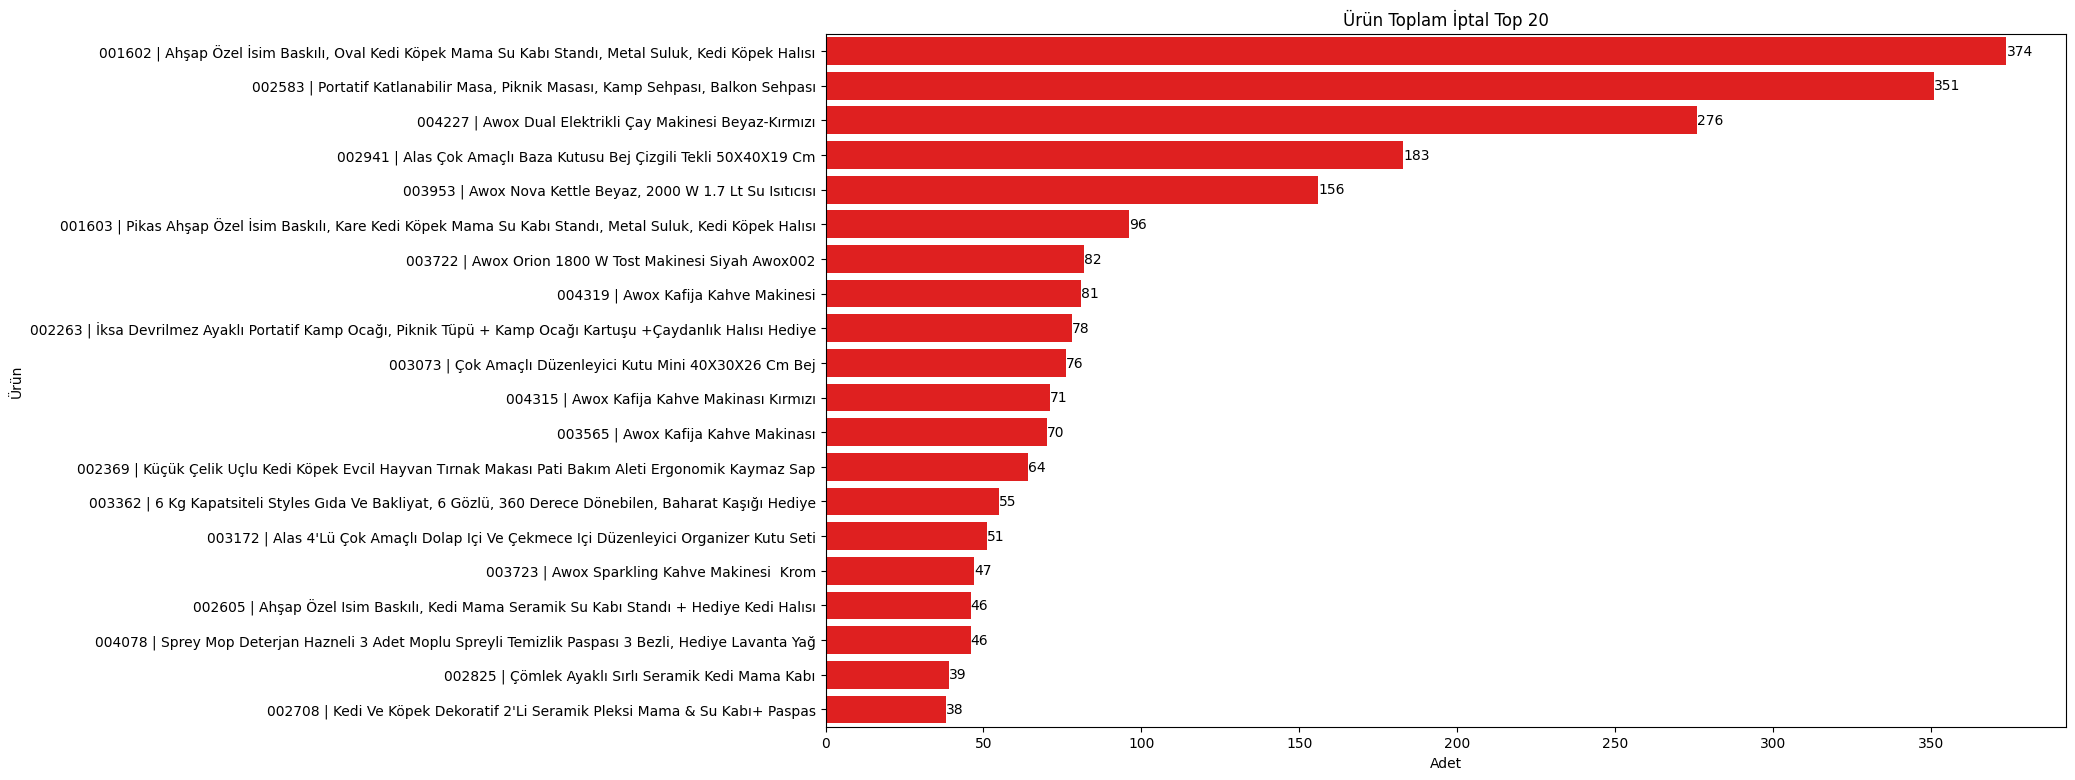

In [294]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_select_top, x="toplam_iptal_adet", y="product_name", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Adet")
# plt.xticks(rotation=45)

# y eksenindeki etiketlere ekleme yapıyoruz. 
ax.set_yticks(range(len(df_cancel_select_top)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_cancel_select_top.loc[:,"model"] + " | " + df_cancel_select_top.loc[:,"product_name"]))

plt.ylabel("Ürün")
plt.title("Ürün Toplam İptal Top 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [295]:
df_cancel_select_last = df_cancel_name_quantity_entegration_drop.tail(20)
df_cancel_select_last

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Amazon,Woocommerce,toplam_iptal_adet
294,Bas-Kes El Rondosu,002860,1,0,0,0,0,0,1
295,10’Lu Geometrik Yumurta,002877,1,0,0,0,0,0,1
296,"Aralıklı Plastik Kedi Kumu Küreği,Temizleme El...",002955,1,0,0,0,0,0,1
297,Bebek Saç Fırçası Yeni Doğan Çocuklar Için Doğ...,002973,1,0,0,0,0,0,1
298,"Çocuk Saç Fırçası, Çocuk Tarağı, Doğal Keçi Kı...",002974,1,0,0,0,0,0,1
299,Kedi Köpek Su Sebili Otomatik Su Pınarı Su Çeş...,002989,1,0,0,0,0,0,1
300,Doğal El Yapımı Bıttımlı Sabun Çiftli,003000,1,0,0,0,0,0,1
301,"Amber Cam Şişe, Sprey Başlıklı Şişe 50Ml",003066,1,0,0,0,0,0,1
302,Thermolav Adalılar Kauçuk Termofor Sıcak Su T...,003336,1,0,0,0,0,0,1
303,Mega Yorgan Hurcu 80 X 60 X 40 Cm Gri,003083,1,0,0,0,0,0,1


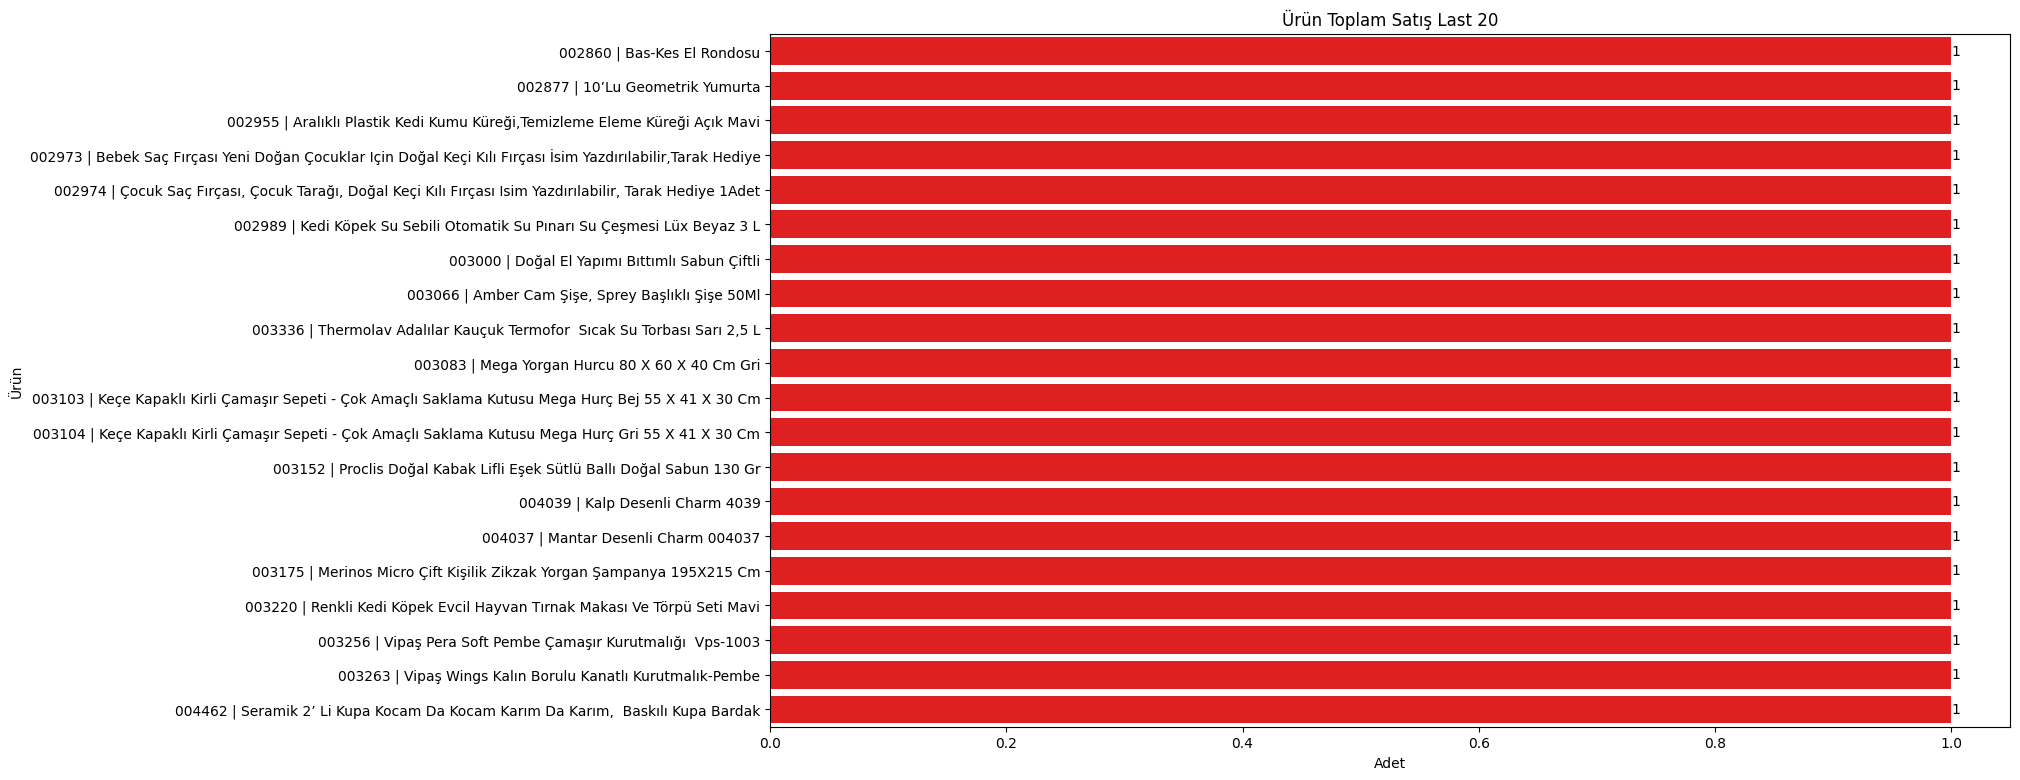

In [296]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_select_last, x="toplam_iptal_adet", y="product_name", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Adet")
# plt.xticks(rotation=45)
# y eksenindeki etiketlere ekleme yapıyoruz. 
ax.set_yticks(range(len(df_cancel_select_last)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_cancel_select_last.loc[:,"model"] + " | " + df_cancel_select_last.loc[:,"product_name"]))

plt.ylabel("Ürün")
plt.title("Ürün Toplam Satış Last 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

##### Add Cancel Order To Sales

###### Part 1

In [297]:
df_sales_name_quantity_entegration_drop

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0
...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [298]:
df_cancel_name_quantity_entegration_drop_var = df_cancel_name_quantity_entegration_drop[["model","toplam_iptal_adet"]]
df_cancel_name_quantity_entegration_drop_var

,model,toplam_iptal_adet
0,001602,374
1,002583,351
2,004227,276
3,002941,183
4,003953,156
...,...,...
309,003175,1
310,003220,1
311,003256,1
312,003263,1


In [299]:
df_sales_cancel_quantity_all = pd.merge(df_sales_name_quantity_entegration_drop, df_cancel_name_quantity_entegration_drop_var, how="left", on="model")
df_sales_cancel_quantity_all.fillna(0, inplace=True)
df_sales_cancel_quantity_all

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_iptal_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,351.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,374.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,183.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,96.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,64.0
...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [300]:
df_sales_cancel_quantity_all.to_excel(fr"{output_path}\Entegra Ürün Satış Ve İptal Rakamları Adet Master ({variable_date}).xlsx", index=False)

###### Part 2

In [301]:
df_sales_merged

,model,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl
0,002583,2.063548e+06,210622.6234,2.274171e+06
1,004319,1.557872e+06,309652.3924,1.867525e+06
2,003722,1.362371e+06,264393.3699,1.626764e+06
3,003661,1.193069e+06,237962.4596,1.431032e+06
4,001602,1.189204e+06,232260.3444,1.421462e+06
...,...,...,...,...
960,003849,7.083330e+01,14.1667,8.500000e+01
961,003843,5.986670e+01,11.9733,7.184000e+01
962,002235,5.833000e+01,11.6700,7.000000e+01
963,002236,5.833000e+01,11.6700,7.000000e+01


In [302]:
df_cancel_merged

,model,toplam_iptal_satış_tl,toplam_iptal_vergi_tl,toplam_iptal_brüt_satış_tl
0,004227,66621.30,13324.28,79945.58
1,003661,59164.18,11399.82,70564.00
2,002583,50224.63,5138.42,55363.05
3,001602,49560.11,9718.59,59278.61
4,004319,44126.73,8825.27,52952.00
...,...,...,...,...
309,002123,32.40,6.48,38.88
310,004380,30.00,6.00,36.00
311,003066,29.17,5.83,35.00
312,002841,29.16,5.83,34.99


In [303]:
df_sales_cancel_quantity_tl_all = pd.merge(df_sales_cancel_quantity_all, df_sales_merged, how="left", on="model")
df_sales_cancel_quantity_tl_all2 = pd.merge(df_sales_cancel_quantity_tl_all, df_cancel_merged, how="left", on="model")
df_sales_cancel_quantity_tl_all2.fillna(0, inplace=True)
df_sales_cancel_quantity_tl_all2

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_iptal_adet,toplam_net_satış_tl,toplam_vergi_tl,toplam_brüt_satış_tl,toplam_iptal_satış_tl,toplam_iptal_vergi_tl,toplam_iptal_brüt_satış_tl
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,351.0,2.063548e+06,210622.6234,2.274171e+06,50224.63,5138.42,55363.05
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,374.0,1.189204e+06,232260.3444,1.421462e+06,49560.11,9718.59,59278.61
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,183.0,7.244912e+05,70972.5902,7.954638e+05,19037.37,1852.38,20889.75
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,96.0,5.433420e+05,107224.9762,6.505665e+05,13077.08,2560.16,15637.21
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,64.0,1.859611e+05,35068.3133,2.210269e+05,5163.57,1022.20,6185.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.659000e+02,36.5900,4.024900e+02,0.00,0.00,0.00
961,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.659000e+02,36.5900,4.024900e+02,0.00,0.00,0.00
962,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.181700e+02,31.8200,3.499900e+02,0.00,0.00,0.00
963,Brillahome Lilyum Kaymaz Taban Kadife Dokuma H...,003505,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.444550e+03,144.4500,1.589000e+03,0.00,0.00,0.00


In [304]:
df_sales_cancel_quantity_tl_all2.to_excel(fr"{output_path}\Entegra Ürün Satış Ve İptal Adet Ve TL Master ({variable_date}).xlsx", index=False)

##### Sales Cancel Visualization

In [305]:
df_sales_cancel_all_select = df_sales_cancel_quantity_all.head(30)
df_sales_cancel_all_select

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,toplam_satış_adet,toplam_iptal_adet
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,63.0,18.0,3555.0,1813.0,7727.0,2.0,13178.0,351.0
1,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,1.0,166.0,237.0,182.0,8248.0,102.0,8936.0,374.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,6867.0,11.0,6880.0,183.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,151.0,787.0,31.0,3117.0,32.0,4118.0,96.0
4,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,10.0,1312.0,60.0,2056.0,5.0,3443.0,64.0
5,Awox Kafija Kahve Makinesi,004319,0.0,0.0,135.0,0.0,2739.0,0.0,2874.0,81.0
6,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,320.0,81.0,2033.0,319.0,2753.0,55.0
7,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,218.0,0.0,2405.0,0.0,2623.0,82.0
8,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,0.0,0.0,443.0,0.0,2079.0,0.0,2522.0,276.0
9,Sprey Mop Deterjan Hazneli 4 Adet Moplu Spreyl...,004078,0.0,0.0,248.0,0.0,2068.0,10.0,2326.0,46.0


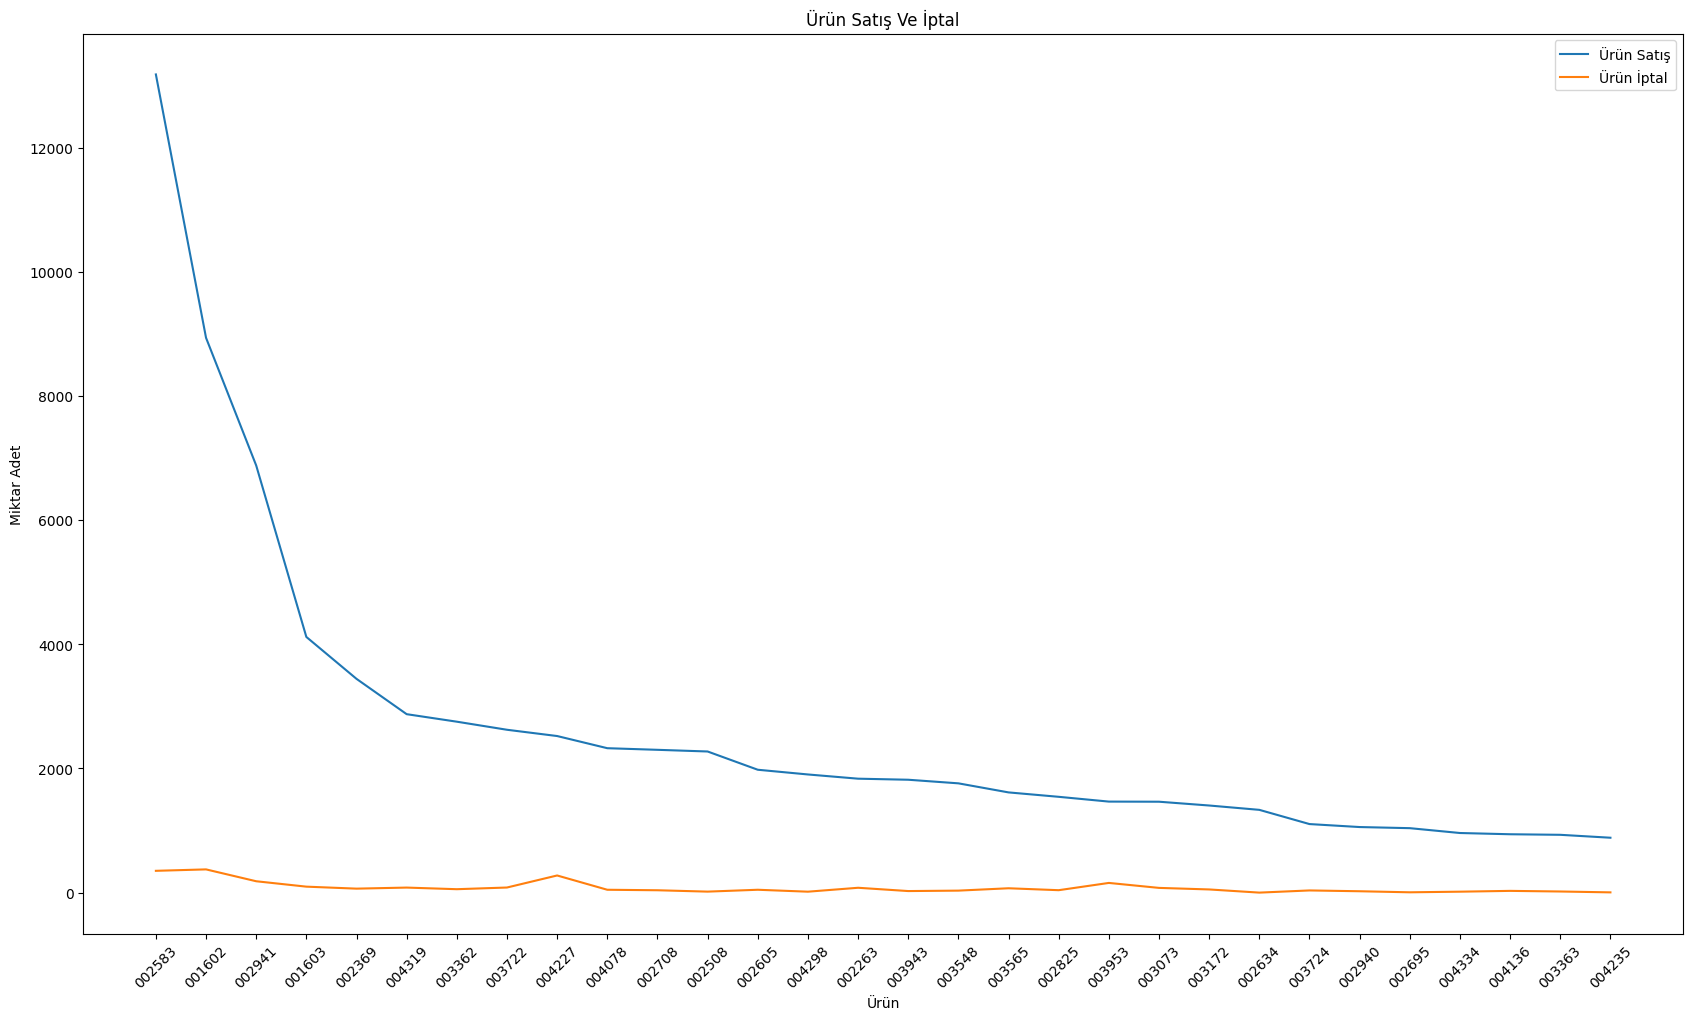

In [306]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_sales_cancel_all_select["model"],df_sales_cancel_all_select["toplam_satış_adet"],label='Ürün Satış')
ax.plot(df_sales_cancel_all_select["model"],df_sales_cancel_all_select["toplam_iptal_adet"],label="Ürün İptal")
ax.set_title("Ürün Satış Ve İptal")
ax.set_ylabel("Miktar Adet")
ax.set_xlabel("Ürün")
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 40)
ax.legend(loc=0);

In [307]:
df_sales_total_tax = pd.DataFrame(df_entegra_select_sales[["total","tax","grand_total"]].sum()).reset_index()
df_sales_total_tax.rename(columns={"index":"name", 0:"value"}, inplace=True)
df_sales_total_tax

,name,value
0,total,3.019970e+07
1,tax,5.332863e+06
2,grand_total,3.553254e+07


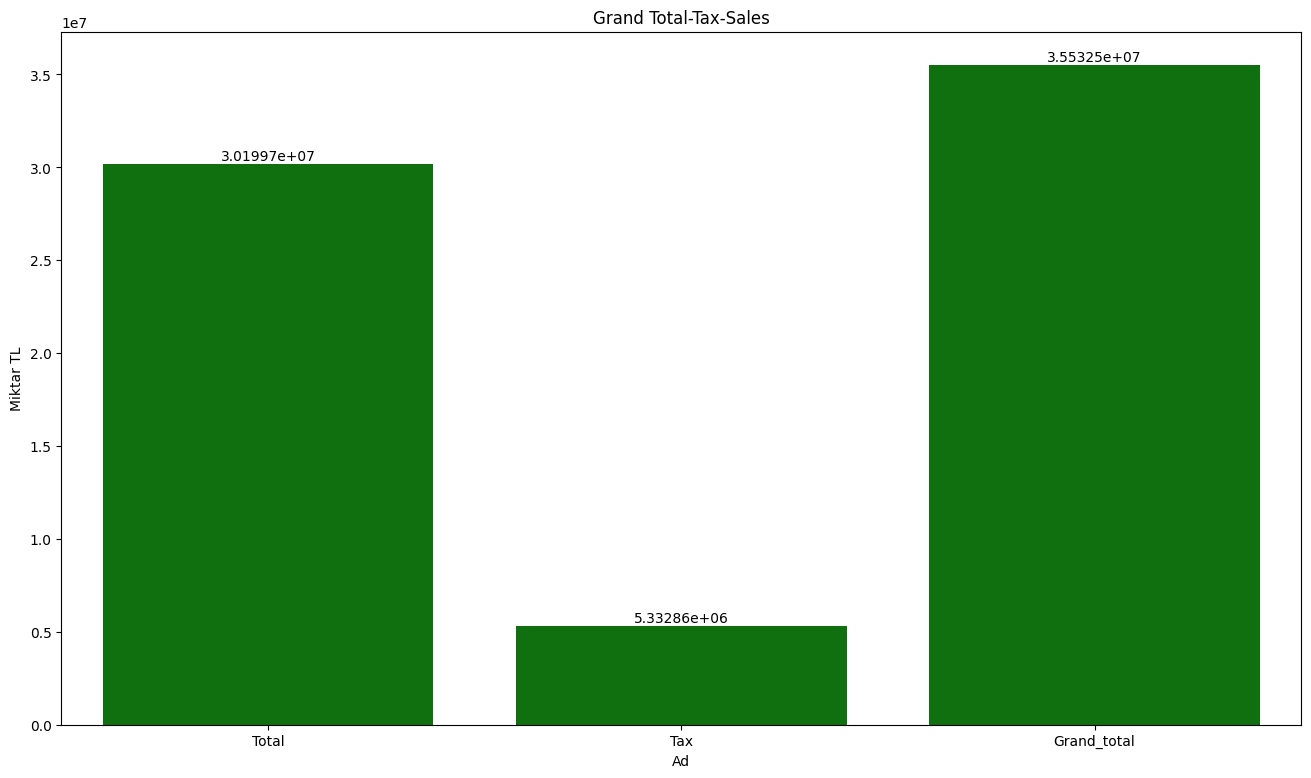

In [308]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_total_tax, x="name", y="value", color="green")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ad")
# plt.xticks(rotation=45)

# x eksenindeki etiketleri büyük harf yapalım
xticklabel_var = [label.get_text().capitalize() for label in graph.get_xticklabels()]
ax.set_xticks(range(len(xticklabel_var))) # Etiketlerin konumlarını ayarla
ax.set_xticklabels(xticklabel_var)


plt.ylabel("Miktar TL")
plt.title("Grand Total-Tax-Sales")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [309]:
df_cancel_total_tax = pd.DataFrame(df_entegra_select_cancel[["total","tax","grand_total"]].sum()).reset_index()
df_cancel_total_tax.rename(columns={"index":"name", 0:"value"}, inplace=True)
df_cancel_total_tax

,name,value
0,total,1063606.01
1,tax,193825.20
2,grand_total,1257430.60


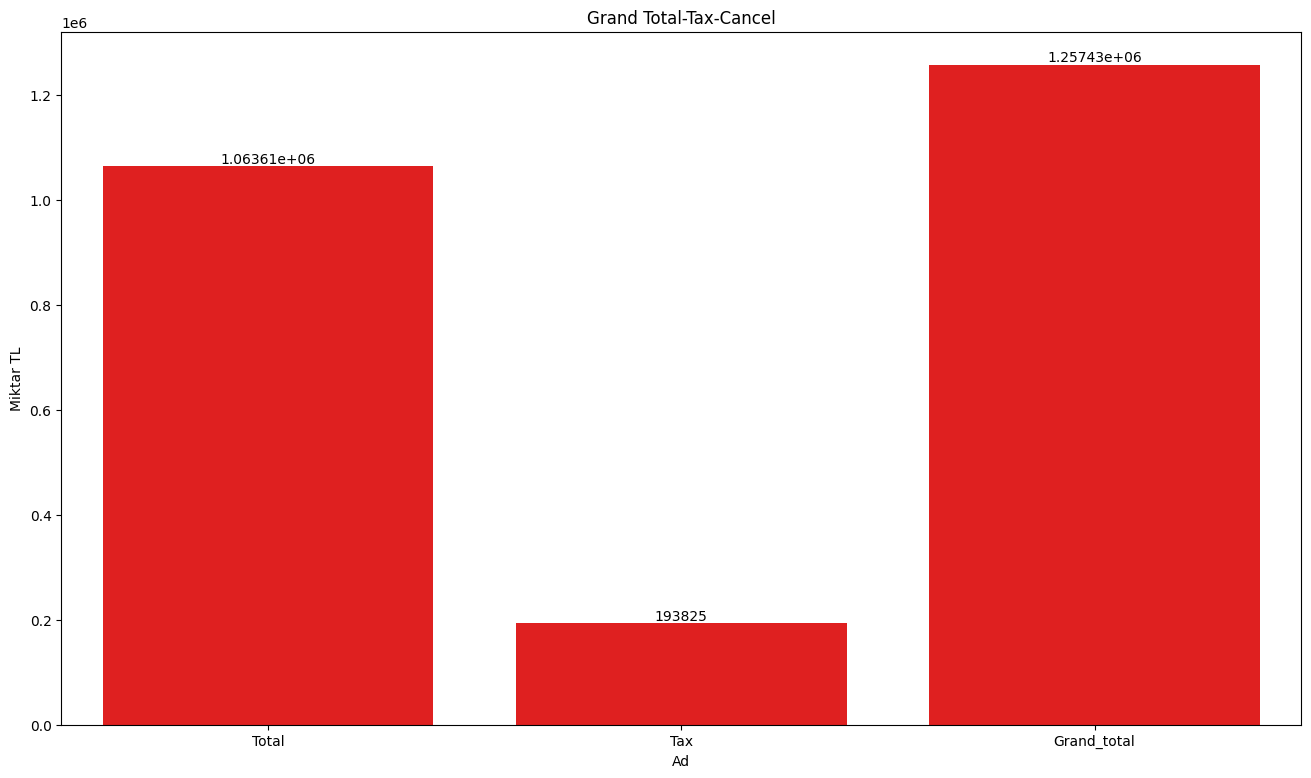

In [310]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_total_tax, x="name", y="value", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ad")
# plt.xticks(rotation=45)

# x eksenindeki etiketleri büyük harf yapalım
xticklabel_var = [label.get_text().capitalize() for label in graph.get_xticklabels()]
ax.set_xticks(range(len(xticklabel_var))) # Etiketlerin konumlarını ayarla
ax.set_xticklabels(xticklabel_var)


plt.ylabel("Miktar TL")
plt.title("Grand Total-Tax-Cancel")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [311]:
# for i in graph.get_xticklabels():
#     print(i.get_text())

In [312]:
# for i in [label.get_text() for label in graph.get_xticklabels()]:
#     print(str.capitalize(i))

In [313]:
df_entegra_total_tax = df_entegra_select[["entegration","total","tax","grand_total"]]
df_entegra_total_tax

,entegration,total,tax,grand_total
0,Trendyol,391.670,78.330,470.00
1,Trendyol,395.530,48.470,444.00
2,Trendyol,165.830,33.170,199.00
3,Trendyol,215.830,43.170,259.00
4,Trendyol,181.820,18.180,200.00
...,...,...,...,...
90392,Trendyol,133.330,26.670,160.00
90393,Trendyol,154.170,30.830,185.00
90394,Hepsiburada,33.325,6.665,39.99
90395,Trendyol,142.500,28.500,171.00


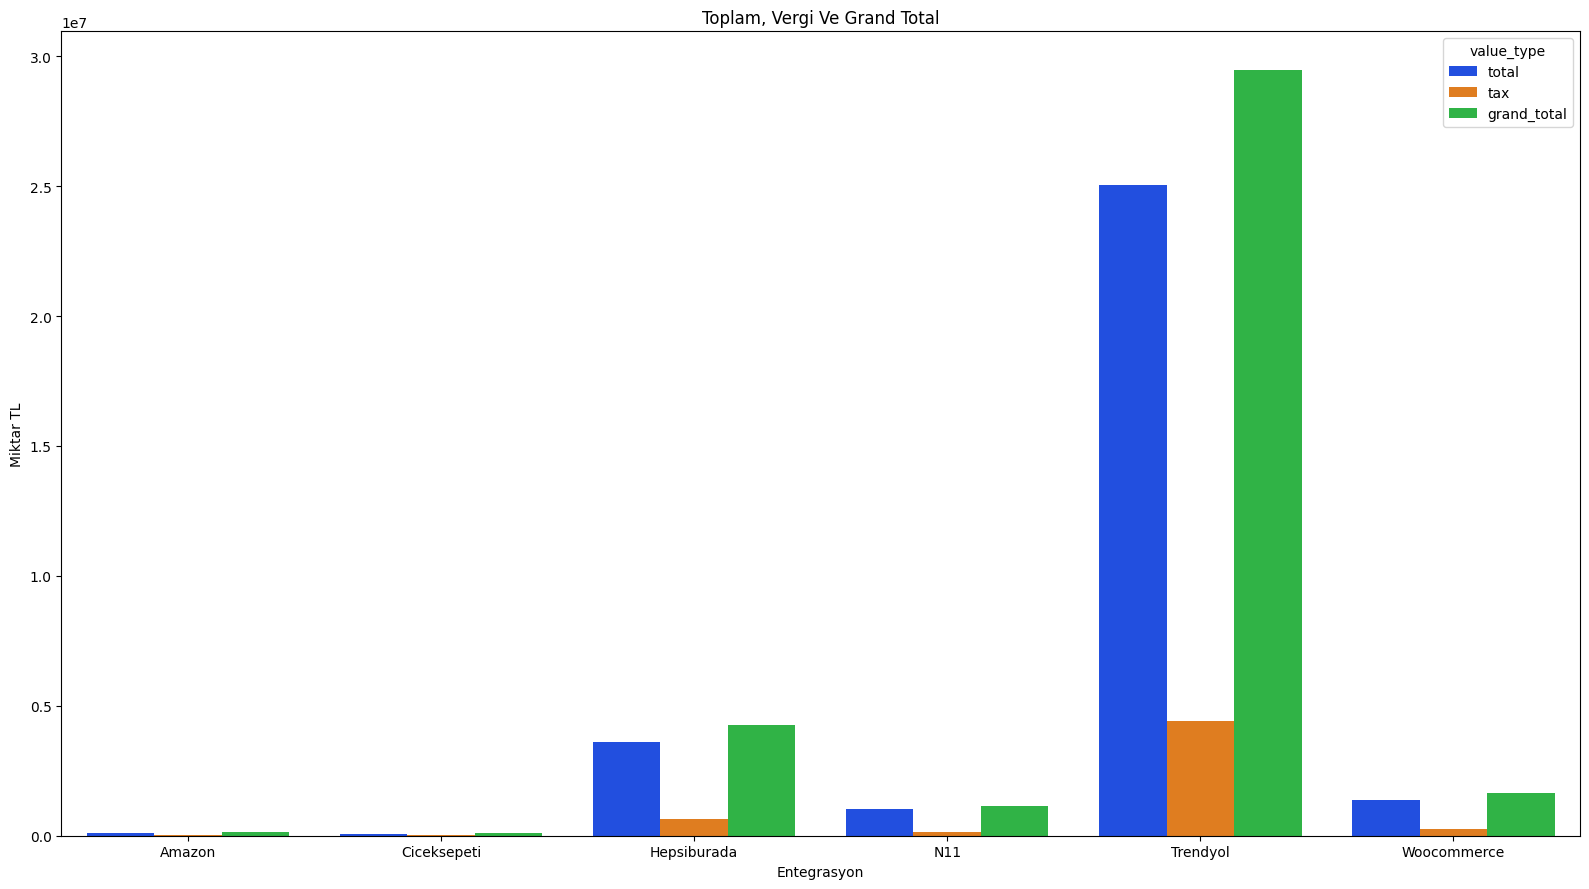

In [314]:
df_grouped = df_entegra_total_tax.groupby('entegration').sum().reset_index()

# Melt işlemi ile total, tax, grand_total sütunlarını birleştirelim
df_melted = pd.melt(df_grouped, id_vars=['entegration'], value_vars=['total', 'tax', 'grand_total'], var_name='value_type', value_name='value')

# Grafik çizimi için seaborn barplot kullanalım
plt.figure(figsize=(16, 9))
graph = sns.barplot(data=df_melted, x='entegration', y='value', hue='value_type', palette='bright')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Toplam, Vergi Ve Grand Total')
plt.xlabel('Entegrasyon')
plt.ylabel('Miktar TL')

# Görseli gösterelim
plt.tight_layout()
plt.show()

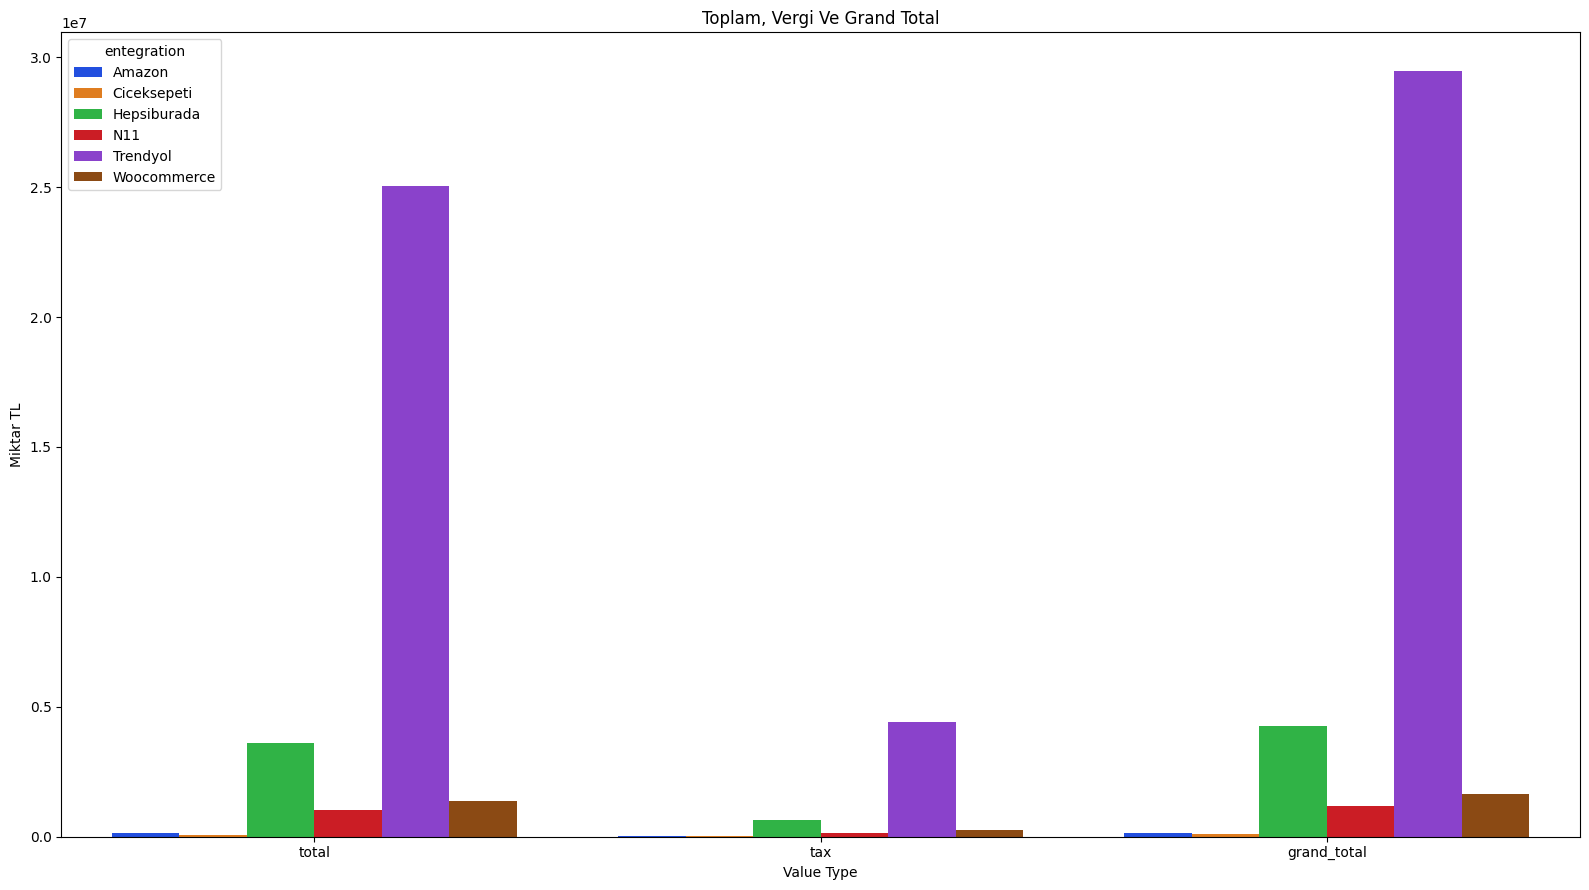

In [315]:
df_grouped = df_entegra_total_tax.groupby('entegration').sum().reset_index()

# Melt işlemi ile total, tax, grand_total sütunlarını birleştirelim
df_melted = pd.melt(df_grouped, id_vars=['entegration'], value_vars=['total', 'tax', 'grand_total'], var_name='value_type', value_name='value')

# Grafik çizimi için seaborn barplot kullanalım
plt.figure(figsize=(16, 9))
graph = sns.barplot(data=df_melted, x='value_type', y='value', hue='entegration', palette='bright')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Toplam, Vergi Ve Grand Total')
plt.xlabel('Value Type')
plt.ylabel('Miktar TL')

# Görseli gösterelim
plt.tight_layout()
plt.show()

##### Sales Time Analysis

In [316]:
df_entegra_select_sales

,order_number,model,pov_productcode,date,time,product_name,datetime,total_product_quantity,entegration,total,tax,grand_total,company,cargo_company,status_name,city,country,latitude,longitude
0,2383110310,003362,Nan,2024-09-05,10:54:27,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-09-05 10:54:27,1,Trendyol,391.670,78.330,470.00,Ali Özdemir,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
1,2383102583,004382,Nan,2024-09-05,10:50:42,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2024-09-05 10:50:42,7,Trendyol,395.530,48.470,444.00,Tuğba Sayar,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
2,2383091113,001602,Nan,2024-09-05,10:43:15,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:43:15,1,Trendyol,165.830,33.170,199.00,Tuba Koca,Trendyolekspress,Onaylandı,Ankara,Turkey,39.920776,32.854050
3,2383085464,001602,Nan,2024-09-05,10:40:26,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-09-05 10:40:26,2,Trendyol,215.830,43.170,259.00,Doğa Özkan,Trendyolekspress,Onaylandı,Istanbul,Turkey,41.006381,28.975872
4,2383076067,002583,220647971025,2024-09-05,10:34:55,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",2024-09-05 10:34:55,1,Trendyol,181.820,18.180,200.00,Damla Beşer,Trendyolekspress,Onaylandı,Sivas,Turkey,39.749973,37.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88086,2036971893,001603,Nan,2024-03-01,00:16:54,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",2024-03-01 00:16:54,1,Trendyol,133.330,26.670,160.00,Gülizar Sarı,Trendyolekspress,Onaylandı,Samsun,Turkey,41.294615,36.332060
88087,2036970386,002429,Nan,2024-03-01,00:16:07,Bts3 Boyama Tuval Sayılı Set 25X35 Yunus,2024-03-01 00:16:07,1,Trendyol,154.170,30.830,185.00,Zübeyde Demi̇rel,Trendyolekspress,Onaylandı,Corum,Turkey,40.550470,34.954497
88088,0888556689,002369,Nan,2024-03-01,00:14:02,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,2024-03-01 00:14:02,1,Hepsiburada,33.325,6.665,39.99,İrem Erbey,Hepsijet,Onaylandı,Izmir,Turkey,38.423743,27.142802
88089,2036956451,002284,Yatak54896513739,2024-03-01,00:05:22,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,2024-03-01 00:05:22,1,Trendyol,142.500,28.500,171.00,Esma Söylemez,Trendyolekspress,Onaylandı,Konya,Turkey,37.872734,32.492438


In [317]:
df_sales_time_select = df_entegra_select_sales[["date","time","total_product_quantity","total","tax","grand_total"]]
df_sales_time_select.head(5)

,date,time,total_product_quantity,total,tax,grand_total
0,2024-09-05,10:54:27,1,391.67,78.33,470.0
1,2024-09-05,10:50:42,7,395.53,48.47,444.0
2,2024-09-05,10:43:15,1,165.83,33.17,199.0
3,2024-09-05,10:40:26,2,215.83,43.17,259.0
4,2024-09-05,10:34:55,1,181.82,18.18,200.0


In [318]:
df_sales_time_select.loc[:,"month"] = pd.to_datetime(df_sales_time_select.loc[:,"date"], format='%Y-%m-%d').dt.month
df_sales_time_select.loc[:,"hour"] = pd.to_datetime(df_sales_time_select.loc[:,"time"], format='%H:%M:%S').dt.hour
df_sales_time_select.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_4752\2516059425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_time_select.loc[:,"month"] = pd.to_datetime(df_sales_time_select.loc[:,"date"], format='%Y-%m-%d').dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_4752\2516059425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_time_select.loc[:,"hour"] = pd.to_datetime(df_sales_time_select.loc[:,"time"], format='%H:%M:%S').dt.hour


,date,time,total_product_quantity,total,tax,grand_total,month,hour
0,2024-09-05,10:54:27,1,391.67,78.33,470.0,9,10
1,2024-09-05,10:50:42,7,395.53,48.47,444.0,9,10
2,2024-09-05,10:43:15,1,165.83,33.17,199.0,9,10
3,2024-09-05,10:40:26,2,215.83,43.17,259.0,9,10
4,2024-09-05,10:34:55,1,181.82,18.18,200.0,9,10


In [319]:
df_sales_time_month = df_sales_time_select.groupby("month")[["total_product_quantity","total","tax","grand_total"]].sum().reset_index()
df_sales_time_month

,month,total_product_quantity,total,tax,grand_total
0,3,17159,4.043321e+06,7.328223e+05,4.776141e+06
1,4,20913,4.907594e+06,8.476700e+05,5.755261e+06
2,5,29669,7.815962e+06,1.405397e+06,9.221355e+06
3,6,25178,5.770932e+06,1.017560e+06,6.788484e+06
4,7,20328,4.396500e+06,7.629599e+05,5.159456e+06
5,8,13654,2.920786e+06,5.067039e+05,3.427489e+06
6,9,1809,3.446065e+05,5.975012e+04,4.043565e+05


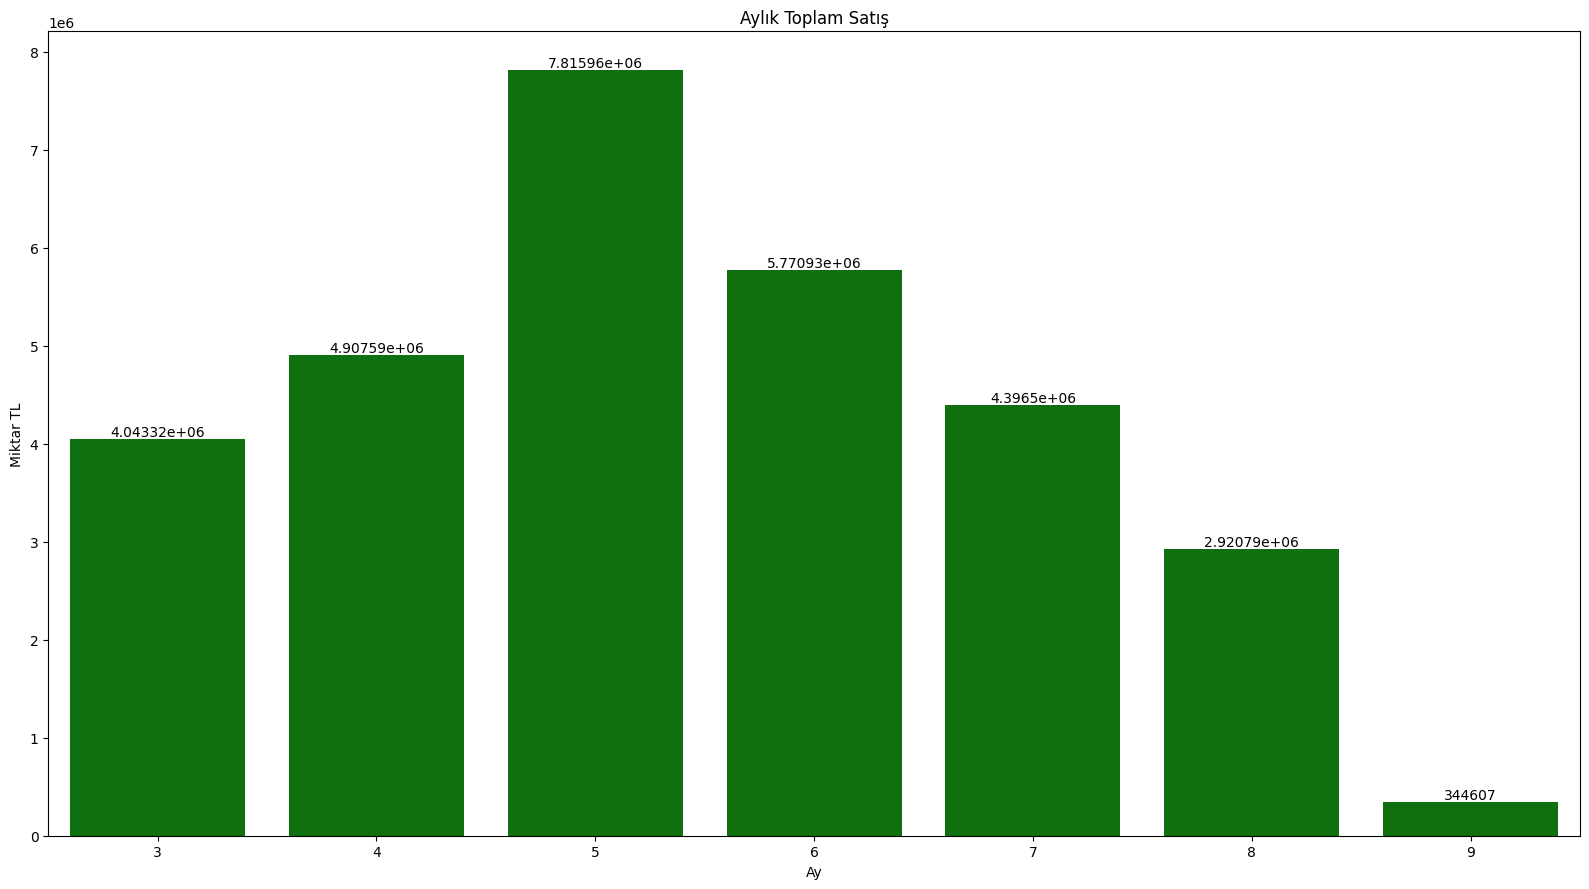

In [320]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)

# graph = sns.barplot(data=df_entegra_select_sales, x=pd.to_datetime(df_entegra_select_sales["date"]).dt.month, y='total', estimator="sum")
graph = sns.barplot(data=df_sales_time_month, x='month', y='total', color='green')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Aylık Toplam Satış')
plt.xlabel('Ay')
plt.ylabel('Miktar TL')
graph.bar_label(ax.containers[0])

# Görseli gösterelim
plt.tight_layout()
plt.show()

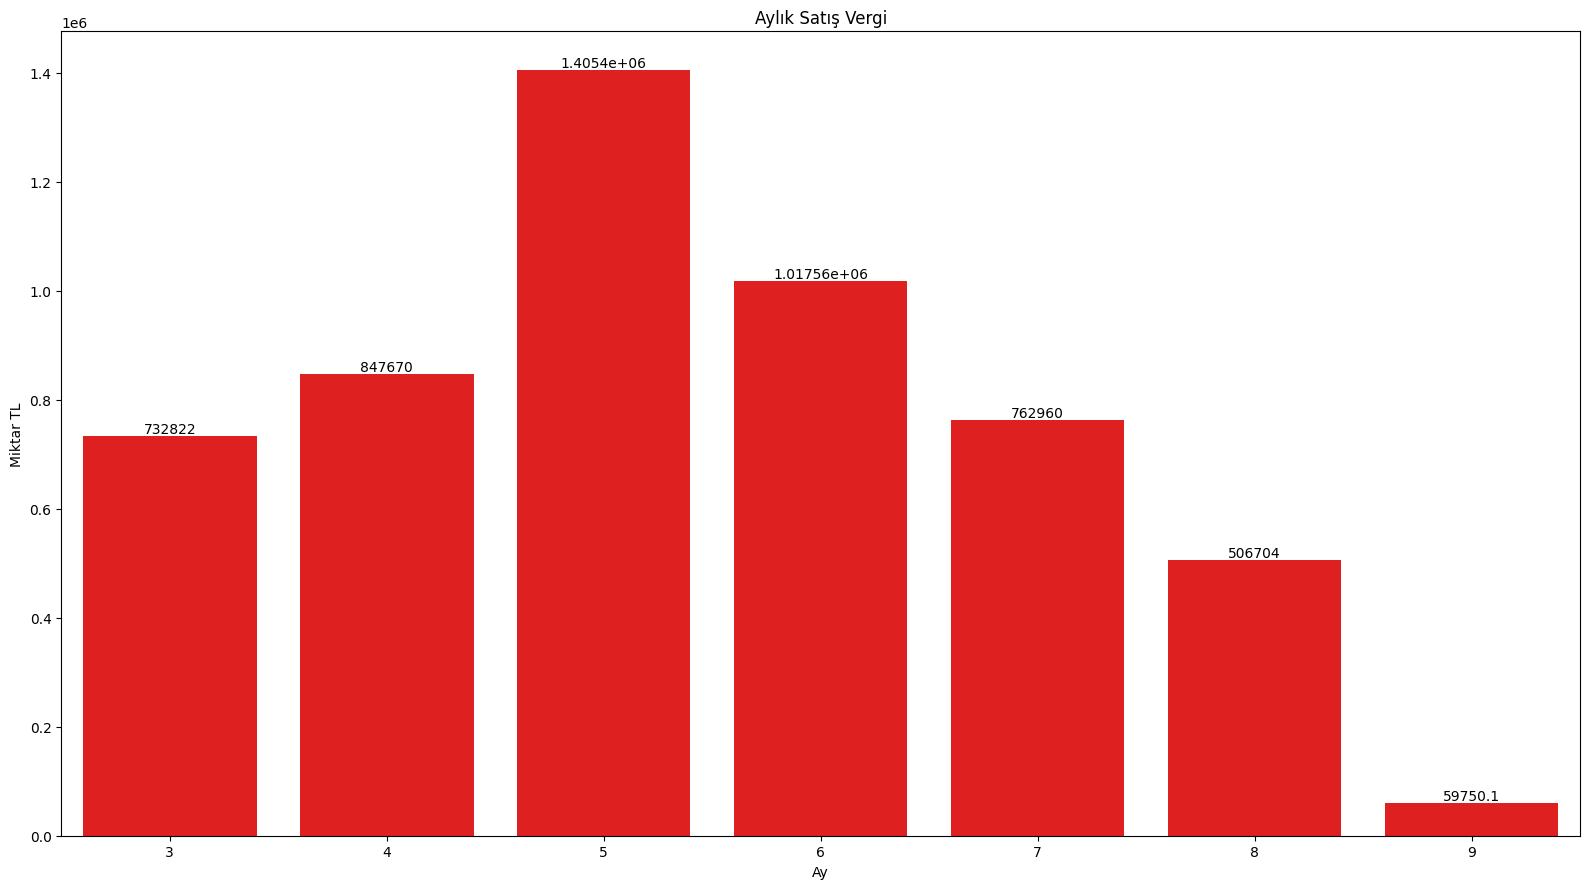

In [321]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)

# graph = sns.barplot(data=df_entegra_select_sales, x=pd.to_datetime(df_entegra_select_sales["date"]).dt.month, y='total', estimator="sum")
graph = sns.barplot(data=df_sales_time_month, x='month', y='tax', color='red')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Aylık Satış Vergi')
plt.xlabel('Ay')
plt.ylabel('Miktar TL')
graph.bar_label(ax.containers[0])

# Görseli gösterelim
plt.tight_layout()
plt.show()

In [322]:
df_sales_time_hour = df_sales_time_select.groupby("hour")[["total","tax","grand_total"]].sum().reset_index()
df_sales_time_hour

,hour,total,tax,grand_total
0,0,1.264364e+06,218381.5635,1.482745e+06
1,1,7.238766e+05,124411.2571,8.482874e+05
2,2,3.574498e+05,61774.1415,4.192236e+05
3,3,1.814898e+05,28950.4211,2.104400e+05
4,4,1.376240e+05,23853.8757,1.614778e+05
5,5,1.328542e+05,22481.5555,1.553356e+05
6,6,1.867686e+05,32785.8702,2.195544e+05
7,7,3.631127e+05,66314.5696,4.294271e+05
8,8,6.433224e+05,114037.1473,7.573592e+05
9,9,1.132546e+06,202474.8076,1.335020e+06


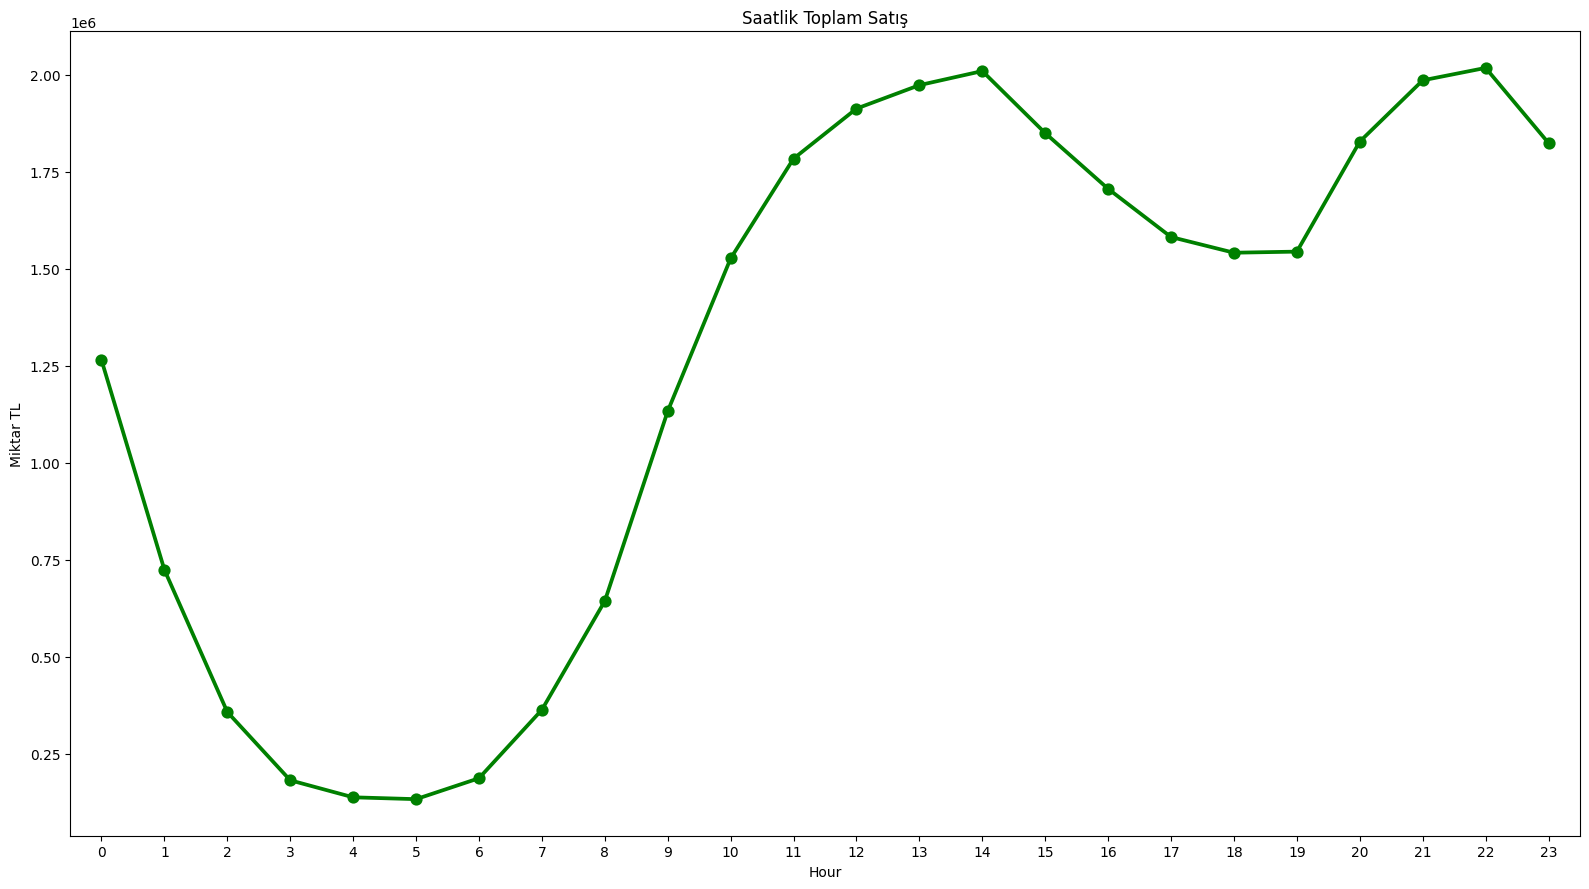

In [323]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)

# graph = sns.barplot(data=df_entegra_select_sales, x=pd.to_datetime(df_entegra_select_sales["date"]).dt.month, y='total', estimator="sum")
graph = sns.pointplot(data=df_sales_time_hour, x='hour', y='total', color='green')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Saatlik Toplam Satış')
plt.xlabel('Hour')
plt.ylabel('Miktar TL')

# Görseli gösterelim
plt.tight_layout()
plt.show()

#### HB Temp

In [14]:
df_ham = pd.read_excel(r"C:\Users\user\Desktop\HB HAM.xlsx")
df_ham

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [15]:
df_ham["SKU"] = df_ham["SKU"].apply(lambda code: whitespace_del(code))
df_ham

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [16]:
df_all = pd.read_excel(r"C:\Users\user\Desktop\HB SON.xlsx")
df_all

,SKU,Barkod
0,OUTVARIKY68672,0078257686728
1,HBV00000TY39B,2496695636224
2,sr45,241067121317799
3,68672-00,ERS78257686728
4,AX20349,3699948455151
...,...,...
2842,000063,739339869971
2843,000062,739339869957
2844,000112,8697671470960
2845,000133,8809213765551


In [17]:
df_all["SKU"] = df_all["SKU"].apply(lambda code: whitespace_del(code))
df_all

,SKU,Barkod
0,OUTVARIKY68672,0078257686728
1,HBV00000TY39B,2496695636224
2,sr45,241067121317799
3,68672-00,ERS78257686728
4,AX20349,3699948455151
...,...,...
2842,000063,739339869971
2843,000062,739339869957
2844,000112,8697671470960
2845,000133,8809213765551


In [18]:
df_output = pd.merge(df_ham, df_all, how="left", on="SKU")
df_output.drop_duplicates(inplace=True)
df_output

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,Barkod
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X,NaN
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y,NaN
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE,NaN
3,NaN,1,ENT-HB604808211950,HBCV00001V218U,NaN
4,NaN,1,ENT-HB604808211967,HBCV00001V218N,NaN
...,...,...,...,...,...
1307,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ,NaN
1308,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG,NaN
1309,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ,NaN
1310,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT,NaN


In [19]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UniqueIdentifier  0 non-null      float64
 1   Buybox Sırası     1312 non-null   int64  
 2   Satıcı Stok Kodu  1312 non-null   object 
 3   SKU               1312 non-null   object 
 4   Barkod            33 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [20]:
df_output = df_output.dropna(subset=["SKU", "Barkod"])
df_output

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,Barkod
425,NaN,1,HBCV00000RQ3BN,HBCV00000RQ3BN,8696472600958
478,NaN,1,HBCV00003FRPQ2,HBCV00003FRPQ2,00000TYV-1405
479,NaN,2,HBCV00003EOZYW,HBCV00003EOZYW,İNCİTANEMc170029b-2a1
549,NaN,1,HBCV00002MRKPW,HBCV00002MRKPW,stilinburada768fa977-25d
653,NaN,2,HBCV00003B71V9,HBCV00003B71V9,1116320157863
682,NaN,2,HBCV00000EDDWH,HBCV00000EDDWH,8682315112993-1
683,NaN,2,HBCV00000EDDWH,HBCV00000EDDWH,8682315112993
684,NaN,2,HBCV00004EEMZZ,HBCV00004EEMZZ,8682315114577
685,NaN,2,HBCV000025TYN8,HBCV000025TYN8,8682315114195
687,NaN,1,HBCV000025TYNA,HBCV000025TYNA,8682315114096


In [21]:
# df_output.to_excel(r"C:\Users\user\Desktop\HB Eşleşen.xlsx", index=False)

In [22]:
df_all2 = pd.read_excel(r"C:\Users\user\Desktop\HB LOCAL.xlsx")
df_all2.drop_duplicates(inplace=True)
df_all2

,SKU,Barkod
0,HBCV00002T3FGP,604808214197
1,HBCV00004BLZM7,K8683372407008
2,HBCV00004BLZEX,S8683372407008
3,HBCV00004BLZEW,Y8683372407008
4,HBCV000003F3NY,K8683372407008
...,...,...
417,HBCV00005DJ8XU,vps100321657468
418,HBCV000020G4H7,vps100321657468
419,HBCV00001X9ZS15,vps100321657468
420,HBCV00001MWJLC,0042624576


In [23]:
df_all2["SKU"] = df_all2["SKU"].apply(lambda code: whitespace_del(code))
df_all2

,SKU,Barkod
0,HBCV00002T3FGP,604808214197
1,HBCV00004BLZM7,K8683372407008
2,HBCV00004BLZEX,S8683372407008
3,HBCV00004BLZEW,Y8683372407008
4,HBCV000003F3NY,K8683372407008
...,...,...
417,HBCV00005DJ8XU,vps100321657468
418,HBCV000020G4H7,vps100321657468
419,HBCV00001X9ZS15,vps100321657468
420,HBCV00001MWJLC,0042624576


In [24]:
df_output2 = pd.merge(df_ham, df_all2, how="left", on="SKU")
df_output2.drop_duplicates(inplace=True)
df_output2

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,Barkod
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X,NaN
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y,NaN
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE,8690741756005
3,NaN,1,ENT-HB604808211387,HBCV00001FDICE,NRG413285161-1
4,NaN,1,ENT-HB604808211387,HBCV00001FDICE,ÇG782302202356
...,...,...,...,...,...
1401,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ,NaN
1402,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG,NaN
1403,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ,NaN
1404,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT,NaN


In [25]:
df_output2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UniqueIdentifier  0 non-null      float64
 1   Buybox Sırası     1406 non-null   int64  
 2   Satıcı Stok Kodu  1406 non-null   object 
 3   SKU               1406 non-null   object 
 4   Barkod            249 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 55.1+ KB


In [26]:
df_output2 = df_output2.dropna(subset=["SKU", "Barkod"])
df_output2

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,Barkod
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE,8690741756005
3,NaN,1,ENT-HB604808211387,HBCV00001FDICE,NRG413285161-1
4,NaN,1,ENT-HB604808211387,HBCV00001FDICE,ÇG782302202356
5,NaN,1,ENT-HB604808211387,HBCV00001FDICE,8684076000144
6,NaN,1,ENT-HB604808211387,HBCV00001FDICE,8684076000304
...,...,...,...,...,...
1076,NaN,1,ENT-HB0043551371454,HBCV00006FF9QO,0043551371454
1077,NaN,1,ENT-HB0040115765646,HBCV00006FFH29,0040115765646
1080,NaN,1,ENT-HB00401286467,HBCV00006FFHKK,00401286467
1082,NaN,1,ENT-HB00401347643,HBCV00006FFHKM,8698898312897


In [28]:
# df_output2.to_excel(r"C:\Users\user\Desktop\HB Eşleşen2.xlsx", index=False)

In [372]:
set1 = set(df_output["SKU"])
set2 = set(df_output2["SKU"])

In [373]:
set1.intersection(set2)

{'HBCV00000AISQZ',
 'HBCV00000EDDWH',
 'HBCV00001MWJLC',
 'HBCV00001P4CHD',
 'HBCV000023CQYY',
 'HBCV00002MRKPW',
 'HBCV00003EOZYW',
 'HBCV00003FRPQ2',
 'HBCV00006091EF'}

In [45]:
df_output_all = pd.concat([df_output, df_output2], axis=0)
df_output_all.drop_duplicates(subset=["SKU","Barkod"], inplace=True)
df_output_all.reset_index(drop=True, inplace=True)
df_output_all["SKU"] = df_output_all["SKU"].apply(lambda code: whitespace_del(code))
df_output_all

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,Barkod
0,NaN,1,HBCV00000RQ3BN,HBCV00000RQ3BN,8696472600958
1,NaN,1,HBCV00003FRPQ2,HBCV00003FRPQ2,00000TYV-1405
2,NaN,2,HBCV00003EOZYW,HBCV00003EOZYW,İNCİTANEMc170029b-2a1
3,NaN,1,HBCV00002MRKPW,HBCV00002MRKPW,stilinburada768fa977-25d
4,NaN,2,HBCV00003B71V9,HBCV00003B71V9,1116320157863
...,...,...,...,...,...
277,NaN,1,ENT-HB0043551371454,HBCV00006FF9QO,0043551371454
278,NaN,1,ENT-HB0040115765646,HBCV00006FFH29,0040115765646
279,NaN,1,ENT-HB00401286467,HBCV00006FFHKK,00401286467
280,NaN,1,ENT-HB00401347643,HBCV00006FFHKM,8698898312897


In [46]:
df_output_all["SKU"].nunique()

177

In [30]:
df_output_all.to_excel(r"C:\Users\user\Desktop\HB Eşleşenler.xlsx", index=False)

In [39]:
sku_list = list(set(df_output_all["SKU"]))
sku_list

['HBCV00005RNUZY',
 'HBCV00006AD0GU',
 'HBCV00004L1YQX',
 'HBCV00005NTBUJ',
 'HBCV000058GVXV',
 'HBCV00006083LT',
 'HBCV000050B25J',
 'HBCV00006FFH29',
 'HBCV00005C3NNX',
 'HBCV00006091EF',
 'HBCV00005DSZW4',
 'HBCV00004EPXDE',
 'HBCV00005VQQC7',
 'HBCV00005BZ40P',
 'HBCV00004B9V3K',
 'HBCV000052Q2U8',
 'HBCV00004T2GF3',
 'HBCV00005V20HK',
 'HBCV000001X1U9',
 'HBCV00005L5V78',
 'HBCV00004ELB1P',
 'HBCV00004DNGS2',
 'HBCV00004J9W60',
 'HBCV00005S71B9',
 'HBCV00002MRKPW',
 'OUTVARIKY68672',
 'HBCV000050A3V5',
 'HBCV00003S170B',
 'HBCV000050PUCV',
 'HBCV00006FF9QO',
 'HBCV00005DT2LG',
 'HBCV000025TYNA',
 'HBCV000069RSZN',
 'HBCV00005D749Q',
 'HBCV00005V2D5K',
 'HBCV00003B71V9',
 'HBCV00005CLX4G',
 'HBCV00004BNTCX',
 'HBCV00006FFHKM',
 'HBCV00005VTIVW',
 'HBCV00004KI8QG',
 'HBCV00004EDSHS',
 'HBCV00005O2033',
 'HBCV000060E8XJ',
 'HBCV00001MWJLC',
 'HBCV000067PK5I',
 'HBCV00005B86XE',
 'HBCV000040EDXA',
 'HBCV00005ROF5N',
 'HBCV000064FWWA',
 'HBCV000066TNB6',
 'HBCV000052Q3MJ',
 'HBCV00004B

In [42]:
df_ham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UniqueIdentifier  0 non-null      float64
 1   Buybox Sırası     1311 non-null   int64  
 2   Satıcı Stok Kodu  1311 non-null   object 
 3   SKU               1311 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 41.1+ KB


In [48]:
df_no_sku = df_ham[~df_ham["SKU"].isin(sku_list)]
df_no_sku

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
5,NaN,1,ENT-HB604808211981,HBCV00001V9NWP
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [49]:
df_no_sku.to_excel(r"C:\Users\user\Desktop\HB Ham Edit.xlsx", index=False)

In [38]:
df_ent_all = pd.read_excel(r"C:\Users\user\Desktop\Entegra All Sales.xlsx")
df_ent_all

,id,order_number,datetime,entegration,status,status_name,company,cargo_code,invoice_country,invoice_city,...,cargo_fee_type_name,cargo_packet_type,cargo_packet_quantity,grand_total_desi,model,product_name,store_product_name,invoice_name,pov_productCode,total_product_quantity
0,201036,2383110310,2024-09-05 10:54:27,trendyol,2,Onaylandı,ali özdemir,7330017026985454,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",NaN,1
1,201035,2383102583,2024-09-05 10:50:42,trendyol,2,Onaylandı,Tuğba Sayar,7330017026917196,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,004382,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2 Adet Çok Amaçlı Multi İnce Temizlik Fırçası ...,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,NaN,7
2,201033,2383091113,2024-09-05 10:43:15,trendyol,2,Onaylandı,Tuba Koca,7330017026782381,NaN,Ankara,...,Satıcı Öder,Dosya,1,0,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",NaN,1
3,201025,2383085464,2024-09-05 10:40:26,trendyol,2,Onaylandı,Doğa Özkan,7330017026738593,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",NaN,2
4,201027,2383076067,2024-09-05 10:34:55,trendyol,2,Onaylandı,Damla Beşer,7330017026623479,NaN,Sivas,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Kam...","Portatif Katlanabilir Masa, Piknik Masası, Kam...","Portatif Katlanabilir Masa, Piknik Masası, Kam...",220647971025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188034,83601,207423367318-1,2024-01-01 00:18:00,N11,1,Yeni Siparis,MELTEM KOCA,112054836588352,NaN,Kütahya,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",Portatif Katlanabilir Piknik Masası + Çaydanlı...,Portatif Katlanabilir Piknik Masası + Çaydanlı...,160620230178,1
188035,83598,1935764998,2024-01-01 00:14:43,trendyol,2,Onaylandı,Sıla Dikel,7330012502018770,NaN,Adıyaman,...,Satıcı Öder,Dosya,1,0,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,3'lü Çok Amaçlı Kutu Mega Çizgili Kahverengi 6...,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,NaN,3
188036,83596,1935755636,2024-01-01 00:02:03,trendyol,2,Onaylandı,özlem yıldız,7330012501918644,NaN,Aydın,...,Satıcı Öder,Dosya,1,0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",NaN,1
188037,83597,201757367316-1,2024-01-01 00:02:00,N11,1,Yeni Siparis,ekrem çelik,112085256588357,NaN,Kocaeli,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",Portatif Katlanabilir Piknik Masası + Çaydanlı...,Portatif Katlanabilir Piknik Masası + Çaydanlı...,160620230178,1


In [39]:
df_ent_all = df_ent_all.drop_duplicates(subset="id")
df_ent_all

,id,order_number,datetime,entegration,status,status_name,company,cargo_code,invoice_country,invoice_city,...,cargo_fee_type_name,cargo_packet_type,cargo_packet_quantity,grand_total_desi,model,product_name,store_product_name,invoice_name,pov_productCode,total_product_quantity
0,201036,2383110310,2024-09-05 10:54:27,trendyol,2,Onaylandı,ali özdemir,7330017026985454,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",NaN,1
1,201035,2383102583,2024-09-05 10:50:42,trendyol,2,Onaylandı,Tuğba Sayar,7330017026917196,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,004382,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,2 Adet Çok Amaçlı Multi İnce Temizlik Fırçası ...,Çok Amaçlı Multi İnce Temizlik Fırçası Derz Ar...,NaN,7
2,201033,2383091113,2024-09-05 10:43:15,trendyol,2,Onaylandı,Tuba Koca,7330017026782381,NaN,Ankara,...,Satıcı Öder,Dosya,1,0,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",NaN,1
3,201025,2383085464,2024-09-05 10:40:26,trendyol,2,Onaylandı,Doğa Özkan,7330017026738593,NaN,İstanbul,...,Satıcı Öder,Dosya,1,0,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...","Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",NaN,2
4,201027,2383076067,2024-09-05 10:34:55,trendyol,2,Onaylandı,Damla Beşer,7330017026623479,NaN,Sivas,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Kam...","Portatif Katlanabilir Masa, Piknik Masası, Kam...","Portatif Katlanabilir Masa, Piknik Masası, Kam...",220647971025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188034,83601,207423367318-1,2024-01-01 00:18:00,N11,1,Yeni Siparis,MELTEM KOCA,112054836588352,NaN,Kütahya,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",Portatif Katlanabilir Piknik Masası + Çaydanlı...,Portatif Katlanabilir Piknik Masası + Çaydanlı...,160620230178,1
188035,83598,1935764998,2024-01-01 00:14:43,trendyol,2,Onaylandı,Sıla Dikel,7330012502018770,NaN,Adıyaman,...,Satıcı Öder,Dosya,1,0,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,3'lü Çok Amaçlı Kutu Mega Çizgili Kahverengi 6...,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,NaN,3
188036,83596,1935755636,2024-01-01 00:02:03,trendyol,2,Onaylandı,özlem yıldız,7330012501918644,NaN,Aydın,...,Satıcı Öder,Dosya,1,0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...","6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",NaN,1
188037,83597,201757367316-1,2024-01-01 00:02:00,N11,1,Yeni Siparis,ekrem çelik,112085256588357,NaN,Kocaeli,...,Satıcı Öder,Dosya,1,0,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",Portatif Katlanabilir Piknik Masası + Çaydanlı...,Portatif Katlanabilir Piknik Masası + Çaydanlı...,160620230178,1


In [40]:
df_ent_all_select = df_ent_all[["store_product_name", "model","pov_productCode","entegration"]]
df_ent_all_select

,store_product_name,model,pov_productCode,entegration
0,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...",003362,NaN,trendyol
1,2 Adet Çok Amaçlı Multi İnce Temizlik Fırçası ...,004382,NaN,trendyol
2,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,NaN,trendyol
3,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,NaN,trendyol
4,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,220647971025,trendyol
...,...,...,...,...
188034,Portatif Katlanabilir Piknik Masası + Çaydanlı...,002583,160620230178,N11
188035,3'lü Çok Amaçlı Kutu Mega Çizgili Kahverengi 6...,002979,NaN,trendyol
188036,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sakl...",003362,NaN,trendyol
188037,Portatif Katlanabilir Piknik Masası + Çaydanlı...,002583,160620230178,N11


In [69]:
df_ent_all_select2 = df_ent_all_select[df_ent_all_select["entegration"] == "HepsiBurada"]
df_ent_all_select2

,store_product_name,model,pov_productCode,entegration
8,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",003548,NaN,HepsiBurada
10,"Pikas Katlanabilir Masa, Kamp Masası, Plastik ...",002583,14421524554,HepsiBurada
14,Cool Direksiyon Katlanır Scooter Yükseklik Aya...,004173,NaN,HepsiBurada
27,Brilla Home Deri Taban Tekli Post Peluş Banyo ...,002643,371894852199,HepsiBurada
29,Cool Wheels Scooter Işıklı Pembe,004138,NaN,HepsiBurada
...,...,...,...,...
187988,Bebek Saç Fırçası Yeni Doğan Çocuklar Için Doğ...,002973,NaN,HepsiBurada
187995,Pikas 6 kg Kapatsiteli Styles Gıda ve Bakliya...,003362,NaN,HepsiBurada
187997,GOBYPET Kedi Köpek 3 Lü Set Otomatik Temizlene...,002369,NaN,HepsiBurada
188001,Pikas 10 kg Kapatsiteli Styles Gıda ve Bakliya...,003363,NaN,HepsiBurada


In [ ]:
df_ent_all_select2.to_excel(r"C:\Users\user\Desktop\Hepsi Burada Son2.xlsx", index=False)

In [25]:
df_hepsi = pd.read_excel(r"C:\Users\user\Desktop\Hepsi Burada.xlsx")
df_hepsi.drop_duplicates(inplace=True)
df_hepsi

,store_product_name,SKU,Satıcı Stok Kodu
0,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB
1,Cool Wheels 12+ Orange Scooter,HBCV000003F3NY,HBCV000003F3NY
2,Awox Sparkling Kahve Makinesi Krom,HBCV00000AISQZ,HBCV00000AISQZ
3,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li...",HBCV00001FDICE,ENT-HB604808211387
4,WB 2000 ml Büyük Kapasiteli Spor Su Şişesi (Yu...,HBCV00001MWJLC,HBCV00001MWJLC
...,...,...,...
907,Blue Focus Ingilizce Öğreniyorum BF111,HBV00000MMRYU,ENT-HB8681176321117
908,Merinos Fashion Micro Yorgan Zigzag Bej Çift K...,HBV00000P7WHE,HBV00000P7WHE
910,Awox Orion Tost Makinesi - Siyah,HBV00000Q8RY8,HBV00000Q8RY8
912,Hobby Life Özün Shop 15 Li Yumurta Saklama Kabı,HBV00000UT0BI,ENT-HB8694064019270


In [41]:
df_hepsi["store_product_name"].nunique()

420

In [42]:
df_hepsi["SKU"].nunique()

461

In [43]:
df_hepsi["Satıcı Stok Kodu"].nunique()

461

In [44]:
df_var = pd.merge(df_hepsi, df_ent_all_select, how="left", on="store_product_name")
df_var.drop_duplicates(inplace=True)
df_var

,store_product_name,SKU,Satıcı Stok Kodu,model,pov_productCode,entegration
0,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB,004138,NaN,HepsiBurada
1,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB,004138,NaN,Amazon
47,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB,Tanımsız.,NaN,HepsiBurada
100,Cool Wheels 12+ Orange Scooter,HBCV000003F3NY,HBCV000003F3NY,004164,NaN,HepsiBurada
103,Cool Wheels 12+ Orange Scooter,HBCV000003F3NY,HBCV000003F3NY,Tanımsız.,NaN,HepsiBurada
...,...,...,...,...,...,...
12912,Merinos Fashion Micro Yorgan Zigzag Bej Çift K...,HBV00000P7WHE,HBV00000P7WHE,Tanımsız.,NaN,HepsiBurada
12916,Awox Orion Tost Makinesi - Siyah,HBV00000Q8RY8,HBV00000Q8RY8,003722,NaN,HepsiBurada
13052,Awox Orion Tost Makinesi - Siyah,HBV00000Q8RY8,HBV00000Q8RY8,Tanımsız.,NaN,HepsiBurada
13064,Hobby Life Özün Shop 15 Li Yumurta Saklama Kabı,HBV00000UT0BI,ENT-HB8694064019270,001372,NaN,HepsiBurada


In [45]:
df_var2 = df_var[df_var["entegration"] == "HepsiBurada"]
df_var2

,store_product_name,SKU,Satıcı Stok Kodu,model,pov_productCode,entegration
0,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB,004138,NaN,HepsiBurada
47,Cool Wheels Scooter Işıklı Pembe,HBCV000001X1UB,HBCV000001X1UB,Tanımsız.,NaN,HepsiBurada
100,Cool Wheels 12+ Orange Scooter,HBCV000003F3NY,HBCV000003F3NY,004164,NaN,HepsiBurada
103,Cool Wheels 12+ Orange Scooter,HBCV000003F3NY,HBCV000003F3NY,Tanımsız.,NaN,HepsiBurada
108,Awox Sparkling Kahve Makinesi Krom,HBCV00000AISQZ,HBCV00000AISQZ,003723,NaN,HepsiBurada
...,...,...,...,...,...,...
12912,Merinos Fashion Micro Yorgan Zigzag Bej Çift K...,HBV00000P7WHE,HBV00000P7WHE,Tanımsız.,NaN,HepsiBurada
12916,Awox Orion Tost Makinesi - Siyah,HBV00000Q8RY8,HBV00000Q8RY8,003722,NaN,HepsiBurada
13052,Awox Orion Tost Makinesi - Siyah,HBV00000Q8RY8,HBV00000Q8RY8,Tanımsız.,NaN,HepsiBurada
13064,Hobby Life Özün Shop 15 Li Yumurta Saklama Kabı,HBV00000UT0BI,ENT-HB8694064019270,001372,NaN,HepsiBurada


In [49]:
df_var2 = df_var2.dropna(subset="pov_productCode")
df_var2.drop_duplicates(inplace=True)
df_var2

,store_product_name,SKU,Satıcı Stok Kodu,model,pov_productCode,entegration
400,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,004319,868407602029,HepsiBurada
531,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,003565,868407601526,HepsiBurada
944,Blooma Katlanır Plastik Sehpa Antrasıt-Kamp Ma...,HBCV00002MRKPW,HBCV00002MRKPW,002583,14421524554,HepsiBurada
1793,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,002263,AYK8683372407029ÇKMK,HepsiBurada
1800,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,002263,AYK8683372407015ÇKMK,HepsiBurada
...,...,...,...,...,...,...
12741,Brillahome Sierra-2 Kaymaz Taban Şönil Dokum...,HBCV0000594VJJ,ENTV-HB868407600906,003222,868407600910,HepsiBurada
12751,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,003223,868407600944,HepsiBurada
12752,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,003223,868407600950,HepsiBurada
12753,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,003223,868407600938,HepsiBurada


In [50]:
df_var2.to_excel(r"C:\Users\user\Desktop\Hepsi Burada Select.xlsx", index=False)

In [51]:
df_hepsi_select = pd.read_excel(r"C:\Users\user\Desktop\Hepsi Burada Select.xlsx")
df_hepsi_select

,store_product_name,SKU,Satıcı Stok Kodu,model,pov_productCode,entegration
0,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,4319,868407602029,HepsiBurada
1,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,3565,868407601526,HepsiBurada
2,Blooma Katlanır Plastik Sehpa Antrasıt-Kamp Ma...,HBCV00002MRKPW,HBCV00002MRKPW,2583,14421524554,HepsiBurada
3,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,2263,AYK8683372407029ÇKMK,HepsiBurada
4,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,2263,AYK8683372407015ÇKMK,HepsiBurada
...,...,...,...,...,...,...
462,Brillahome Sierra-2 Kaymaz Taban Şönil Dokum...,HBCV0000594VJJ,ENTV-HB868407600906,3222,868407600910,HepsiBurada
463,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600944,HepsiBurada
464,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600950,HepsiBurada
465,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600938,HepsiBurada


In [52]:
df_hepsi_select["SKU"] = df_hepsi_select["SKU"].apply(lambda code: whitespace_del(code))
df_hepsi_select["Satıcı Stok Kodu"] = df_hepsi_select["Satıcı Stok Kodu"].apply(lambda code: whitespace_del(code))
df_hepsi_select

,store_product_name,SKU,Satıcı Stok Kodu,model,pov_productCode,entegration
0,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,4319,868407602029,HepsiBurada
1,Awox Kafija Kahve Makinesi - Rose Gold,HBCV00001X9ZS0,HBCV00001X9ZS0,3565,868407601526,HepsiBurada
2,Blooma Katlanır Plastik Sehpa Antrasıt-Kamp Ma...,HBCV00002MRKPW,HBCV00002MRKPW,2583,14421524554,HepsiBurada
3,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,2263,AYK8683372407029ÇKMK,HepsiBurada
4,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak...",HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,2263,AYK8683372407015ÇKMK,HepsiBurada
...,...,...,...,...,...,...
462,Brillahome Sierra-2 Kaymaz Taban Şönil Dokum...,HBCV0000594VJJ,ENTV-HB868407600906,3222,868407600910,HepsiBurada
463,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600944,HepsiBurada
464,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600950,HepsiBurada
465,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...,HBCV00005BR5FB,ENTV-HB868407600931,3223,868407600938,HepsiBurada


In [54]:
df_hepsi_select2 = df_hepsi_select[["SKU","Satıcı Stok Kodu","pov_productCode","model","entegration","store_product_name"]]
df_hepsi_select2

,SKU,Satıcı Stok Kodu,pov_productCode,model,entegration,store_product_name
0,HBCV00001X9ZS0,HBCV00001X9ZS0,868407602029,4319,HepsiBurada,Awox Kafija Kahve Makinesi - Rose Gold
1,HBCV00001X9ZS0,HBCV00001X9ZS0,868407601526,3565,HepsiBurada,Awox Kafija Kahve Makinesi - Rose Gold
2,HBCV00002MRKPW,HBCV00002MRKPW,14421524554,2583,HepsiBurada,Blooma Katlanır Plastik Sehpa Antrasıt-Kamp Ma...
3,HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,AYK8683372407029ÇKMK,2263,HepsiBurada,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak..."
4,HBCV00004B9T9Q,ENTV-HBAYK8683372407015CKMK,AYK8683372407015ÇKMK,2263,HepsiBurada,"Pikas Mocamp Devrilmez Ayaklı,taşınabilir Ocak..."
...,...,...,...,...,...,...
462,HBCV0000594VJJ,ENTV-HB868407600906,868407600910,3222,HepsiBurada,Brillahome Sierra-2 Kaymaz Taban Şönil Dokum...
463,HBCV00005BR5FB,ENTV-HB868407600931,868407600944,3223,HepsiBurada,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...
464,HBCV00005BR5FB,ENTV-HB868407600931,868407600950,3223,HepsiBurada,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...
465,HBCV00005BR5FB,ENTV-HB868407600931,868407600938,3223,HepsiBurada,BrillaHome Sierra Kaymaz Taban Şönil Dokuma H...


In [55]:
df_ham = pd.read_excel(r"C:\Users\user\Desktop\HB HAM.xlsx")
df_ham

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [ ]:
df_ham["SKU"] = df_ham["SKU"].apply(lambda code: whitespace_del(code))
df_ham

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [58]:
df_ham_merge = pd.merge(df_ham, df_hepsi_select2, how="left", on=["Satıcı Stok Kodu","SKU"])
df_ham_merge.drop_duplicates(inplace=True)
df_ham_merge

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,pov_productCode,model,entegration,store_product_name
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X,NaN,NaN,NaN,NaN
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y,NaN,NaN,NaN,NaN
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE,NaN,NaN,NaN,NaN
3,NaN,1,ENT-HB604808211950,HBCV00001V218U,NaN,NaN,NaN,NaN
4,NaN,1,ENT-HB604808211967,HBCV00001V218N,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1666,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ,NaN,NaN,NaN,NaN
1667,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG,NaN,NaN,NaN,NaN
1668,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ,NaN,NaN,NaN,NaN
1669,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT,NaN,NaN,NaN,NaN


In [59]:
df_ham_merge.to_excel(r"C:\Users\user\Desktop\Hepsi Burada Ham.xlsx", index=False)

In [60]:
df_hepsi_ham_edit = pd.read_excel(r"C:\Users\user\Desktop\Hepsi Burada Ham.xlsx")
df_hepsi_ham_edit

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU,pov_productCode
0,NaN,1,ENTV-HBAYK8683372407029CKMK,HBCV00004B9UVN,AYK8683372407029ÇKMK
1,NaN,1,ENTV-HBAYK8683372407029CKMK,HBCV00004B9UVN,AYK8683372407015ÇKMK
2,NaN,1,ENTV-HBAYK8683372407029CKMK,HBCV00004B9UVN,K8683372407016AÇKMK
3,NaN,1,ENTV-HBAYK8683372407015CKMK,HBCV00004B9T9Q,AYK8683372407029ÇKMK
4,NaN,1,ENTV-HBAYK8683372407015CKMK,HBCV00004B9T9Q,AYK8683372407015ÇKMK
...,...,...,...,...,...
429,NaN,1,ENT-HB00382145846,HBCV00005RMV7P,003854184287
430,NaN,1,ENT-HB003822456812,HBCV00005RMZE9,85412347447
431,NaN,1,ENT-HB0038254894,HBCV00005RNH3Y,96014840241
432,NaN,1,ENT-HB0038234854152,HBCV00005RNUZY,321017804546


In [61]:
df_hepsi_ham_edit["SKU"].nunique()

74

In [63]:
df_hepsi_ham_edit["Satıcı Stok Kodu"].nunique()

74

In [64]:
df_ham

,UniqueIdentifier,Buybox Sırası,Satıcı Stok Kodu,SKU
0,NaN,3,ENT-HB604808211318,HBCV00001FAQ4X
1,NaN,3,ENT-HB604808211271,HBCV00001FAQ2Y
2,NaN,1,ENT-HB604808211387,HBCV00001FDICE
3,NaN,1,ENT-HB604808211950,HBCV00001V218U
4,NaN,1,ENT-HB604808211967,HBCV00001V218N
...,...,...,...,...
1306,NaN,1,ENTV-HB47320017854,HBCV00006ZCBGQ
1307,NaN,1,ENT-HB8699243467674504-1,HBCV00006ZCCFG
1308,NaN,1,ENT-HB0037905486,HBCV00006ZCBUJ
1309,NaN,1,ENTV-HB32478610045,HBCV00006ZCEOT


In [66]:
df_ham["SKU"].nunique()

1310

In [67]:
df_ham["Satıcı Stok Kodu"].nunique()

1311